<center><h2>Extend MP-NeRF by computing distributions</h2></center>

In [ ]:
# !mkdir plots
import time
# science
import numpy as np
import matplotlib.pyplot as plt
# ML
import torch
from einops import repeat, rearrange

In [ ]:
from tqdm import tqdm
import joblib
import sidechainnet

In [ ]:
from sidechainnet.utils.sequence import ProteinVocabulary as VOCAB
VOCAB = VOCAB()

In [ ]:
import mp_nerf

### Load a protein in SCN format - you can skip this since a joblib file is provided

In [ ]:
dataloaders = sidechainnet.load(casp_version=7, with_pytorch="dataloaders")
dataloaders.keys() # ['train', 'train_eval', 'valid-10', ..., 'valid-90', 'test']
# ProteinDataset(casp_version=12, split='train', n_proteins=81454,
#               created='Sep 20, 2020')

In [6]:
get_prot = mp_nerf.utils.get_prot
prots_list = [get_prot(dataloader_=dataloaders, vocab_=VOCAB, min_len=100, max_len=950) for i in tqdm(range(1000))]

  0%|          | 1/1000 [00:00<03:35,  4.64it/s]

paddings not matching 0 26
paddings not matching 7 32
paddings not matching 4 8
stopping at sequence of length 431
paddings not matching 12 29
paddings not matching 14 16
stopping at sequence of length 177


  0%|          | 3/1000 [00:00<01:59,  8.37it/s]

paddings not matching 12 18
paddings not matching 11 110
stopping at sequence of length 120
paddings not matching 1 10
paddings not matching 6 11
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 4 6
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 6
paddings not matching 7 12
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 95

  0%|          | 4/1000 [00:00<01:55,  8.59it/s]

paddings not matching 11 15
stopping at sequence of length 107
paddings not matching 11 15
stopping at sequence of length 187


  1%|          | 6/1000 [00:00<01:37, 10.18it/s]

paddings not matching 6 30
stopping at sequence of length 223


  1%|          | 8/1000 [00:00<01:27, 11.31it/s]

stopping at sequence of length 196
paddings not matching 9 12
stopping at sequence of length 151


  1%|          | 10/1000 [00:00<01:21, 12.10it/s]

paddings not matching 15 24
paddings not matching 3 32
paddings not matching 14 15
paddings not matching 0 101
paddings not matching 13 29
paddings not matching 6 15
paddings not matching 3 133
stopping at sequence of length 438
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 11 16
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 13
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not ma

  1%|          | 12/1000 [00:01<01:32, 10.65it/s]

stopping at sequence of length 264
paddings not matching 1 2
stopping at sequence of length 180


  1%|▏         | 14/1000 [00:01<01:26, 11.41it/s]

paddings not matching 7 14
paddings not matching 10 25
paddings not matching 8 90
paddings not matching 8 20
paddings not matching 5 39
paddings not matching 6 17
paddings not matching 5 47
paddings not matching 11 68
paddings not matching 12 31
paddings not matching 14 22
paddings not matching 4 36
paddings not matching 10 34
paddings not matching 4 18
stopping at sequence of length 331
paddings not matching 10 23
paddings not matching 3 8
paddings not matching 14 16
paddings not matching 14 29
stopping at sequence of length 243
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 10 23
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the thres

  2%|▏         | 16/1000 [00:01<01:31, 10.75it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 15
paddings not matching 6 14
paddings not matching 7 29
stopping at sequence of length 252
stopping at sequence of length 454
paddings not matching 5 10
stopping at sequence of length 140


  2%|▏         | 18/1000 [00:01<01:23, 11.82it/s]

stopping at sequence of length 144


  2%|▏         | 20/1000 [00:01<01:23, 11.73it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 10 14
paddings not matching 14 29
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97

  2%|▏         | 22/1000 [00:01<01:19, 12.33it/s]

paddings not matching 10 19
paddings not matching 15 42
paddings not matching 6 7
stopping at sequence of length 199
paddings not matching 10 452
paddings not matching 8 22
paddings not matching 8 22
paddings not matching 5 90
paddings not matching 1 25
paddings not matching 9 13
stopping at sequence of length 449


  2%|▏         | 24/1000 [00:02<01:15, 12.95it/s]

stopping at sequence of length 102
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 7
found a seq

paddings not matching 12 29
paddings not matching 8 24
stopping at sequence of length 143
stopping at sequence of length 342


  3%|▎         | 26/1000 [00:02<01:21, 11.99it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but ou

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 23
paddings not matching 15 30
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 12
paddings not matching 11 22
paddings not matching 14 28
paddings not matching 0 2
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 24
paddings not matching 15 16
paddings not matching 12 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: t

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 15
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 10 12
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 4 11
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 20
paddings not matching 12 14
paddings not matching 5 7
found a seq of length: torch.Size([35]) but oustide the t

  3%|▎         | 28/1000 [00:02<02:03,  7.90it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 27
paddings not matching 8 30
paddings not matching 4 10
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35])

  3%|▎         | 30/1000 [00:02<01:44,  9.25it/s]

paddings not matching 7 74
stopping at sequence of length 171
paddings not matching 14 21
stopping at sequence of length 129


  3%|▎         | 32/1000 [00:03<01:35, 10.11it/s]

paddings not matching 14 15
stopping at sequence of length 205
paddings not matching 4 24
paddings not matching 6 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 11
paddings not matching 0 38
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide

  3%|▎         | 34/1000 [00:03<01:32, 10.47it/s]

stopping at sequence of length 155


  4%|▎         | 36/1000 [00:03<01:27, 10.98it/s]

paddings not matching 7 8
stopping at sequence of length 172
paddings not matching 11 18
paddings not matching 2 43
paddings not matching 6 17
paddings not matching 13 25
paddings not matching 7 91
paddings not matching 5 7
paddings not matching 0 84
stopping at sequence of length 213
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97])

  4%|▍         | 38/1000 [00:03<01:27, 11.03it/s]

paddings not matching 4 13
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 3
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 15
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81])

  4%|▍         | 40/1000 [00:03<01:28, 10.89it/s]

paddings not matching 3 6
stopping at sequence of length 158
paddings not matching 0 4
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 16
paddings not matching 11 23
found a seq of length: torch.Siz

  4%|▍         | 42/1000 [00:03<01:29, 10.68it/s]

stopping at sequence of length 478
paddings not matching 11 12
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 21
paddings not matching 11 12
paddings not matching 13 26
paddings not matching 6 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 11
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 9
paddings not matching 10 13
paddings not matching 12 29
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 2 4
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of l

  4%|▍         | 44/1000 [00:04<01:35,  9.96it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 21
paddings not matching 5 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 10
paddings no

  5%|▍         | 46/1000 [00:04<01:27, 10.91it/s]

stopping at sequence of length 188
paddings not matching 11 36
paddings not matching 0 2
stopping at sequence of length 393


  5%|▍         | 48/1000 [00:04<01:22, 11.57it/s]

found a seq of length: torch.Size([112]) but oustide the threshold: 100 950
stopping at sequence of length 100
stopping at sequence of length 100


  5%|▌         | 50/1000 [00:04<01:18, 12.16it/s]

stopping at sequence of length 127
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 81
paddings not matching 8 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 19
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.

  5%|▌         | 52/1000 [00:04<01:20, 11.83it/s]

paddings not matching 1 7
paddings not matching 2 12
stopping at sequence of length 176


  5%|▌         | 54/1000 [00:04<01:16, 12.36it/s]

paddings not matching 0 16
stopping at sequence of length 169
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 0 2
paddings not matching 5 6
paddings not matching 1 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 8 14
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 9 22
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.S

  6%|▌         | 56/1000 [00:05<01:25, 11.05it/s]

paddings not matching 3 15
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but o

  6%|▌         | 58/1000 [00:05<01:21, 11.59it/s]

paddings not matching 13 17
paddings not matching 10 13
paddings not matching 12 26
stopping at sequence of length 152


  6%|▌         | 60/1000 [00:05<01:16, 12.30it/s]

paddings not matching 3 21
paddings not matching 1 4
paddings not matching 10 12
paddings not matching 10 33
stopping at sequence of length 460
paddings not matching 7 13
paddings not matching 1 5
stopping at sequence of length 191


  6%|▌         | 62/1000 [00:05<01:13, 12.71it/s]

stopping at sequence of length 125
paddings not matching 2 158
paddings not matching 11 13
stopping at sequence of length 156


  6%|▋         | 64/1000 [00:05<01:10, 13.22it/s]

paddings not matching 4 36
stopping at sequence of length 212
stopping at sequence of length 456
paddings not matching 9 66
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 22
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 7
paddings not matching 6 15
found a seq of length: torch.Size([81]) but ou

  7%|▋         | 66/1000 [00:05<01:16, 12.18it/s]

paddings not matching 5 236
stopping at sequence of length 236
paddings not matching 10 15


  7%|▋         | 68/1000 [00:06<01:22, 11.35it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 11
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 95

  7%|▋         | 70/1000 [00:06<01:23, 11.15it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 16
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 29
paddings not matching 6 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 42
paddings not matching 15 39
found a seq 

  7%|▋         | 72/1000 [00:06<01:29, 10.36it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 18
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 26
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold

  7%|▋         | 74/1000 [00:06<01:26, 10.73it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 28
paddings not matching 9 16
paddings not matching 5 16
stopping at sequence of length 179
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 6
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 34
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 17
paddings not matching 3 12
found a seq of length: t

paddings not matching 9 28
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 11
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 2 3
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50])

  8%|▊         | 76/1000 [00:07<01:37,  9.43it/s]

paddings not matching 9 16
stopping at sequence of length 115
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 11 23
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 8 10
paddings not matching 10 11
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 13 18
paddings not matching 0 3
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 11 19
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: 

  8%|▊         | 78/1000 [00:07<01:43,  8.95it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 12 15
paddings not matching 13 26
paddings not matching 10 46
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 2 7
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 20
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 24
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 8 66
found a seq of length: torch.Size([66]) but oustide the t

  8%|▊         | 80/1000 [00:07<01:43,  8.89it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 19
paddings not matching 4 7
paddings not matching 4 9
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) b

  8%|▊         | 82/1000 [00:07<01:29, 10.29it/s]

paddings not matching 10 26
paddings not matching 12 21
paddings not matching 3 25
paddings not matching 4 18
stopping at sequence of length 140


  8%|▊         | 84/1000 [00:07<01:22, 11.07it/s]

paddings not matching 0 5
paddings not matching 12 123
paddings not matching 1 5
stopping at sequence of length 190
paddings not matching 3 9
paddings not matching 0 21
paddings not matching 10 14
paddings not matching 1 11
paddings not matching 9 11
stopping at sequence of length 428


  9%|▊         | 86/1000 [00:07<01:18, 11.67it/s]

stopping at sequence of length 160
stopping at sequence of length 671


  9%|▉         | 88/1000 [00:08<01:14, 12.27it/s]

stopping at sequence of length 484
paddings not matching 4 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 10
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 17
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the thr

  9%|▉         | 90/1000 [00:08<01:16, 11.90it/s]

stopping at sequence of length 287
stopping at sequence of length 198


  9%|▉         | 92/1000 [00:08<01:14, 12.13it/s]

paddings not matching 10 21
stopping at sequence of length 102
paddings not matching 0 7
stopping at sequence of length 485


  9%|▉         | 94/1000 [00:08<01:10, 12.90it/s]

paddings not matching 11 29
stopping at sequence of length 137
paddings not matching 5 57
paddings not matching 7 55
stopping at sequence of length 553


 10%|▉         | 96/1000 [00:08<01:09, 12.98it/s]

paddings not matching 0 10
paddings not matching 0 10
paddings not matching 12 27
paddings not matching 11 14
stopping at sequence of length 122
paddings not matching 14 15
paddings not matching 12 13
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 50
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 10

 10%|▉         | 98/1000 [00:08<01:20, 11.26it/s]

paddings not matching 7 51
paddings not matching 5 23
paddings not matching 4 11
paddings not matching 13 27
paddings not matching 7 306
paddings not matching 0 4
paddings not matching 10 35
paddings not matching 0 4
paddings not matching 4 43
paddings not matching 12 34
paddings not matching 5 6
paddings not matching 6 24
paddings not matching 1 19
paddings not matching 3 20
paddings not matching 9 10
paddings not matching 10 29
paddings not matching 12 39
paddings not matching 8 44
paddings not matching 4 16
stopping at sequence of length 317
stopping at sequence of length 246
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the thre

 10%|█         | 100/1000 [00:09<01:21, 11.05it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
stopping at sequence of length 109
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 18
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 53
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.

 10%|█         | 102/1000 [00:09<01:23, 10.77it/s]

stopping at sequence of length 158
paddings not matching 2 15
paddings not matching 15 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 4 97
paddings not matching 13 18
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 51
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
fo

 10%|█         | 104/1000 [00:09<01:35,  9.41it/s]

paddings not matching 14 22
paddings not matching 4 5
paddings not matching 15 16
paddings not matching 0 90
paddings not matching 0 1
paddings not matching 7 8
stopping at sequence of length 308


 11%|█         | 106/1000 [00:09<01:26, 10.39it/s]

paddings not matching 5 98
paddings not matching 12 26
stopping at sequence of length 277
paddings not matching 10 19
paddings not matching 2 53
paddings not matching 2 5
paddings not matching 9 22
stopping at sequence of length 373


 11%|█         | 108/1000 [00:09<01:21, 10.96it/s]

paddings not matching 2 33
stopping at sequence of length 316
paddings not matching 0 51
stopping at sequence of length 680


 11%|█         | 110/1000 [00:10<01:17, 11.50it/s]

stopping at sequence of length 144
stopping at sequence of length 113


 11%|█         | 112/1000 [00:10<01:16, 11.64it/s]

paddings not matching 12 15
stopping at sequence of length 117
paddings not matching 2 14
stopping at sequence of length 123


 11%|█▏        | 114/1000 [00:10<01:13, 12.03it/s]

stopping at sequence of length 214
paddings not matching 14 19
paddings not matching 4 15
paddings not matching 6 16
paddings not matching 14 16
stopping at sequence of length 197


 12%|█▏        | 116/1000 [00:10<01:11, 12.45it/s]

paddings not matching 3 31
paddings not matching 13 40
stopping at sequence of length 338
paddings not matching 6 30
paddings not matching 7 22
stopping at sequence of length 148


 12%|█▏        | 118/1000 [00:10<01:11, 12.40it/s]

stopping at sequence of length 222
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 1 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 30
paddings not matching 15 19
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 16
paddings not matching 0 21
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: t

 12%|█▏        | 120/1000 [00:10<01:22, 10.71it/s]

stopping at sequence of length 122
stopping at sequence of length 164


 12%|█▏        | 122/1000 [00:11<01:18, 11.24it/s]

paddings not matching 6 17
paddings not matching 9 42
paddings not matching 3 19
paddings not matching 7 19
paddings not matching 2 28
paddings not matching 2 23
paddings not matching 11 21
paddings not matching 10 16
paddings not matching 7 107
paddings not matching 8 27
stopping at sequence of length 156
paddings not matching 11 28
stopping at sequence of length 157


 12%|█▏        | 124/1000 [00:11<01:14, 11.82it/s]

paddings not matching 5 35
paddings not matching 8 9
stopping at sequence of length 242
paddings not matching 9 20
paddings not matching 7 31
paddings not matching 11 18
paddings not matching 9 12
paddings not matching 7 48
paddings not matching 1 7
paddings not matching 0 13
stopping at sequence of length 293
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 13
paddings not matching 8 33
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 4
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 8
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the t

 13%|█▎        | 126/1000 [00:11<01:22, 10.63it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 81
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 30
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of len

 13%|█▎        | 128/1000 [00:11<01:17, 11.22it/s]

paddings not matching 11 12
paddings not matching 5 24
paddings not matching 11 13
paddings not matching 1 2
paddings not matching 14 42
paddings not matching 4 52
paddings not matching 10 161
paddings not matching 6 7
paddings not matching 11 63
paddings not matching 10 35
stopping at sequence of length 468
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 11
paddings not matching 10 11
paddings not matching 13 20
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 7
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch

 13%|█▎        | 130/1000 [00:11<01:22, 10.54it/s]

paddings not matching 10 25
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
paddings not matching 4 10
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 50
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 50
paddings not matching 11 21
found a 

 13%|█▎        | 132/1000 [00:11<01:18, 11.13it/s]

paddings not matching 3 15
paddings not matching 5 16
paddings not matching 4 7
stopping at sequence of length 293
stopping at sequence of length 112


 13%|█▎        | 134/1000 [00:12<01:14, 11.69it/s]

paddings not matching 2 70
paddings not matching 12 13
paddings not matching 3 8
paddings not matching 7 23
stopping at sequence of length 367
stopping at sequence of length 120
paddings not matching 0 26
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 1 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 28
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
paddings not matching 3 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 4 6
found a seq of length: torch.Si

 14%|█▎        | 136/1000 [00:12<01:31,  9.41it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 7
paddings not matching 7 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 27
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]

 14%|█▍        | 138/1000 [00:12<01:24, 10.23it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 9
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 4
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oust

 14%|█▍        | 140/1000 [00:12<01:21, 10.54it/s]

paddings not matching 5 7
paddings not matching 14 16
found a seq of length: torch.Size([112]) but oustide the threshold: 100 950
stopping at sequence of length 105


 14%|█▍        | 142/1000 [00:12<01:16, 11.22it/s]

paddings not matching 1 56
paddings not matching 3 21
paddings not matching 6 16
paddings not matching 1 8
paddings not matching 12 21
paddings not matching 0 3
paddings not matching 1 11
stopping at sequence of length 210
stopping at sequence of length 193


 14%|█▍        | 144/1000 [00:13<01:13, 11.70it/s]

paddings not matching 0 7
stopping at sequence of length 253
paddings not matching 0 5
paddings not matching 9 30
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 25
paddings not matching 12 17
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 11
paddings not matching 11 16
paddings not matching 13 20
paddings not matching 3 6
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but ou

 15%|█▍        | 146/1000 [00:13<01:14, 11.40it/s]

stopping at sequence of length 395
paddings not matching 11 66
paddings not matching 7 29
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 8 66
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 25
paddings not matching 15 22
pad

 15%|█▍        | 148/1000 [00:13<01:16, 11.13it/s]

paddings not matching 7 26
paddings not matching 8 31
stopping at sequence of length 456
paddings not matching 1 63
paddings not matching 11 20
paddings not matching 11 56
stopping at sequence of length 605


 15%|█▌        | 150/1000 [00:13<01:11, 11.88it/s]

paddings not matching 9 47
stopping at sequence of length 120


 15%|█▌        | 152/1000 [00:13<01:10, 12.07it/s]

paddings not matching 7 16
paddings not matching 5 9
paddings not matching 2 12
paddings not matching 10 158
paddings not matching 2 3
paddings not matching 11 24
paddings not matching 11 15
stopping at sequence of length 148
paddings not matching 8 9
stopping at sequence of length 409
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 6 7
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not

 15%|█▌        | 154/1000 [00:13<01:16, 11.05it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 2
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 5 6
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 1 9
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 12 13
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 10

 16%|█▌        | 156/1000 [00:14<01:13, 11.49it/s]

paddings not matching 14 33
paddings not matching 7 11
stopping at sequence of length 238
stopping at sequence of length 314


 16%|█▌        | 158/1000 [00:14<01:10, 11.87it/s]

paddings not matching 11 23
stopping at sequence of length 178
paddings not matching 3 29
paddings not matching 2 22
stopping at sequence of length 209


 16%|█▌        | 160/1000 [00:14<01:08, 12.25it/s]

stopping at sequence of length 123
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 2 4
paddings not matching 7 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 7
found 

 16%|█▌        | 162/1000 [00:14<01:17, 10.82it/s]

paddings not matching 14 16
stopping at sequence of length 107
paddings not matching 7 107
paddings not matching 6 26
stopping at sequence of length 152


 16%|█▋        | 164/1000 [00:14<01:16, 10.95it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 9
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 26
paddings not matching 12 20
paddings not matching 1 23
paddings not matching 14 32
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the thre

 17%|█▋        | 166/1000 [00:15<01:17, 10.82it/s]

paddings not matching 1 6
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 3
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 45
paddings not matching 12 18
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 10
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq 

 17%|█▋        | 168/1000 [00:15<01:17, 10.75it/s]

paddings not matching 0 4
paddings not matching 0 4
paddings not matching 7 10
paddings not matching 0 4
paddings not matching 7 10
paddings not matching 0 4
paddings not matching 0 4
stopping at sequence of length 172
stopping at sequence of length 249


 17%|█▋        | 170/1000 [00:15<01:12, 11.38it/s]

paddings not matching 8 66
stopping at sequence of length 729
paddings not matching 7 23
paddings not matching 12 15
paddings not matching 13 16
paddings not matching 14 17
paddings not matching 0 10
paddings not matching 12 20
paddings not matching 8 11
paddings not matching 13 40
paddings not matching 6 9
stopping at sequence of length 319


 17%|█▋        | 172/1000 [00:15<01:09, 11.87it/s]

stopping at sequence of length 148
paddings not matching 3 31
paddings not matching 3 71
paddings not matching 10 23
paddings not matching 3 36
paddings not matching 9 25
paddings not matching 10 20
paddings not matching 2 4
paddings not matching 5 29
stopping at sequence of length 131
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 10
paddings not matching 3 35
paddings not matching 14 18
paddings not matching 13 27
paddings not matching 8 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: to

 17%|█▋        | 174/1000 [00:15<01:22, 10.00it/s]

paddings not matching 11 21
paddings not matching 3 16
stopping at sequence of length 253
paddings not matching 9 89
paddings not matching 3 85
paddings not matching 9 16
paddings not matching 8 15
stopping at sequence of length 367


 18%|█▊        | 176/1000 [00:15<01:16, 10.82it/s]

paddings not matching 7 28
paddings not matching 0 8
paddings not matching 6 160
stopping at sequence of length 366
paddings not matching 12 19
stopping at sequence of length 187
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 

 18%|█▊        | 178/1000 [00:16<01:20, 10.26it/s]

paddings not matching 2 8
paddings not matching 1 16
paddings not matching 12 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 12
paddings not matching 11 13
found a seq of length: torch.Size([50])

 18%|█▊        | 180/1000 [00:16<01:20, 10.23it/s]

paddings not matching 5 10
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 46
paddings not matching 3 4
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 30
paddings not matching 3 18
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 2 60
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not

 18%|█▊        | 182/1000 [00:16<01:15, 10.87it/s]

paddings not matching 6 28
paddings not matching 8 32
paddings not matching 10 14
paddings not matching 10 14
paddings not matching 0 2
paddings not matching 4 26
paddings not matching 8 15
stopping at sequence of length 345


 18%|█▊        | 184/1000 [00:16<01:10, 11.63it/s]

stopping at sequence of length 112
paddings not matching 11 24
stopping at sequence of length 134


 19%|█▊        | 186/1000 [00:16<01:07, 12.10it/s]

stopping at sequence of length 109
stopping at sequence of length 268


 19%|█▉        | 188/1000 [00:16<01:04, 12.53it/s]

stopping at sequence of length 174
stopping at sequence of length 163


 19%|█▉        | 190/1000 [00:17<01:04, 12.53it/s]

paddings not matching 9 53
paddings not matching 8 70
paddings not matching 1 26
stopping at sequence of length 179
stopping at sequence of length 125


 19%|█▉        | 192/1000 [00:17<01:04, 12.52it/s]

paddings not matching 7 25
paddings not matching 2 8
paddings not matching 12 30
stopping at sequence of length 260
stopping at sequence of length 485


 19%|█▉        | 194/1000 [00:17<01:03, 12.71it/s]

paddings not matching 0 32
paddings not matching 3 58
paddings not matching 0 32
paddings not matching 9 11
paddings not matching 4 10
paddings not matching 13 35
stopping at sequence of length 311
paddings not matching 11 15
paddings not matching 7 8
paddings not matching 2 39
paddings not matching 14 36
paddings not matching 9 20
paddings not matching 1 7
paddings not matching 15 16
paddings not matching 8 30
paddings not matching 10 128
stopping at sequence of length 125


 20%|█▉        | 196/1000 [00:17<01:03, 12.71it/s]

paddings not matching 9 53
paddings not matching 9 53
stopping at sequence of length 671
stopping at sequence of length 137


 20%|█▉        | 198/1000 [00:17<01:03, 12.58it/s]

paddings not matching 10 21
paddings not matching 8 23
stopping at sequence of length 264
paddings not matching 6 41
paddings not matching 4 26
stopping at sequence of length 196


 20%|██        | 200/1000 [00:17<01:03, 12.52it/s]

paddings not matching 6 7
stopping at sequence of length 188
stopping at sequence of length 122
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 9 28
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 7
paddings not matching 13 14
paddings not matching 9 17
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but ou

 20%|██        | 202/1000 [00:18<01:10, 11.32it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but 

 20%|██        | 204/1000 [00:18<01:07, 11.78it/s]

stopping at sequence of length 365
stopping at sequence of length 302


 21%|██        | 206/1000 [00:18<01:06, 12.03it/s]

paddings not matching 5 15
paddings not matching 10 23
stopping at sequence of length 195
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 6
paddings not matching 7 23
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 10
paddings not matching 9 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide t

 21%|██        | 208/1000 [00:18<01:07, 11.69it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 10
paddings not matching 6 8
paddings not matching 6 8
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 20
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 6 66
found a seq o

paddings not matching 9 12
stopping at sequence of length 165


 21%|██        | 210/1000 [00:18<01:20,  9.87it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 6
paddings not matching 7 8
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 17
paddings not matching

 21%|██        | 212/1000 [00:19<01:17, 10.22it/s]

stopping at sequence of length 275


 21%|██▏       | 214/1000 [00:19<01:10, 11.12it/s]

stopping at sequence of length 452
paddings not matching 8 20
paddings not matching 9 10
stopping at sequence of length 287


 22%|██▏       | 216/1000 [00:19<01:07, 11.56it/s]

paddings not matching 7 12
stopping at sequence of length 103
paddings not matching 0 1
stopping at sequence of length 234
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 21
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 31
paddings not matching 12 20
found a seq of l

 22%|██▏       | 218/1000 [00:19<01:09, 11.30it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 7
paddings not matching 4 6
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 20
paddings not matching 5 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 10

paddings not matching 2 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 10
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 15
stopping at sequence of length 110


 22%|██▏       | 220/1000 [00:19<01:18,  9.92it/s]

stopping at sequence of length 266
stopping at sequence of length 117
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 12
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 19
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 12 13
paddings not matching 4 5
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 9
paddings not matching 15 30
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 8 14
paddings not matching 10 50
found a seq of length: torch.Size([66]

 22%|██▏       | 222/1000 [00:20<01:21,  9.57it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 12
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 2 3
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 2 66
paddings not matching 12 14
paddings not matching 1 6
paddings not matching 11 20
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq o

 22%|██▏       | 224/1000 [00:20<01:15, 10.21it/s]

stopping at sequence of length 318


 23%|██▎       | 226/1000 [00:20<01:11, 10.82it/s]

paddings not matching 12 32
paddings not matching 9 19
stopping at sequence of length 134
paddings not matching 7 10
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide t

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 7
paddings not matching 1 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 14
found a seq of lengt

 23%|██▎       | 228/1000 [00:20<01:26,  8.92it/s]

paddings not matching 9 16
paddings not matching 10 189
paddings not matching 3 7
paddings not matching 0 10
paddings not matching 8 31
paddings not matching 3 4
paddings not matching 6 12
paddings not matching 10 25
paddings not matching 12 19
paddings not matching 3 32
stopping at sequence of length 186
paddings not matching 5 6
paddings not matching 7 18
paddings not matching 4 7
paddings not matching 3 5
stopping at sequence of length 310


 23%|██▎       | 230/1000 [00:20<01:19,  9.67it/s]

paddings not matching 10 24
paddings not matching 2 27
stopping at sequence of length 220


 23%|██▎       | 232/1000 [00:21<01:14, 10.36it/s]

stopping at sequence of length 209
paddings not matching 8 12
stopping at sequence of length 400
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 9
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 50
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 

 23%|██▎       | 234/1000 [00:21<01:16,  9.97it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 7 8
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950

 24%|██▎       | 236/1000 [00:21<01:13, 10.44it/s]

paddings not matching 8 10
paddings not matching 0 7
paddings not matching 2 27
paddings not matching 4 14
stopping at sequence of length 516


 24%|██▍       | 238/1000 [00:21<01:09, 11.00it/s]

stopping at sequence of length 203
paddings not matching 8 12
paddings not matching 0 16
stopping at sequence of length 174


 24%|██▍       | 240/1000 [00:21<01:07, 11.26it/s]

stopping at sequence of length 131
paddings not matching 7 8
paddings not matching 6 9
paddings not matching 5 44
paddings not matching 2 38
stopping at sequence of length 348
paddings not matching 1 4
paddings not matching 2 3
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 3 9
paddings not matching 11 14
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 5 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold

 24%|██▍       | 242/1000 [00:21<01:09, 10.88it/s]

paddings not matching 3 18
stopping at sequence of length 662


 24%|██▍       | 244/1000 [00:22<01:13, 10.27it/s]

stopping at sequence of length 489
stopping at sequence of length 195


 25%|██▍       | 246/1000 [00:22<01:09, 10.91it/s]

paddings not matching 1 8
stopping at sequence of length 384
paddings not matching 10 22
paddings not matching 9 15
paddings not matching 13 45
paddings not matching 2 4
paddings not matching 2 19
paddings not matching 14 16
stopping at sequence of length 499


 25%|██▍       | 248/1000 [00:22<01:05, 11.41it/s]

paddings not matching 11 16
stopping at sequence of length 144
stopping at sequence of length 144


 25%|██▌       | 250/1000 [00:22<01:04, 11.64it/s]

paddings not matching 5 130
paddings not matching 5 130
paddings not matching 7 8
found a seq of length: torch.Size([971]) but oustide the threshold: 100 950
found a seq of length: torch.Size([971]) but oustide the threshold: 100 950
found a seq of length: torch.Size([971]) but oustide the threshold: 100 950
paddings not matching 0 14
paddings not matching 11 45
paddings not matching 3 158
stopping at sequence of length 149
paddings not matching 10 16
paddings not matching 2 59
stopping at sequence of length 258
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 2 4
paddings not matching 6 10
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 11 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: tor

 25%|██▌       | 252/1000 [00:22<01:11, 10.52it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 9 19
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold

 25%|██▌       | 254/1000 [00:23<01:05, 11.33it/s]

stopping at sequence of length 109


 26%|██▌       | 256/1000 [00:23<01:03, 11.70it/s]

stopping at sequence of length 174
paddings not matching 0 3
paddings not matching 8 28
paddings not matching 0 18
paddings not matching 4 64
paddings not matching 11 37
paddings not matching 1 22
stopping at sequence of length 465


 26%|██▌       | 258/1000 [00:23<01:03, 11.76it/s]

paddings not matching 2 6
stopping at sequence of length 133
paddings not matching 9 17
paddings not matching 11 21
stopping at sequence of length 163


 26%|██▌       | 260/1000 [00:23<01:02, 11.88it/s]

stopping at sequence of length 104
paddings not matching 1 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 13
paddings not matching 5 7
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 2
paddings not matching 0 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 18
found a seq of length: torch

 26%|██▌       | 262/1000 [00:23<01:11, 10.38it/s]

stopping at sequence of length 428
paddings not matching 13 28
stopping at sequence of length 116


 26%|██▋       | 264/1000 [00:23<01:07, 10.87it/s]

paddings not matching 7 15
paddings not matching 7 48
paddings not matching 0 22
paddings not matching 3 46
paddings not matching 1 5
paddings not matching 14 29
paddings not matching 6 52
paddings not matching 14 24
paddings not matching 8 44
paddings not matching 7 23
paddings not matching 5 16
paddings not matching 10 33
paddings not matching 1 37
stopping at sequence of length 293
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 30
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 21
paddings not matching 4 6
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 35
paddings not matching 3 16
p

 27%|██▋       | 266/1000 [00:24<01:14,  9.83it/s]

paddings not matching 5 21
stopping at sequence of length 338
stopping at sequence of length 127


 27%|██▋       | 268/1000 [00:24<01:10, 10.43it/s]

stopping at sequence of length 137
paddings not matching 11 12
found a seq of length: torch.Size([112]) but oustide the threshold: 100 950
paddings not matching 3 6
paddings not matching 2 12
paddings not matching 13 15
stopping at sequence of length 111


 27%|██▋       | 270/1000 [00:24<01:06, 11.02it/s]

paddings not matching 2 6
stopping at sequence of length 160
paddings not matching 6 149
paddings not matching 13 18
paddings not matching 4 13
stopping at sequence of length 516


 27%|██▋       | 272/1000 [00:24<01:04, 11.32it/s]

paddings not matching 2 6
stopping at sequence of length 148
paddings not matching 5 14
stopping at sequence of length 274


 27%|██▋       | 274/1000 [00:24<01:01, 11.79it/s]

paddings not matching 11 24
paddings not matching 11 12
paddings not matching 9 11
paddings not matching 10 23
paddings not matching 12 34
paddings not matching 13 21
paddings not matching 0 1
stopping at sequence of length 228
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 7
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 22
found a seq of length: torch.Size([35]) but 

paddings not matching 10 12
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 20
paddings not matching 10 22
paddings not matching 15 31
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 10 20
paddings not matching 1 21
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a s

 28%|██▊       | 276/1000 [00:25<01:11, 10.07it/s]

stopping at sequence of length 112
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 8
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 6
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size(

 28%|██▊       | 278/1000 [00:25<01:10, 10.26it/s]

paddings not matching 0 38
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 12 16
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of len

 28%|██▊       | 280/1000 [00:25<01:07, 10.62it/s]

paddings not matching 2 31
paddings not matching 5 9
stopping at sequence of length 413
paddings not matching 4 65
stopping at sequence of length 178


 28%|██▊       | 282/1000 [00:25<01:04, 11.09it/s]

paddings not matching 9 58
paddings not matching 2 7
stopping at sequence of length 200
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 4
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 4
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 26
paddings not matching 4 11
paddings not matching 0 10
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 11 64
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
p

paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 25
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 9
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of le

 28%|██▊       | 284/1000 [00:25<01:25,  8.33it/s]

paddings not matching 1 26
stopping at sequence of length 314
paddings not matching 3 155
stopping at sequence of length 605


 29%|██▊       | 286/1000 [00:26<01:14,  9.63it/s]

paddings not matching 3 10
paddings not matching 14 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 9
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 5 6
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 1

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 10
paddings not matching 15 32
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 97
paddings not matching 15 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold

 29%|██▉       | 288/1000 [00:26<01:20,  8.87it/s]

paddings not matching 11 16
paddings not matching 3 25
stopping at sequence of length 116
stopping at sequence of length 158


 29%|██▉       | 290/1000 [00:26<01:12,  9.80it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 10
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 33
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 17
found a seq of length: torch.Size([66]) but oustide the threshold

 29%|██▉       | 292/1000 [00:26<01:12,  9.78it/s]

stopping at sequence of length 307
paddings not matching 6 38
paddings not matching 2 5
stopping at sequence of length 228


 29%|██▉       | 294/1000 [00:26<01:08, 10.29it/s]

stopping at sequence of length 303
paddings not matching 10 26
stopping at sequence of length 139


 30%|██▉       | 296/1000 [00:27<01:03, 11.03it/s]

paddings not matching 5 14
paddings not matching 8 20
paddings not matching 6 31
paddings not matching 4 15
stopping at sequence of length 209
paddings not matching 3 28
paddings not matching 7 501
paddings not matching 0 11
paddings not matching 13 42
stopping at sequence of length 501


 30%|██▉       | 298/1000 [00:27<01:01, 11.42it/s]

paddings not matching 9 13
paddings not matching 12 32
stopping at sequence of length 145
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 7 32
paddings not matching 10 11
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 7 8
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 10
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 0 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950


 30%|███       | 300/1000 [00:27<01:05, 10.70it/s]

paddings not matching 1 3
stopping at sequence of length 175
paddings not matching 11 37
paddings not matching 3 13
paddings not matching 1 11
paddings not matching 11 43
paddings not matching 11 16
paddings not matching 11 20
stopping at sequence of length 136


 30%|███       | 302/1000 [00:27<01:04, 10.90it/s]

paddings not matching 6 9
paddings not matching 7 25
stopping at sequence of length 133
paddings not matching 5 17
paddings not matching 5 22
stopping at sequence of length 184


 30%|███       | 304/1000 [00:27<01:01, 11.35it/s]

paddings not matching 11 67
paddings not matching 2 14
paddings not matching 2 344
paddings not matching 10 20
paddings not matching 14 17
stopping at sequence of length 342
paddings not matching 9 15
paddings not matching 12 21
paddings not matching 2 12
stopping at sequence of length 132
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 12
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a

 31%|███       | 306/1000 [00:27<01:04, 10.74it/s]

paddings not matching 0 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 3 16
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 15
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
stopping at sequence of length 104
stopping at sequence of length 34

 31%|███       | 308/1000 [00:28<01:01, 11.22it/s]

paddings not matching 5 93
paddings not matching 1 19
paddings not matching 10 19
paddings not matching 15 73
paddings not matching 1 67
paddings not matching 11 111
paddings not matching 6 19
paddings not matching 15 39
paddings not matching 0 8
paddings not matching 8 9
stopping at sequence of length 421
paddings not matching 3 9
paddings not matching 4 8
stopping at sequence of length 126
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 6
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 5
f

 31%|███       | 310/1000 [00:28<01:06, 10.45it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 16
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 34
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of l

 31%|███       | 312/1000 [00:28<01:02, 11.08it/s]

paddings not matching 2 12
paddings not matching 2 15
stopping at sequence of length 233


 31%|███▏      | 314/1000 [00:28<00:58, 11.65it/s]

stopping at sequence of length 327
paddings not matching 12 54
paddings not matching 0 25
stopping at sequence of length 237


 32%|███▏      | 316/1000 [00:28<00:55, 12.25it/s]

stopping at sequence of length 137
paddings not matching 10 22
stopping at sequence of length 172
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 30
paddings not matching 4 6
paddings not matching 4 22
paddings not matching 3 17
paddings not matching 5 7
paddings not matching 12 14
paddings not matching 12 14
paddings not matching 5 6
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 4
paddings not matching 1 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 4 10
found 

 32%|███▏      | 318/1000 [00:29<01:02, 10.88it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 10 12
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 1 2
paddings not matching 12 29
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 11
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq

 32%|███▏      | 320/1000 [00:29<01:01, 11.10it/s]

stopping at sequence of length 136
stopping at sequence of length 179


 32%|███▏      | 322/1000 [00:29<00:59, 11.38it/s]

stopping at sequence of length 926
stopping at sequence of length 183


 32%|███▏      | 324/1000 [00:29<00:56, 11.97it/s]

stopping at sequence of length 516
paddings not matching 6 15
paddings not matching 2 15
paddings not matching 1 6
stopping at sequence of length 233


 33%|███▎      | 326/1000 [00:29<00:55, 12.17it/s]

paddings not matching 4 35
paddings not matching 0 36
paddings not matching 0 36
paddings not matching 1 14
paddings not matching 3 32
paddings not matching 1 14
stopping at sequence of length 113
paddings not matching 6 40
paddings not matching 12 17
paddings not matching 6 17
paddings not matching 0 6
stopping at sequence of length 157


 33%|███▎      | 328/1000 [00:29<00:54, 12.36it/s]

paddings not matching 11 12
paddings not matching 10 11
paddings not matching 9 10
stopping at sequence of length 107
stopping at sequence of length 109
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 5 13
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 58
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 58
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 21
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 5 34
paddings not matching 13 19
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 17
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torc

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 9
paddings not matching 14 15
paddings not matching 5 13
paddings not matching 3 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 6
paddings not matching 7 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 10 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([

 33%|███▎      | 330/1000 [00:30<01:15,  8.90it/s]

paddings not matching 11 16
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
paddings not matching 12 16
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
paddings not matching 10 15
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
paddings not matching 11 25
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
paddings not matching 13 33
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([80]) but oustide the threshold: 100 950
found a seq of length: torch.Size([

 33%|███▎      | 332/1000 [00:30<01:08,  9.74it/s]

paddings not matching 13 40
stopping at sequence of length 605
paddings not matching 5 19
paddings not matching 0 125
paddings not matching 8 23
paddings not matching 2 73
paddings not matching 5 73
paddings not matching 12 96
paddings not matching 3 544
paddings not matching 7 35
paddings not matching 6 93
paddings not matching 7 35
paddings not matching 0 1
paddings not matching 7 8
paddings not matching 12 63
paddings not matching 10 39
stopping at sequence of length 213
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 20
paddings not matching 4 8
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 6
found a seq of length: torch.Size([66]) but oustide the threshold:

 33%|███▎      | 334/1000 [00:30<01:16,  8.73it/s]

paddings not matching 8 9
paddings not matching 14 21
paddings not matching 9 11
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 8
paddings not matching 13 27
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 21
paddings not matching 15 30
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the thr

 34%|███▎      | 336/1000 [00:30<01:08,  9.73it/s]

paddings not matching 6 17
paddings not matching 1 11
paddings not matching 1 23
paddings not matching 6 21
paddings not matching 1 12
paddings not matching 1 14
paddings not matching 9 23
paddings not matching 2 14
paddings not matching 10 131
paddings not matching 6 34
paddings not matching 14 17
paddings not matching 11 15
paddings not matching 7 13
paddings not matching 2 14
stopping at sequence of length 344
paddings not matching 14 18
paddings not matching 13 21
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 19
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 10 17
found a seq of length: torch.Size([35]) but oustide the threshold: 100

 34%|███▍      | 338/1000 [00:31<01:10,  9.40it/s]

stopping at sequence of length 122
stopping at sequence of length 121
paddings not matching 2 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 14
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 0 2
paddings not matching 2 7
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but ousti

 34%|███▍      | 340/1000 [00:31<01:09,  9.43it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 7 15
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 17
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 9 43
paddings not match

 34%|███▍      | 342/1000 [00:31<01:04, 10.27it/s]

stopping at sequence of length 116
stopping at sequence of length 206


 34%|███▍      | 344/1000 [00:31<00:59, 11.01it/s]

stopping at sequence of length 327
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 11
paddings not matching 3 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 15
paddings not matching 1 6
padding

 35%|███▍      | 346/1000 [00:31<01:03, 10.32it/s]

paddings not matching 14 17
paddings not matching 2 14
paddings not matching 3 19
paddings not matching 6 7
paddings not matching 8 25
paddings not matching 2 17
paddings not matching 8 12
paddings not matching 13 20
paddings not matching 4 33
paddings not matching 0 36
paddings not matching 14 28
stopping at sequence of length 338
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 5 9
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) 

 35%|███▍      | 348/1000 [00:31<01:03, 10.21it/s]

stopping at sequence of length 213


 35%|███▌      | 350/1000 [00:32<00:59, 10.97it/s]

paddings not matching 1 3
stopping at sequence of length 107
stopping at sequence of length 153


 35%|███▌      | 352/1000 [00:32<00:56, 11.38it/s]

stopping at sequence of length 130
stopping at sequence of length 340


 35%|███▌      | 354/1000 [00:32<00:54, 11.80it/s]

stopping at sequence of length 106
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 21
paddings not matching 6 8
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 14
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the thre

 36%|███▌      | 356/1000 [00:32<00:59, 10.87it/s]

stopping at sequence of length 164
paddings not matching 13 15
paddings not matching 1 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 29
paddings not matching 1 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 24
paddings not matching 0 9
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 11 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: t

 36%|███▌      | 358/1000 [00:32<01:03, 10.08it/s]

paddings not matching 12 23
paddings not matching 9 11
paddings not matching 0 1
stopping at sequence of length 130
paddings not matching 9 14
stopping at sequence of length 381
paddings not matching 3 5
paddings not matching 14 81
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 26
paddings not matching 0 3
paddings not matching 0 5
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 25
paddings not matching 1 6
paddings not matching 9 13
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 11
paddings not matching 11 35
found a seq of length: torch

 36%|███▌      | 360/1000 [00:33<01:03, 10.12it/s]

stopping at sequence of length 251


 36%|███▌      | 362/1000 [00:33<00:59, 10.65it/s]

stopping at sequence of length 186
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 5 6
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq o

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 3 39
paddings not matching 14 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of le

 36%|███▋      | 364/1000 [00:33<01:19,  8.04it/s]

paddings not matching 13 18
paddings not matching 1 2
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 8
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 4
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 6
paddings not matching 3 7
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 17
found a seq of length: torch.Size([97

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 16
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 11
paddings not matching 1 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 1

 36%|███▋      | 365/1000 [00:33<01:18,  8.10it/s]

stopping at sequence of length 165
paddings not matching 5 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 15
paddings not matching 10 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 7


 37%|███▋      | 367/1000 [00:34<01:18,  8.04it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
paddings not matching 12 21
paddings not matching 10 14
paddings not matching 5 14
paddings not matching 11 22
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 28
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torc

stopping at sequence of length 189


 37%|███▋      | 369/1000 [00:34<01:10,  8.92it/s]

stopping at sequence of length 388
paddings not matching 4 5
paddings not matching 7 22
stopping at sequence of length 342
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 4
paddings not matching 10 17
paddings not matching 6 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 21
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 9
paddings not matching 8 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 12
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of

 37%|███▋      | 371/1000 [00:34<01:09,  9.11it/s]

but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 11 35
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 7
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 7
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 22
paddin

 37%|███▋      | 373/1000 [00:34<01:02,  9.96it/s]

paddings not matching 3 33
stopping at sequence of length 376
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 13 34
paddings not matching 5 9
paddings not matching 11 26
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 0 13
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 7
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide t

 38%|███▊      | 375/1000 [00:34<01:06,  9.37it/s]

torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 58
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 53
paddings not matching 10 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 17
paddings not matching 4 13
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 17
paddings not matching 4 15
found

 38%|███▊      | 377/1000 [00:34<01:01, 10.06it/s]

stopping at sequence of length 113


 38%|███▊      | 379/1000 [00:35<00:57, 10.78it/s]

stopping at sequence of length 226
stopping at sequence of length 217


 38%|███▊      | 381/1000 [00:35<00:56, 11.01it/s]

paddings not matching 13 15
paddings not matching 9 28
paddings not matching 0 32
stopping at sequence of length 241
paddings not matching 5 21
paddings not matching 9 11
paddings not matching 10 11
paddings not matching 0 7
paddings not matching 5 12
paddings not matching 7 150
paddings not matching 5 88
paddings not matching 11 22
paddings not matching 12 35
paddings not matching 4 6
paddings not matching 14 60
paddings not matching 9 11
paddings not matching 7 48
stopping at sequence of length 285


 38%|███▊      | 383/1000 [00:35<00:53, 11.61it/s]

stopping at sequence of length 262
paddings not matching 9 25
stopping at sequence of length 132


 38%|███▊      | 385/1000 [00:35<00:50, 12.15it/s]

stopping at sequence of length 176
stopping at sequence of length 206
paddings not matching 15 21
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 28
paddings not matching 4 10
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100

 39%|███▊      | 387/1000 [00:35<00:56, 10.80it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 27
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 7
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 10 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of len

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 1 3
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
paddings not matching 13 14
found a seq of length: torch.Size([50]) b

 39%|███▉      | 389/1000 [00:36<00:59, 10.22it/s]

stopping at sequence of length 103
paddings not matching 0 38
paddings not matching 10 112
paddings not matching 10 112
paddings not matching 10 112
paddings not matching 0 38
paddings not matching 0 38
found a seq of length: torch.Size([112]) but oustide the threshold: 100 950
stopping at sequence of length 112


 39%|███▉      | 391/1000 [00:36<00:55, 10.93it/s]

paddings not matching 9 33
paddings not matching 5 9
stopping at sequence of length 168
paddings not matching 7 12
paddings not matching 6 13
paddings not matching 10 12
stopping at sequence of length 516


 39%|███▉      | 393/1000 [00:36<00:52, 11.49it/s]

stopping at sequence of length 131
stopping at sequence of length 180


 40%|███▉      | 395/1000 [00:36<00:50, 11.92it/s]

stopping at sequence of length 753
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
paddings not matching 14 35
paddings not matching 4 7
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 6 7
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
foun

 40%|███▉      | 397/1000 [00:36<00:55, 10.85it/s]

paddings not matching 8 24
paddings not matching 1 6
paddings not matching 4 22
stopping at sequence of length 537
paddings not matching 3 59
paddings not matching 13 35
paddings not matching 9 24
paddings not matching 2 11
paddings not matching 0 125
paddings not matching 8 20
paddings not matching 1 42
paddings not matching 9 24
paddings not matching 1 42
paddings not matching 14 81
paddings not matching 6 29
paddings not matching 3 6
stopping at sequence of length 136
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 11
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 1
found a seq of length

 40%|███▉      | 399/1000 [00:36<00:59, 10.14it/s]

paddings not matching 12 13
paddings not matching 5 15
paddings not matching 6 34
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 9
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 

paddings not matching 5 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 2 60
paddings not matching 13 14
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matchi

 40%|████      | 401/1000 [00:37<01:03,  9.48it/s]

paddings not matching 13 21
paddings not matching 9 10
stopping at sequence of length 200
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 50
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 8
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 6
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 17
found a seq of length: torch.Size([81]) but oustide 

 40%|████      | 402/1000 [00:37<01:05,  9.08it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 13
paddings not matching 5 8
paddings not matching 11 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 8
paddings not matching 0 10
paddings not matching 3 10
paddings not matching 1 9
paddings not matching 10 14
paddings not matching 9 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 17
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 11 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torc

 40%|████      | 404/1000 [00:37<00:59, 10.02it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oust

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 2 5
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 6
paddings not matching 13 16
paddings not matching 11 12
paddings not matching 1 2
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 1 10
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 11 12
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide th

 41%|████      | 406/1000 [00:37<01:10,  8.48it/s]

paddings not matching 10 128
stopping at sequence of length 118
stopping at sequence of length 202


 41%|████      | 408/1000 [00:37<01:02,  9.40it/s]

paddings not matching 5 19
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 2
paddings not matching 1 26
paddings not matching 10 24
found a seq of length: torch.Size([50]) 

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 21
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 3 4
paddings not matching 10 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 

 41%|████      | 410/1000 [00:38<01:14,  7.88it/s]

paddings not matching 4 7
paddings not matching 2 3
paddings not matching 2 3
paddings not matching 0 15
paddings not matching 3 43
paddings not matching 3 9
paddings not matching 14 254
paddings not matching 9 66
paddings not matching 10 25
stopping at sequence of length 501
stopping at sequence of length 141
paddings not matching 5 15
paddings not matching 2 5
paddings not matching 1 2
paddings not matching 12 15
stopping at sequence of length 369


 41%|████      | 412/1000 [00:38<01:08,  8.63it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 17
paddings not matching 3 42
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 10
paddings not matching 6 16
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 5 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 28
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq

 41%|████▏     | 413/1000 [00:38<01:17,  7.60it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 7 9
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 33
paddings not matching 11 14
paddings not matching 10 12
paddings not matching 14 58
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81

 42%|████▏     | 415/1000 [00:38<01:18,  7.44it/s]

paddings not matching 5 8
stopping at sequence of length 115


 42%|████▏     | 417/1000 [00:39<01:08,  8.54it/s]

paddings not matching 7 36
paddings not matching 2 6
stopping at sequence of length 180
stopping at sequence of length 422


 42%|████▏     | 419/1000 [00:39<01:00,  9.54it/s]

paddings not matching 4 38
paddings not matching 2 37
paddings not matching 0 32
paddings not matching 5 23
paddings not matching 3 42
paddings not matching 3 15
paddings not matching 9 34
paddings not matching 14 24
paddings not matching 4 38
paddings not matching 12 28
paddings not matching 4 5
stopping at sequence of length 497
paddings not matching 7 20
paddings not matching 3 14
paddings not matching 1 9
paddings not matching 12 16
stopping at sequence of length 151
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950

 42%|████▏     | 421/1000 [00:39<01:01,  9.48it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 30
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 95

 42%|████▏     | 423/1000 [00:39<01:01,  9.32it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 12
paddings not matching 14 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 18
found a seq of length: torch.Size([97]) but oustide the threshol

 42%|████▎     | 425/1000 [00:39<00:56, 10.15it/s]

paddings not matching 1 6
stopping at sequence of length 226


 43%|████▎     | 427/1000 [00:40<00:53, 10.80it/s]

paddings not matching 13 48
stopping at sequence of length 288
paddings not matching 0 5
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 14
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 11 13
paddings not matching 1 9
paddings not matching 5 7
paddings not matching 10 17
found a seq of length: torch.Size([81]) but ous

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 2 4
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 10
paddings not matching 0 4
paddings not matching 14 15
paddings not matching 1 26
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 3 13
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([

 43%|████▎     | 429/1000 [00:40<01:08,  8.28it/s]

paddings not matching 3 5
paddings not matching 5 34
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 16
paddings not matching 12 18
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 3
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 81
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not 

 43%|████▎     | 430/1000 [00:40<01:10,  8.13it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 7 8
paddings not matching 12 21
paddings not matching 15 19
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 10 50
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 14 66
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 4 8
paddings not matching 8 66
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 5
paddings not matching 12 14
paddi

 43%|████▎     | 432/1000 [00:40<01:03,  8.92it/s]

paddings not matching 12 13
paddings not matching 4 8
paddings not matching 3 71
stopping at sequence of length 142
stopping at sequence of length 414
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 5 9
paddings not matching 3 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 17
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 2 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]

 43%|████▎     | 434/1000 [00:41<01:07,  8.35it/s]

stopping at sequence of length 440


 44%|████▎     | 436/1000 [00:41<00:59,  9.48it/s]

paddings not matching 15 24
paddings not matching 4 17
stopping at sequence of length 174
paddings not matching 0 8
stopping at sequence of length 116
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 16
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 4
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 19
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 15
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold:

 44%|████▍     | 438/1000 [00:41<00:59,  9.44it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 17
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 3 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 15
paddings not matching 11 35
paddings not matching 0 8
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 18
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 81
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the thr

 44%|████▍     | 439/1000 [00:41<01:02,  9.01it/s]

paddings not matching 5 19
stopping at sequence of length 131


 44%|████▍     | 441/1000 [00:41<00:56,  9.86it/s]

stopping at sequence of length 165
paddings not matching 10 22
paddings not matching 5 6
stopping at sequence of length 318


 44%|████▍     | 443/1000 [00:41<00:52, 10.67it/s]

stopping at sequence of length 490
paddings not matching 12 158
paddings not matching 13 21
stopping at sequence of length 270


 44%|████▍     | 445/1000 [00:41<00:50, 10.91it/s]

paddings not matching 6 42
stopping at sequence of length 113
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 23
paddings not matching 4 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 12 18
found a seq of length: torch.S

 45%|████▍     | 447/1000 [00:42<00:53, 10.40it/s]

paddings not matching 3 7
paddings not matching 4 41
paddings not matching 7 31
paddings not matching 0 12
stopping at sequence of length 481
stopping at sequence of length 196


 45%|████▍     | 449/1000 [00:42<00:51, 10.71it/s]

paddings not matching 7 9
paddings not matching 3 5
stopping at sequence of length 265
paddings not matching 4 27
paddings not matching 3 10
paddings not matching 13 17
stopping at sequence of length 167
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 27
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 22
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 20
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]

 45%|████▌     | 451/1000 [00:42<00:58,  9.45it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 26
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 20
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 35
paddings not matching 6 7
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 26
paddings not matching 10 21
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the th

 45%|████▌     | 452/1000 [00:42<01:05,  8.41it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 22
paddings not matching 11 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 2
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 27
paddings not matching 3 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq

 45%|████▌     | 454/1000 [00:42<00:57,  9.45it/s]

stopping at sequence of length 358
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 1 16
paddings not matching 12 13
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 9 22
paddings not matching 14 31
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 31
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but ousti

 46%|████▌     | 455/1000 [00:43<01:02,  8.69it/s]

paddings not matching 5 19
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 2 3
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 35
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]

 46%|████▌     | 457/1000 [00:43<00:56,  9.60it/s]

stopping at sequence of length 176
stopping at sequence of length 140


 46%|████▌     | 459/1000 [00:43<00:52, 10.23it/s]

paddings not matching 2 5
paddings not matching 5 31
paddings not matching 1 13
paddings not matching 3 6
paddings not matching 6 18
paddings not matching 0 4
paddings not matching 11 28
paddings not matching 12 31
stopping at sequence of length 201
stopping at sequence of length 114


 46%|████▌     | 461/1000 [00:43<00:49, 10.86it/s]

paddings not matching 14 23
paddings not matching 15 16
paddings not matching 13 34
paddings not matching 8 23
stopping at sequence of length 191
stopping at sequence of length 267
stopping at sequence of length 156


 46%|████▋     | 463/1000 [00:43<00:50, 10.61it/s]

paddings not matching 13 14
paddings not matching 11 20
paddings not matching 14 26
stopping at sequence of length 233
paddings not matching 3 16
paddings not matching 7 69
paddings not matching 5 17
paddings not matching 13 19
paddings not matching 1 68
paddings not matching 3 34
paddings not matching 9 31
paddings not matching 4 29
paddings not matching 9 10
paddings not matching 3 23
paddings not matching 0 98
paddings not matching 9 63
stopping at sequence of length 465


 46%|████▋     | 465/1000 [00:44<00:50, 10.69it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 4 7
paddings not matching 1 10
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 12 41
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 14
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 14
paddings not matching 6 8
paddings not matching 11 22
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the thres

 47%|████▋     | 467/1000 [00:44<00:57,  9.23it/s]

stopping at sequence of length 435
paddings not matching 12 35
paddings not matching 3 14
paddings not matching 3 57
stopping at sequence of length 312


 47%|████▋     | 469/1000 [00:44<00:53,  9.95it/s]

stopping at sequence of length 228
paddings not matching 14 36
paddings not matching 0 25
stopping at sequence of length 166
paddings not matching 0 21
stopping at sequence of length 295


 47%|████▋     | 471/1000 [00:44<00:51, 10.23it/s]

paddings not matching 7 27
paddings not matching 4 27
paddings not matching 0 19
paddings not matching 7 18
stopping at sequence of length 356
paddings not matching 3 10
stopping at sequence of length 140


 47%|████▋     | 473/1000 [00:44<00:50, 10.54it/s]

stopping at sequence of length 132


 48%|████▊     | 475/1000 [00:45<00:48, 10.79it/s]

paddings not matching 14 24
paddings not matching 9 69
paddings not matching 6 37
stopping at sequence of length 356
paddings not matching 4 10
paddings not matching 9 19
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 10
paddings not matching 11 25
paddings not matching 1 16
paddings not matching 13 14
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 11 25
paddings not matching 6 8
paddings not matching 11 18
paddings not matching 10 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 5 11
paddings not matching 1 11
paddings not matching 14 15
found a seq of length: torch.Size([50]) but ousti

 48%|████▊     | 477/1000 [00:45<00:52,  9.99it/s]

paddings not matching 13 17
paddings not matching 11 39
paddings not matching 10 30
paddings not matching 2 3
paddings not matching 9 451
paddings not matching 0 24
paddings not matching 12 28
paddings not matching 10 16
paddings not matching 4 41
stopping at sequence of length 443
stopping at sequence of length 199
paddings not matching 12 18
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 19
paddings not matching 10 19
paddings not matching 9 66
paddings not matching 7 8
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 14
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 14 17
found a seq of length: torch.Size([81]) 

 48%|████▊     | 479/1000 [00:45<00:53,  9.70it/s]

paddings not matching 13 20
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 4
paddings not matching 12 24
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 10 13
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 4 15
paddings not matching 7 26
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 24
paddings not matching 2 8
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found 

 48%|████▊     | 481/1000 [00:45<00:51, 10.16it/s]

paddings not matching 9 20
paddings not matching 7 46
paddings not matching 11 13
paddings not matching 0 17
paddings not matching 11 43
stopping at sequence of length 500


 48%|████▊     | 483/1000 [00:45<00:48, 10.71it/s]

stopping at sequence of length 108
stopping at sequence of length 494
paddings not matching 3 9
stopping at sequence of length 125


 48%|████▊     | 485/1000 [00:45<00:46, 10.97it/s]

stopping at sequence of length 114
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 24
paddings not matching 13 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 19
paddings not matching 8 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 22
paddings not matching 14 15
paddings not matching 12 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 

 49%|████▊     | 487/1000 [00:46<00:49, 10.26it/s]

paddings not matching 9 12
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 17
found a seq of length: torch.Size([97]) but o

 49%|████▉     | 489/1000 [00:46<00:51,  9.98it/s]

paddings not matching 5 17
paddings not matching 11 15
paddings not matching 0 12
paddings not matching 1 7
paddings not matching 9 10
paddings not matching 2 27
stopping at sequence of length 185
paddings not matching 8 35
stopping at sequence of length 281
paddings not matching 7 8
paddings not matching 6 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 8
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 12 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 5 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a

 49%|████▉     | 491/1000 [00:46<00:52,  9.70it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 21
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 95

 49%|████▉     | 493/1000 [00:46<00:53,  9.52it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 12 24
paddings not matching 9 13
paddings not matching 6 16
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 13 20
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 3 4
paddings not matching 8 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 11
paddings not matching 6 14
paddings not matching 4 15
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found 

 50%|████▉     | 495/1000 [00:47<00:49, 10.19it/s]

 605
stopping at sequence of length 209


 50%|████▉     | 497/1000 [00:47<00:46, 10.84it/s]

paddings not matching 5 29
paddings not matching 6 326
paddings not matching 11 21
paddings not matching 3 4
stopping at sequence of length 317
stopping at sequence of length 173


 50%|████▉     | 499/1000 [00:47<00:45, 10.98it/s]

paddings not matching 4 33
paddings not matching 14 15
paddings not matching 7 9
paddings not matching 8 49
paddings not matching 10 20
paddings not matching 4 36
paddings not matching 4 19
stopping at sequence of length 331
paddings not matching 6 143
stopping at sequence of length 138


 50%|█████     | 501/1000 [00:47<00:44, 11.11it/s]

paddings not matching 13 24
stopping at sequence of length 193
stopping at sequence of length 153
paddings not matching 9 13
paddings not matching 3 7
paddings not matching 1 41
paddings not matching 2 8
paddings not matching 11 18
paddings not matching 10 12
paddings not matching 0 41
paddings not matching 13 71
paddings not matching 11 35
paddings not matching 0 102
paddings not matching 1 2
paddings not matching 11 35
paddings not matching 4 17
paddings not matching 3 91
paddings not matching 7 25
stopping at sequence of length 120


 50%|█████     | 503/1000 [00:47<00:44, 11.12it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 19
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 30
paddings not matching 15 27
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 25
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 15
paddings not matching 11 12


paddings not matching 13 17
paddings not matching 9 30
paddings not matching 9 10
paddings not matching 4 10
paddings not matching 13 30
paddings not matching 10 14
paddings not matching 7 15
stopping at sequence of length 187


 50%|█████     | 505/1000 [00:47<00:51,  9.64it/s]

paddings not matching 12 16
stopping at sequence of length 307


 51%|█████     | 507/1000 [00:48<00:47, 10.35it/s]

paddings not matching 12 30
paddings not matching 1 28
paddings not matching 9 15
paddings not matching 3 4
stopping at sequence of length 263
paddings not matching 8 34
paddings not matching 5 29
paddings not matching 11 14
stopping at sequence of length 196
paddings not matching 11 58
paddings not matching 11 15
stopping at sequence of length 182


 51%|█████     | 509/1000 [00:48<00:47, 10.40it/s]

stopping at sequence of length 139
stopping at sequence of length 115


 51%|█████     | 511/1000 [00:48<00:46, 10.62it/s]

paddings not matching 10 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 21
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 25
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 30
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 20
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a 

stopping at sequence of length 175


 51%|█████▏    | 513/1000 [00:48<00:51,  9.41it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 6
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 11
found a seq of length: torch.Size([35]) but ous

 51%|█████▏    | 514/1000 [00:48<00:57,  8.41it/s]

stopping at sequence of length 173


 52%|█████▏    | 516/1000 [00:49<00:51,  9.47it/s]

stopping at sequence of length 126
paddings not matching 3 25
stopping at sequence of length 122
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 50
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 1 3
found a seq of l

 52%|█████▏    | 518/1000 [00:49<00:54,  8.84it/s]

paddings not matching 5 6
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 11 25
paddings not matching 8 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 12 13
found a seq of length: torch.Size([50]) but oustide the threshold:

paddings not matching 13 19
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 26
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 1 3
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 22
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 17
paddings not matching 4 11
paddings not matching 14 15
fou

 52%|█████▏    | 520/1000 [00:49<01:04,  7.43it/s]

paddings not matching 3 16
paddings not matching 0 20
stopping at sequence of length 229
stopping at sequence of length 137


 52%|█████▏    | 522/1000 [00:49<00:57,  8.37it/s]

stopping at sequence of length 131
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 11
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 4 9
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 5 13
paddings not matching 14 15
paddings not matching 1 26
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found

 52%|█████▏    | 523/1000 [00:50<00:59,  7.99it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 26
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of le

 52%|█████▎    | 525/1000 [00:50<00:56,  8.42it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 9
paddings not matching 7 9
paddings not matching 10 32
paddings not matching 9 65
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 16
found a seq of length: torch.Size([97]) but oustide the thresh

 53%|█████▎    | 527/1000 [00:50<00:58,  8.10it/s]

paddings not matching 5 7
paddings not matching 10 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 9 10
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 8
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950


 53%|█████▎    | 528/1000 [00:50<01:03,  7.41it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 12 13
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 3 13
paddings not matching 10 25
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshol

 53%|█████▎    | 530/1000 [00:50<00:55,  8.41it/s]

stopping at sequence of length 353
paddings not matching 12 15
stopping at sequence of length 163
stopping at sequence of length 229


 53%|█████▎    | 532/1000 [00:51<00:50,  9.19it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 97
paddings not matching 7 9
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 2
paddings not matching 15 31
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 32
paddings not matching 9 41
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 5
paddings not matching 7 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 65
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings

 53%|█████▎    | 533/1000 [00:51<01:05,  7.13it/s]

paddings not matching 10 26
paddings not matching 9 18
paddings not matching 12 20
stopping at sequence of length 153
paddings not matching 3 32


 54%|█████▎    | 535/1000 [00:51<01:00,  7.66it/s]

paddings not matching 0 36
paddings not matching 1 14
paddings not matching 0 36
paddings not matching 4 35
paddings not matching 4 35
paddings not matching 0 7
paddings not matching 14 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 4 36
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 21
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 12
found a seq of length: torch.Size([97]) but oustide the

 54%|█████▎    | 537/1000 [00:51<00:53,  8.62it/s]

stopping at sequence of length 138
paddings not matching 14 16
paddings not matching 12 14
paddings not matching 1 2
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 24
paddings not matching 12 18
paddings not matching 7 9
paddings not matching 8 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 11 15
found a seq of length: torch.Size([97]) but o

 54%|█████▍    | 538/1000 [00:51<00:54,  8.47it/s]

paddings not matching 8 97
paddings not matching 14 16
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 2 7
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 15 32
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 20
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 14
paddings not matching 10 32
paddings not matching 9 14
paddings not matching 14 39
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
padd

 54%|█████▍    | 540/1000 [00:52<00:48,  9.40it/s]

stopping at sequence of length 105
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 1 2
paddings not matching 1 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 4
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([

 54%|█████▍    | 542/1000 [00:52<00:53,  8.52it/s]

paddings not matching 1 22
paddings not matching 2 42
stopping at sequence of length 512


 54%|█████▍    | 544/1000 [00:52<00:49,  9.28it/s]

stopping at sequence of length 114
paddings not matching 9 15
found a seq of length: torch.Size([112]) but oustide the threshold: 100 950
stopping at sequence of length 105
stopping at sequence of length 122


 55%|█████▍    | 546/1000 [00:52<00:45,  9.88it/s]

paddings not matching 0 25
stopping at sequence of length 120


 55%|█████▍    | 548/1000 [00:52<00:43, 10.46it/s]

paddings not matching 11 20
paddings not matching 9 10
paddings not matching 10 236
paddings not matching 11 20
stopping at sequence of length 405
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 4
paddings not matching 3 19
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 13 21
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length:

 55%|█████▌    | 550/1000 [00:53<00:46,  9.63it/s]

paddings not matching 0 5
paddings not matching 1 9
stopping at sequence of length 270


 55%|█████▌    | 551/1000 [00:53<00:50,  8.86it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 14 50
paddings not matching 1 26
paddings not matching 13 14
paddings not matching 1 45
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 12
found a seq of length: torch.Size([50]

 55%|█████▌    | 553/1000 [00:53<00:46,  9.69it/s]

paddings not matching 4 18
stopping at sequence of length 344
paddings not matching 4 73
paddings not matching 7 29
paddings not matching 5 17
paddings not matching 12 66
paddings not matching 10 55
paddings not matching 11 43
paddings not matching 10 55
paddings not matching 0 4
paddings not matching 9 11
paddings not matching 10 55
paddings not matching 10 55
stopping at sequence of length 217


 56%|█████▌    | 555/1000 [00:53<00:43, 10.19it/s]

stopping at sequence of length 137
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 25
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 14
paddings not matching 1 3
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 22
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
fou

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 42
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 95

 56%|█████▌    | 557/1000 [00:53<00:51,  8.65it/s]

paddings not matching 12 19
paddings not matching 6 12
stopping at sequence of length 347
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 9 10
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 26
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 10 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
paddings not matching

 56%|█████▌    | 559/1000 [00:54<00:53,  8.23it/s]

paddings not matching 0 5
paddings not matching 8 11
stopping at sequence of length 120


 56%|█████▌    | 561/1000 [00:54<00:48,  9.11it/s]

stopping at sequence of length 147
paddings not matching 2 39
paddings not matching 0 8
paddings not matching 9 12
paddings not matching 12 49
stopping at sequence of length 181
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 16
paddings not matching 15 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshol

 56%|█████▋    | 563/1000 [00:54<00:48,  9.02it/s]

paddings not matching 14 51
paddings not matching 13 14
paddings not matching 7 10
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 3 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 16
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]

 56%|█████▋    | 564/1000 [00:54<00:50,  8.63it/s]

found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 9
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950

 56%|█████▋    | 565/1000 [00:54<00:57,  7.62it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 2 7
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 15 30
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 2
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 10
paddings not matching 8 10
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) b

 57%|█████▋    | 566/1000 [00:55<01:02,  6.96it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
paddings not matching 3 5
paddings not matching 9 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 2 3
paddings not matching 9 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 26
paddings not matching 8 30
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size(

 57%|█████▋    | 567/1000 [00:55<01:08,  6.35it/s]

found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 11 12
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 4
paddings not matching 15 21
paddings not matching 6 28
paddings not matching 13 18
paddings not matching 1 35
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Si

 57%|█████▋    | 568/1000 [00:55<01:01,  7.01it/s]

paddings not matching 13 44
stopping at sequence of length 729
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 3 17
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 12 14
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 18
paddings not matching 9 24
paddings not matching 9 10
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 17
paddings not matching 13 17
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of 

 57%|█████▋    | 570/1000 [00:55<00:59,  7.27it/s]

stopping at sequence of length 265


 57%|█████▋    | 572/1000 [00:55<00:51,  8.38it/s]

stopping at sequence of length 351
paddings not matching 14 22
paddings not matching 0 14
paddings not matching 1 7
stopping at sequence of length 303
paddings not matching 2 85
paddings not matching 9 32
paddings not matching 1 3
paddings not matching 0 13
paddings not matching 9 130
stopping at sequence of length 519


 57%|█████▋    | 574/1000 [00:55<00:46,  9.21it/s]

paddings not matching 14 29
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 24
paddings not matching 15 53
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 14 23
paddings not matching 3 6
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]

 57%|█████▊    | 575/1000 [00:56<00:48,  8.75it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 19
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 8 21
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 24
paddings not matching 15 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 4 11
paddings not matching 13 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 6 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 12 51
paddings not matching 4 11
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
foun

 58%|█████▊    | 577/1000 [00:56<00:44,  9.51it/s]

paddings not matching 6 18
paddings not matching 0 14
paddings not matching 7 18
paddings not matching 12 19
stopping at sequence of length 293
stopping at sequence of length 132


 58%|█████▊    | 579/1000 [00:56<00:40, 10.28it/s]

stopping at sequence of length 317
paddings not matching 2 15
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 11 35
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 11 35
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the t

paddings not matching 10 15
stopping at sequence of length 304
paddings not matching 7 91
stopping at sequence of length 213


 58%|█████▊    | 581/1000 [00:56<00:47,  8.91it/s]

paddings not matching 3 8
paddings not matching 12 51
stopping at sequence of length 172


 58%|█████▊    | 582/1000 [00:56<00:45,  9.09it/s]

stopping at sequence of length 158


 58%|█████▊    | 584/1000 [00:57<00:42,  9.77it/s]

paddings not matching 9 38
paddings not matching 7 27
paddings not matching 12 19
stopping at sequence of length 356
paddings not matching 3 4
paddings not matching 1 22
paddings not matching 12 45
stopping at sequence of length 239
stopping at sequence of length 580


 59%|█████▊    | 586/1000 [00:57<00:40, 10.18it/s]

found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 9 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 3
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 4 36
paddings not matching 9 12
paddings not matching 3 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 14
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 1 13
found a seq of length: torch.Size

 59%|█████▉    | 588/1000 [00:57<00:42,  9.75it/s]

stopping at sequence of length 122
paddings not matching 6 8
paddings not matching 14 66


 59%|█████▉    | 589/1000 [00:57<00:45,  9.00it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 11 26
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 12 17
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 6 66
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold:

 59%|█████▉    | 591/1000 [00:57<00:42,  9.53it/s]

paddings not matching 0 15
paddings not matching 4 5
paddings not matching 11 97
paddings not matching 8 9
paddings not matching 13 44
stopping at sequence of length 386
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 21
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 26
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950

 59%|█████▉    | 592/1000 [00:57<00:46,  8.71it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 6 10
paddings not matching 6 34
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 15
paddings not matching 4 5
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 1

 59%|█████▉    | 594/1000 [00:58<00:42,  9.49it/s]

paddings not matching 8 27
paddings not matching 1 12
paddings not matching 7 24
stopping at sequence of length 339
stopping at sequence of length 100


 60%|█████▉    | 596/1000 [00:58<00:39, 10.26it/s]

stopping at sequence of length 226
stopping at sequence of length 171
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 10
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 24
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 12 50
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 8 9
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 11
found a seq of length: torch.Size([50]) but 

 60%|█████▉    | 598/1000 [00:58<00:42,  9.46it/s]

found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 10 24
paddings not matching 11 13
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 2 8
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of len

 60%|██████    | 600/1000 [00:58<00:39, 10.11it/s]

paddings not matching 0 10
stopping at sequence of length 215
stopping at sequence of length 170
stopping at sequence of length 133


 60%|██████    | 602/1000 [00:58<00:38, 10.38it/s]

stopping at sequence of length 128


 60%|██████    | 604/1000 [00:59<00:36, 10.79it/s]

paddings not matching 2 156
paddings not matching 15 25
paddings not matching 4 19
paddings not matching 8 50
paddings not matching 1 33
paddings not matching 15 25
paddings not matching 13 29
paddings not matching 5 21
paddings not matching 0 11
stopping at sequence of length 490
paddings not matching 7 15
paddings not matching 11 30
paddings not matching 1 66
paddings not matching 11 17
paddings not matching 5 63
paddings not matching 2 115
paddings not matching 0 51
paddings not matching 11 17
stopping at sequence of length 274


 61%|██████    | 606/1000 [00:59<00:35, 11.14it/s]

paddings not matching 5 80
stopping at sequence of length 160
paddings not matching 3 15
paddings not matching 3 11
paddings not matching 9 31
paddings not matching 12 23
paddings not matching 4 48
paddings not matching 4 48
stopping at sequence of length 628
paddings not matching 4 6
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 3 5
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq o

 61%|██████    | 608/1000 [00:59<00:41,  9.48it/s]

 but oustide the threshold: 100 950
paddings not matching 2 8
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 0 16
paddings not matching 12 26
paddings not matching 12 18
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 14
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 6 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 2 81
paddings not matching 13 81
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 9
stopping at sequence of length 312
stopping at sequence of length 470


 61%|██████    | 610/1000 [00:59<00:37, 10.48it/s]

stopping at sequence of length 120
paddings not matching 1 15
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 7
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 9 30
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the thre

 61%|██████    | 612/1000 [00:59<00:38, 10.20it/s]

paddings not matching 11 13
paddings not matching 2 44
paddings not matching 0 10
paddings not matching 0 16
stopping at sequence of length 161
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 1
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 15 16
paddings not matching 9 13
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 8 11
paddings not matching 7 9
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of leng

 61%|██████▏   | 614/1000 [01:00<00:41,  9.37it/s]

paddings not matching 4 6
paddings not matching 15 23
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 6 7
paddings not matching 1 2
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 4 22
paddings not matching 14 24
paddings not matching 6 8
paddings not matching 1 18
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 7 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings 

 62%|██████▏   | 615/1000 [01:00<00:41,  9.30it/s]

paddings not matching 4 17
stopping at sequence of length 222
stopping at sequence of length 130


 62%|██████▏   | 617/1000 [01:00<00:38,  9.97it/s]

paddings not matching 7 15
paddings not matching 11 13
paddings not matching 0 6
paddings not matching 3 15
paddings not matching 2 39
paddings not matching 14 24
paddings not matching 14 27
paddings not matching 7 23
stopping at sequence of length 291


 62%|██████▏   | 619/1000 [01:00<00:36, 10.55it/s]

paddings not matching 2 3
paddings not matching 1 12
paddings not matching 4 29
paddings not matching 9 18
paddings not matching 2 42
paddings not matching 7 48
paddings not matching 11 50
paddings not matching 0 18
paddings not matching 12 36
paddings not matching 3 4
stopping at sequence of length 409
paddings not matching 2 24
stopping at sequence of length 224
paddings not matching 6 13
paddings not matching 13 21
paddings not matching 4 19
stopping at sequence of length 102


 62%|██████▏   | 621/1000 [01:00<00:35, 10.66it/s]

stopping at sequence of length 107
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 14 15
paddings not matching 10 12
paddings not matching 14 24
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 0 9
paddings not matching 3 5
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
found a seq of length: torch.Size([35]) but oustide the threshold: 100 950
paddings not matching 13 21
paddings not matching 12 19
paddings not matching 7

 62%|██████▏   | 623/1000 [01:01<00:43,  8.65it/s]

7
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 38
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 7 23
paddings not matching 13 29
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 12 14
paddings not matching 14 17
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 22
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 13 24
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide th

 62%|██████▎   | 625/1000 [01:01<00:44,  8.52it/s]

 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 1 16
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 9 28
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 0 4
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not ma

 63%|██████▎   | 627/1000 [01:01<00:43,  8.67it/s]

found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 1 10
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 5 33
paddings not matching 13 34
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 4 6
paddings not matching 12 26
paddings not matching 4 9
paddings not matching 4 9
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 0 1
paddings not matching 9 19
found a seq of length: torch.Size([66]) but oustide the threshold: 100 950
paddings not matching 6 8
found a seq of length: torch.Size([66]) but oustide the th

 63%|██████▎   | 629/1000 [01:01<00:38,  9.51it/s]

stopping at sequence of length 413
stopping at sequence of length 197


 63%|██████▎   | 631/1000 [01:01<00:36, 10.19it/s]

paddings not matching 2 7
paddings not matching 8 28
stopping at sequence of length 348
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
paddings not matching 0 97
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the threshold: 100 950
found a seq of length: torch.Size([97]) but oustide the thre

 63%|██████▎   | 633/1000 [01:02<00:37,  9.87it/s]

paddings not matching 8 9
paddings not matching 0 4
paddings not matching 6 42
stopping at sequence of length 466
paddings not matching 4 16
paddings not matching 6 18
paddings not matching 6 21
paddings not matching 2 14
paddings not matching 0 23
paddings not matching 7 31
paddings not matching 7 8
paddings not matching 4 31
paddings not matching 9 12
paddings not matching 6 18
paddings not matching 13 27
paddings not matching 11 17
stopping at sequence of length 291


 64%|██████▎   | 635/1000 [01:02<00:34, 10.48it/s]

paddings not matching 13 54
paddings not matching 0 16
paddings not matching 3 9
paddings not matching 5 12
paddings not matching 6 11
paddings not matching 12 14
paddings not matching 5 32
stopping at sequence of length 216
paddings not matching 15 23
stopping at sequence of length 231


 64%|██████▎   | 637/1000 [01:02<00:33, 10.90it/s]

stopping at sequence of length 405
stopping at sequence of length 140


 64%|██████▍   | 639/1000 [01:02<00:32, 11.26it/s]

stopping at sequence of length 205
paddings not matching 1 9
paddings not matching 7 9
stopping at sequence of length 279


 64%|██████▍   | 641/1000 [01:02<00:30, 11.74it/s]

stopping at sequence of length 189
paddings not matching 8 81
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 8 14
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
paddings not matching 1 11
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the threshold: 100 950
found a seq of length: torch.Size([81]) but oustide the thr

 64%|██████▍   | 643/1000 [01:02<00:35, 10.02it/s]

paddings not matching 1 46
paddings not matching 8 45
stopping at sequence of length 158
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 1 26
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
paddings not matching 7 12
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Size([50]) but oustide the threshold: 100 950
found a seq of length: torch.Siz

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/ericalcaidealdeano/miniconda3/envs/assistant/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-bc804d6a8b0e>", line 2, in <module>
    prots_list = [get_prot(dataloader_=dataloaders, vocab_=VOCAB, min_len=100, max_len=950) for i in tqdm(range(1000))]
  File "<ipython-input-6-bc804d6a8b0e>", line 2, in <listcomp>
    prots_list = [get_prot(dataloader_=dataloaders, vocab_=VOCAB, min_len=100, max_len=950) for i in tqdm(range(1000))]
  File "/Users/ericalcaidealdeano/miniconda3/envs/assistant/lib/python3.7/site-packages/mp_nerf-0.1.7-py3.7.egg/mp_nerf/utils.py", line 48, in get_prot
    print("paddings not matching", padding_seq, padding_angles)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ericalcaidealdeano/miniconda3/envs/assistant/li

TypeError: object of type 'NoneType' has no len()

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Load algos

In [20]:
import mp_nerf

In [21]:
prot_scaffolds = [mp_nerf.proteins.build_scaffolds_from_scn_angles(x[0][:-x[-1] or None],
                                                                   x[2][:-x[-1] or None].to(device)) for x in tqdm(prots_list)]

100%|██████████| 1000/1000 [00:16<00:00, 59.52it/s]


In [66]:
# build per-residue stats: 
AAS_WHOLE_INFO = {k: {atom: {"bond_lens": [], "bond_angs": [], "bond_dihedral": []} for atom in v["atom-names"]} \
                  for k,v in SC_BUILD_INFO.items()}

In [67]:
for i,prot in enumerate(prots_list): 
    seq = prot[0][:-prot[-1] or None]
    scaffolds = prot_scaffolds[i]
    scaffolds = {k:scaff.numpy() for k,scaff in scaffolds.items()}
    # for each aa, add info for its atoms
    for s,aa in enumerate(seq): 
        for n in range(4,14):
            if scaffolds["cloud_mask"][s][n] == True:
                atom = SC_BUILD_INFO[aa]["atom-names"][n-4]
                AAS_WHOLE_INFO[aa][atom]["bond_lens"].append( scaffolds["bond_mask"][s, n] )
                AAS_WHOLE_INFO[aa][atom]["bond_angs"].append( scaffolds["angles_mask"][0, s, n] )
                AAS_WHOLE_INFO[aa][atom]["bond_dihedral"].append( scaffolds["angles_mask"][-1, s, n])
            else:
                # no more atoms in this AA
                continue

In [68]:
AAS_WHOLE_INFO_NUMPY = {aa: {atom: {k:np.array(v) for k,v in v_aa[atom].items()} for atom in v_aa.keys()} 
                        for aa,v_aa in AAS_WHOLE_INFO.items()}

## Plot properties for each AA

In [148]:
KB_DICT = {AA: {atom: {k: np.nanmean(v) for k,v in v_atom.items()} 
                for atom,v_atom in v_AA.items()} 
           for AA,v_AA in AAS_WHOLE_INFO_NUMPY.items()} 

In [149]:
gaussian = lambda x,mu,sigma: 1/(sigma*(np.pi*np.sqrt(2))**0.5) * np.exp(-0.5*((x-mu)/sigma)**2)

### reform kb_dict

inverted mean needed in A in atom CB


<Figure size 432x288 with 0 Axes>

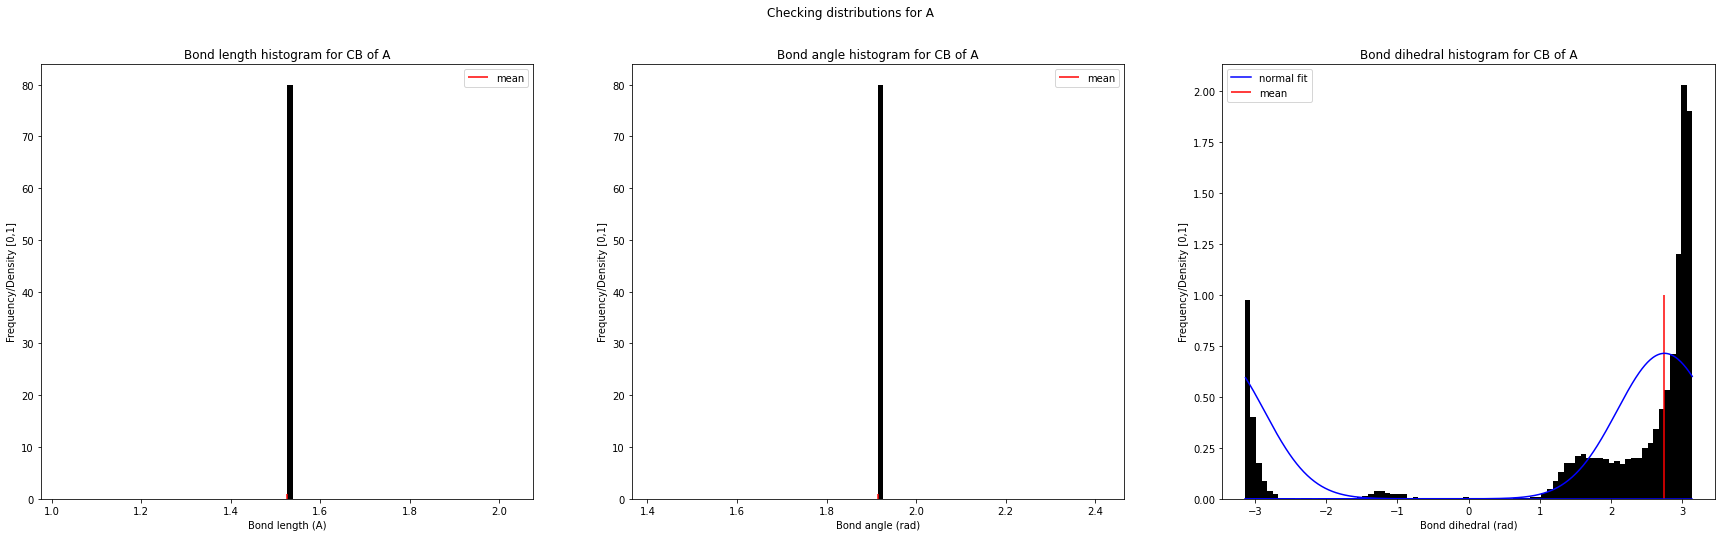

inverted mean needed in R in atom CB
inverted mean needed in R in atom CG
inverted mean needed in R in atom CD
inverted mean needed in R in atom NE
inverted mean needed in R in atom CZ


<Figure size 432x288 with 0 Axes>

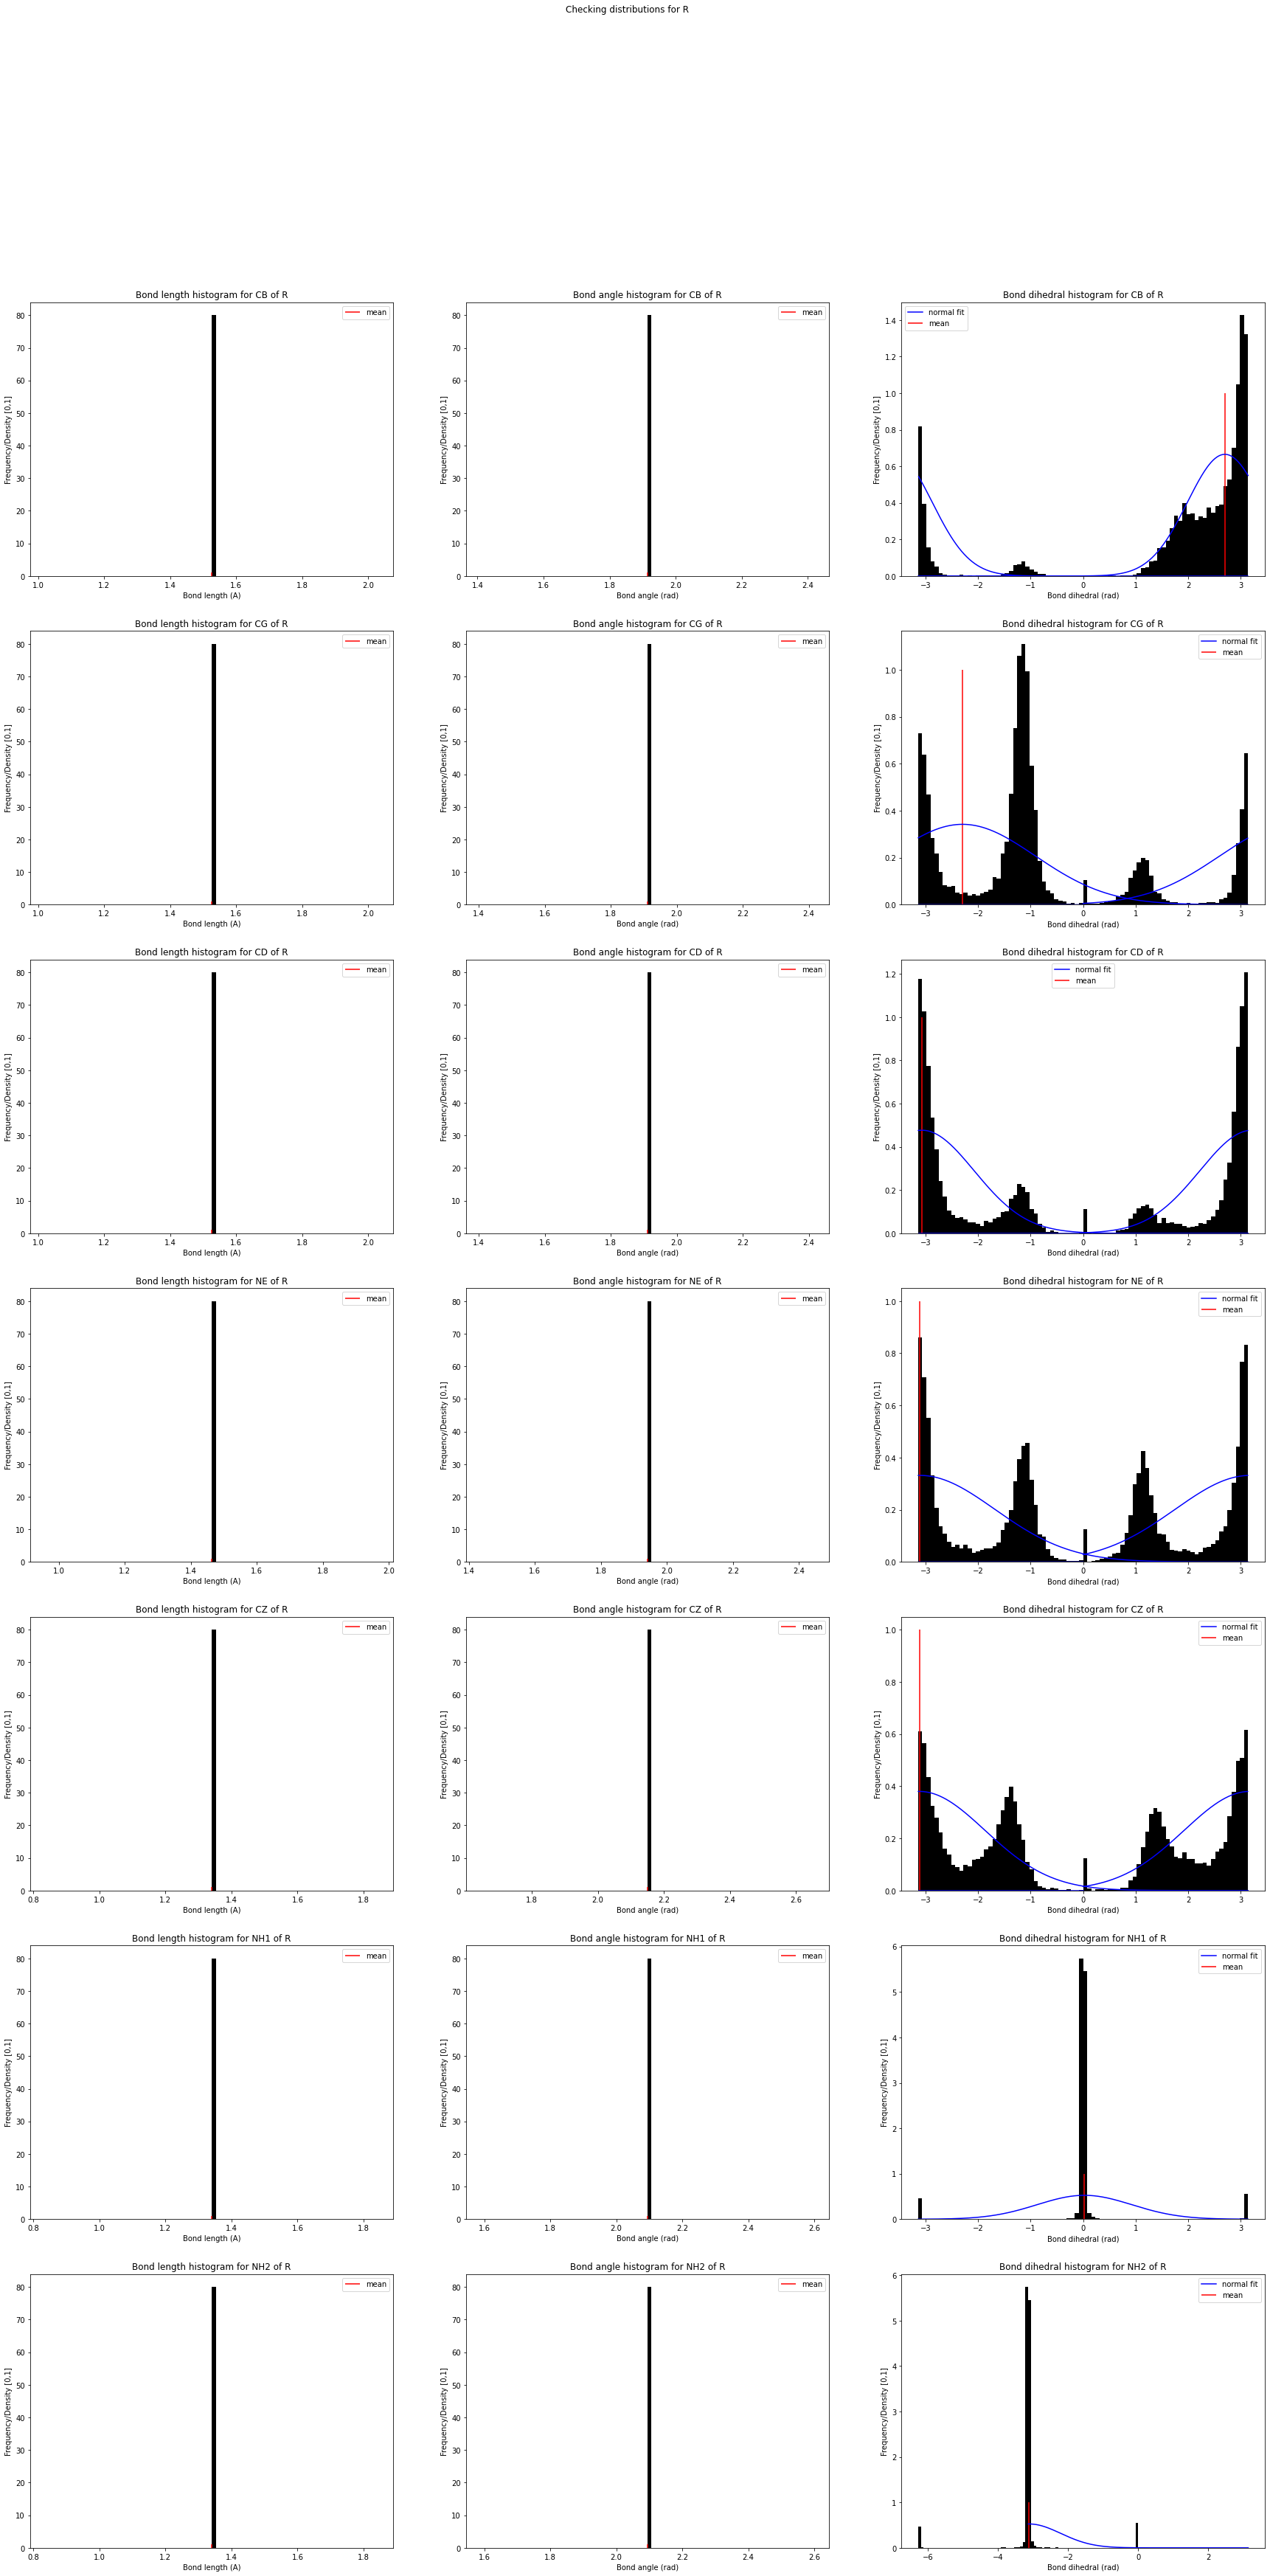

inverted mean needed in N in atom CB
inverted mean needed in N in atom CG


<Figure size 432x288 with 0 Axes>

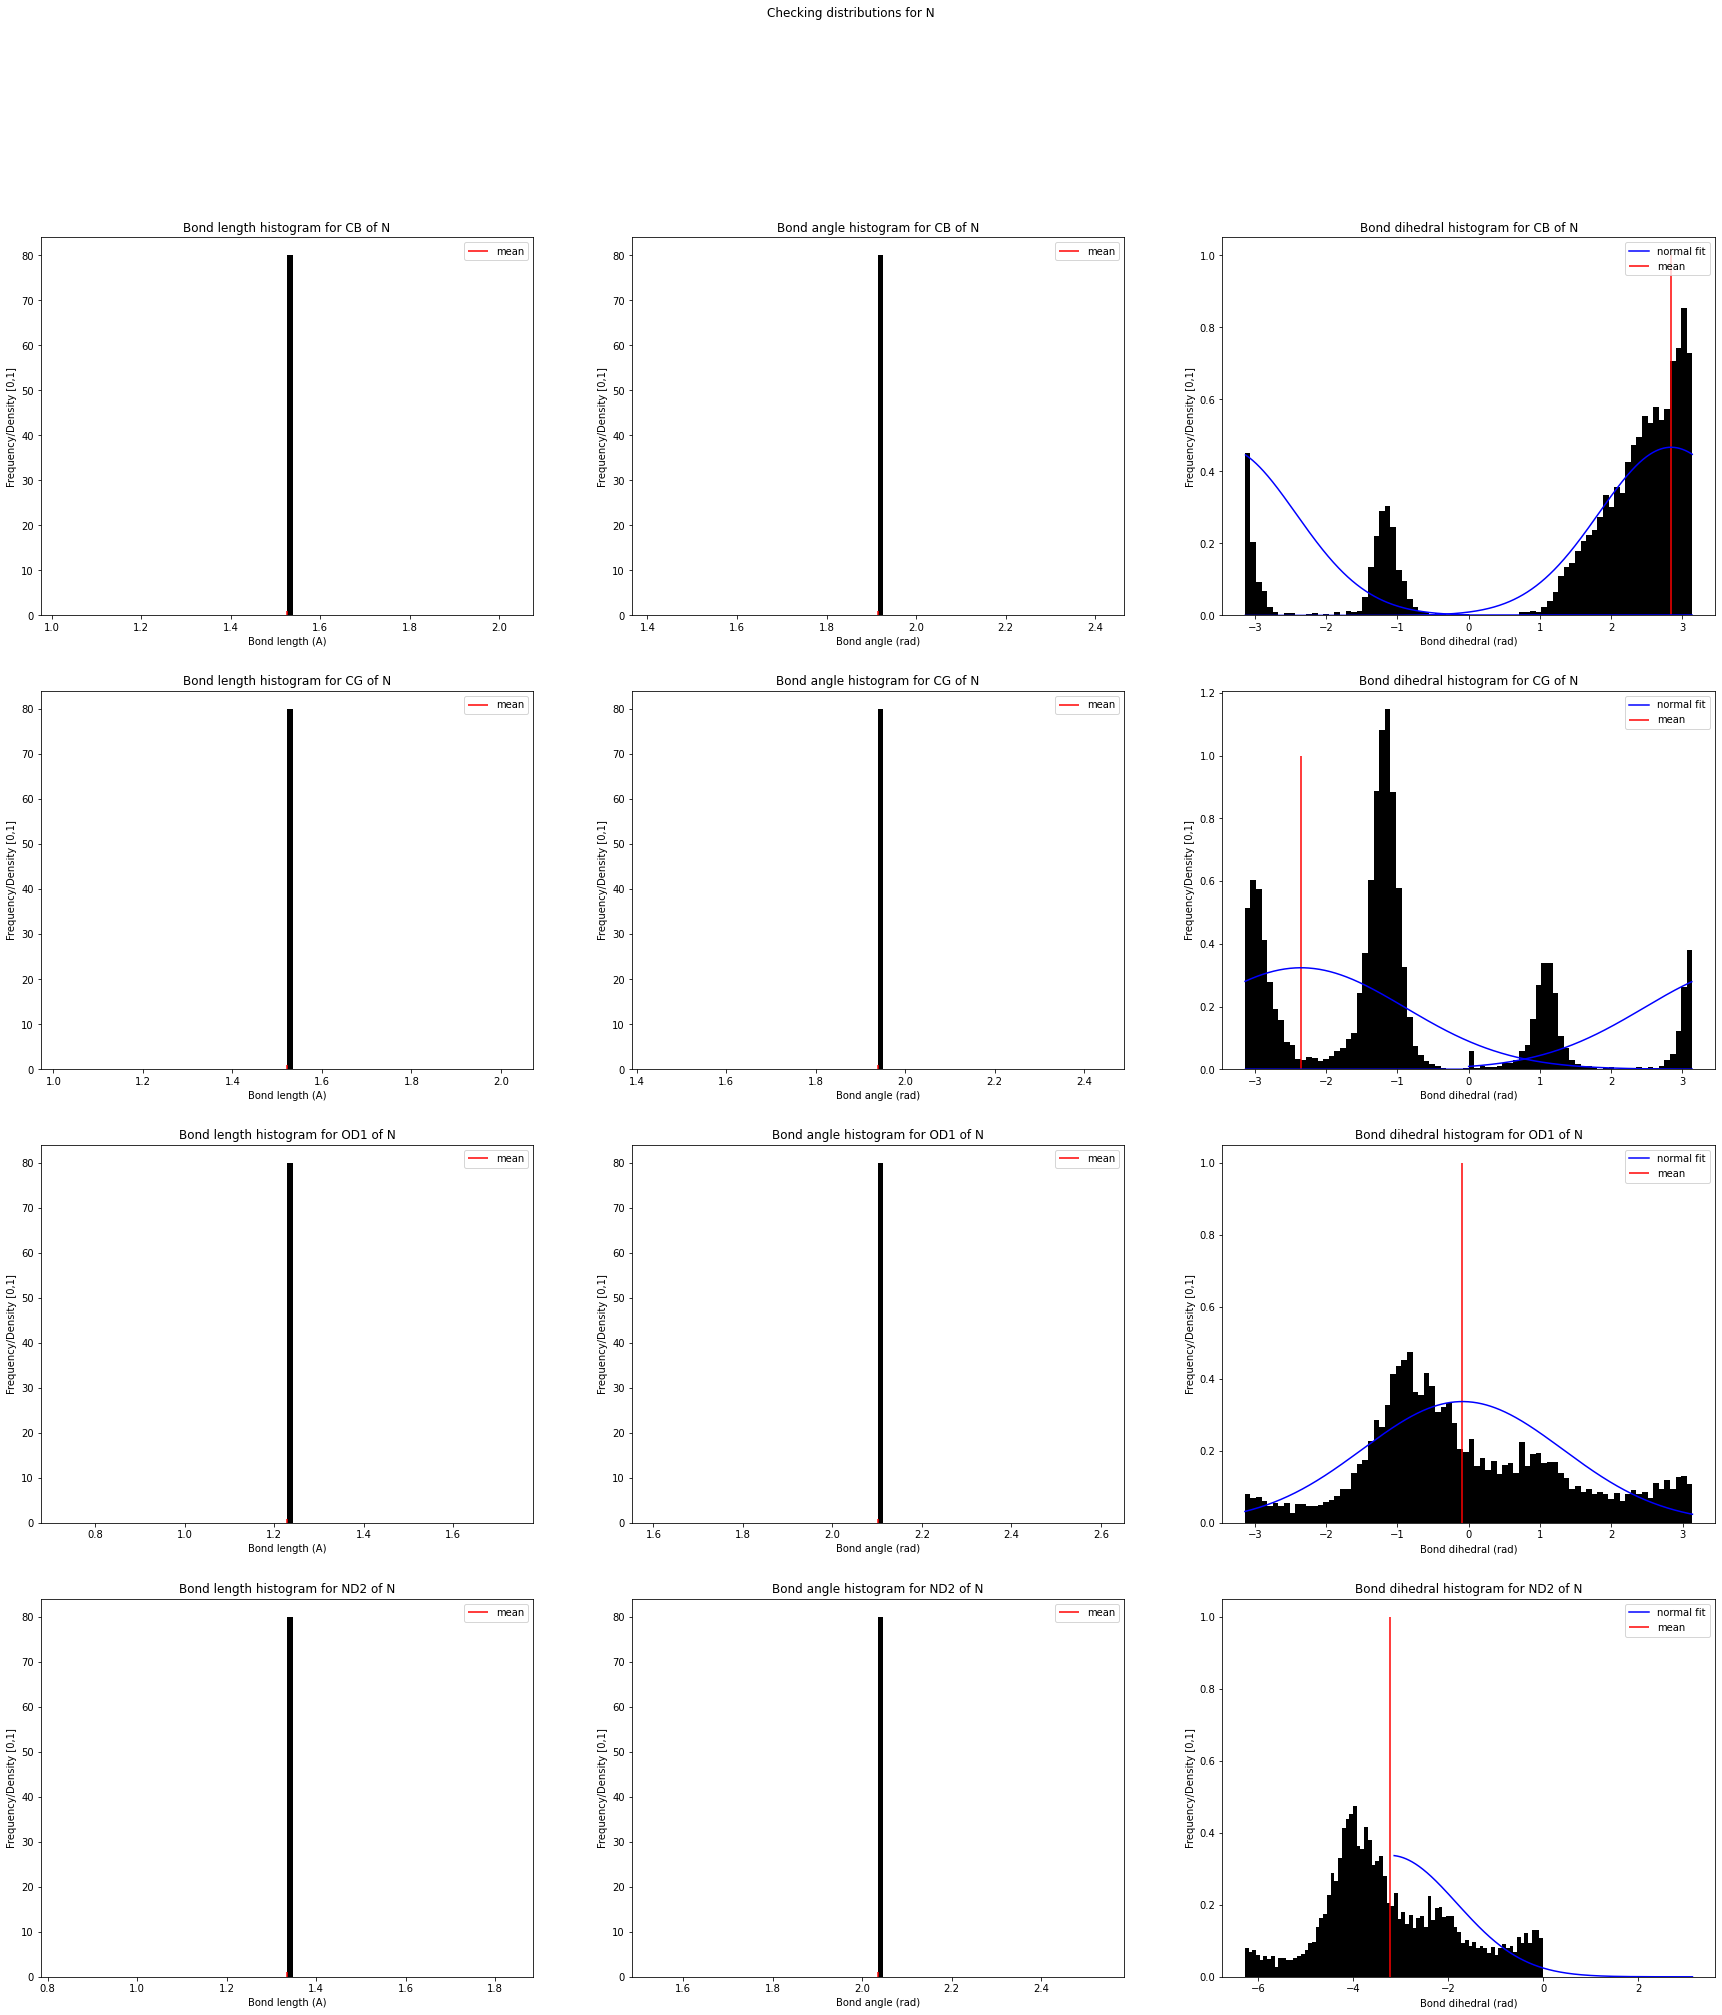

inverted mean needed in D in atom CB
inverted mean needed in D in atom CG


<Figure size 432x288 with 0 Axes>

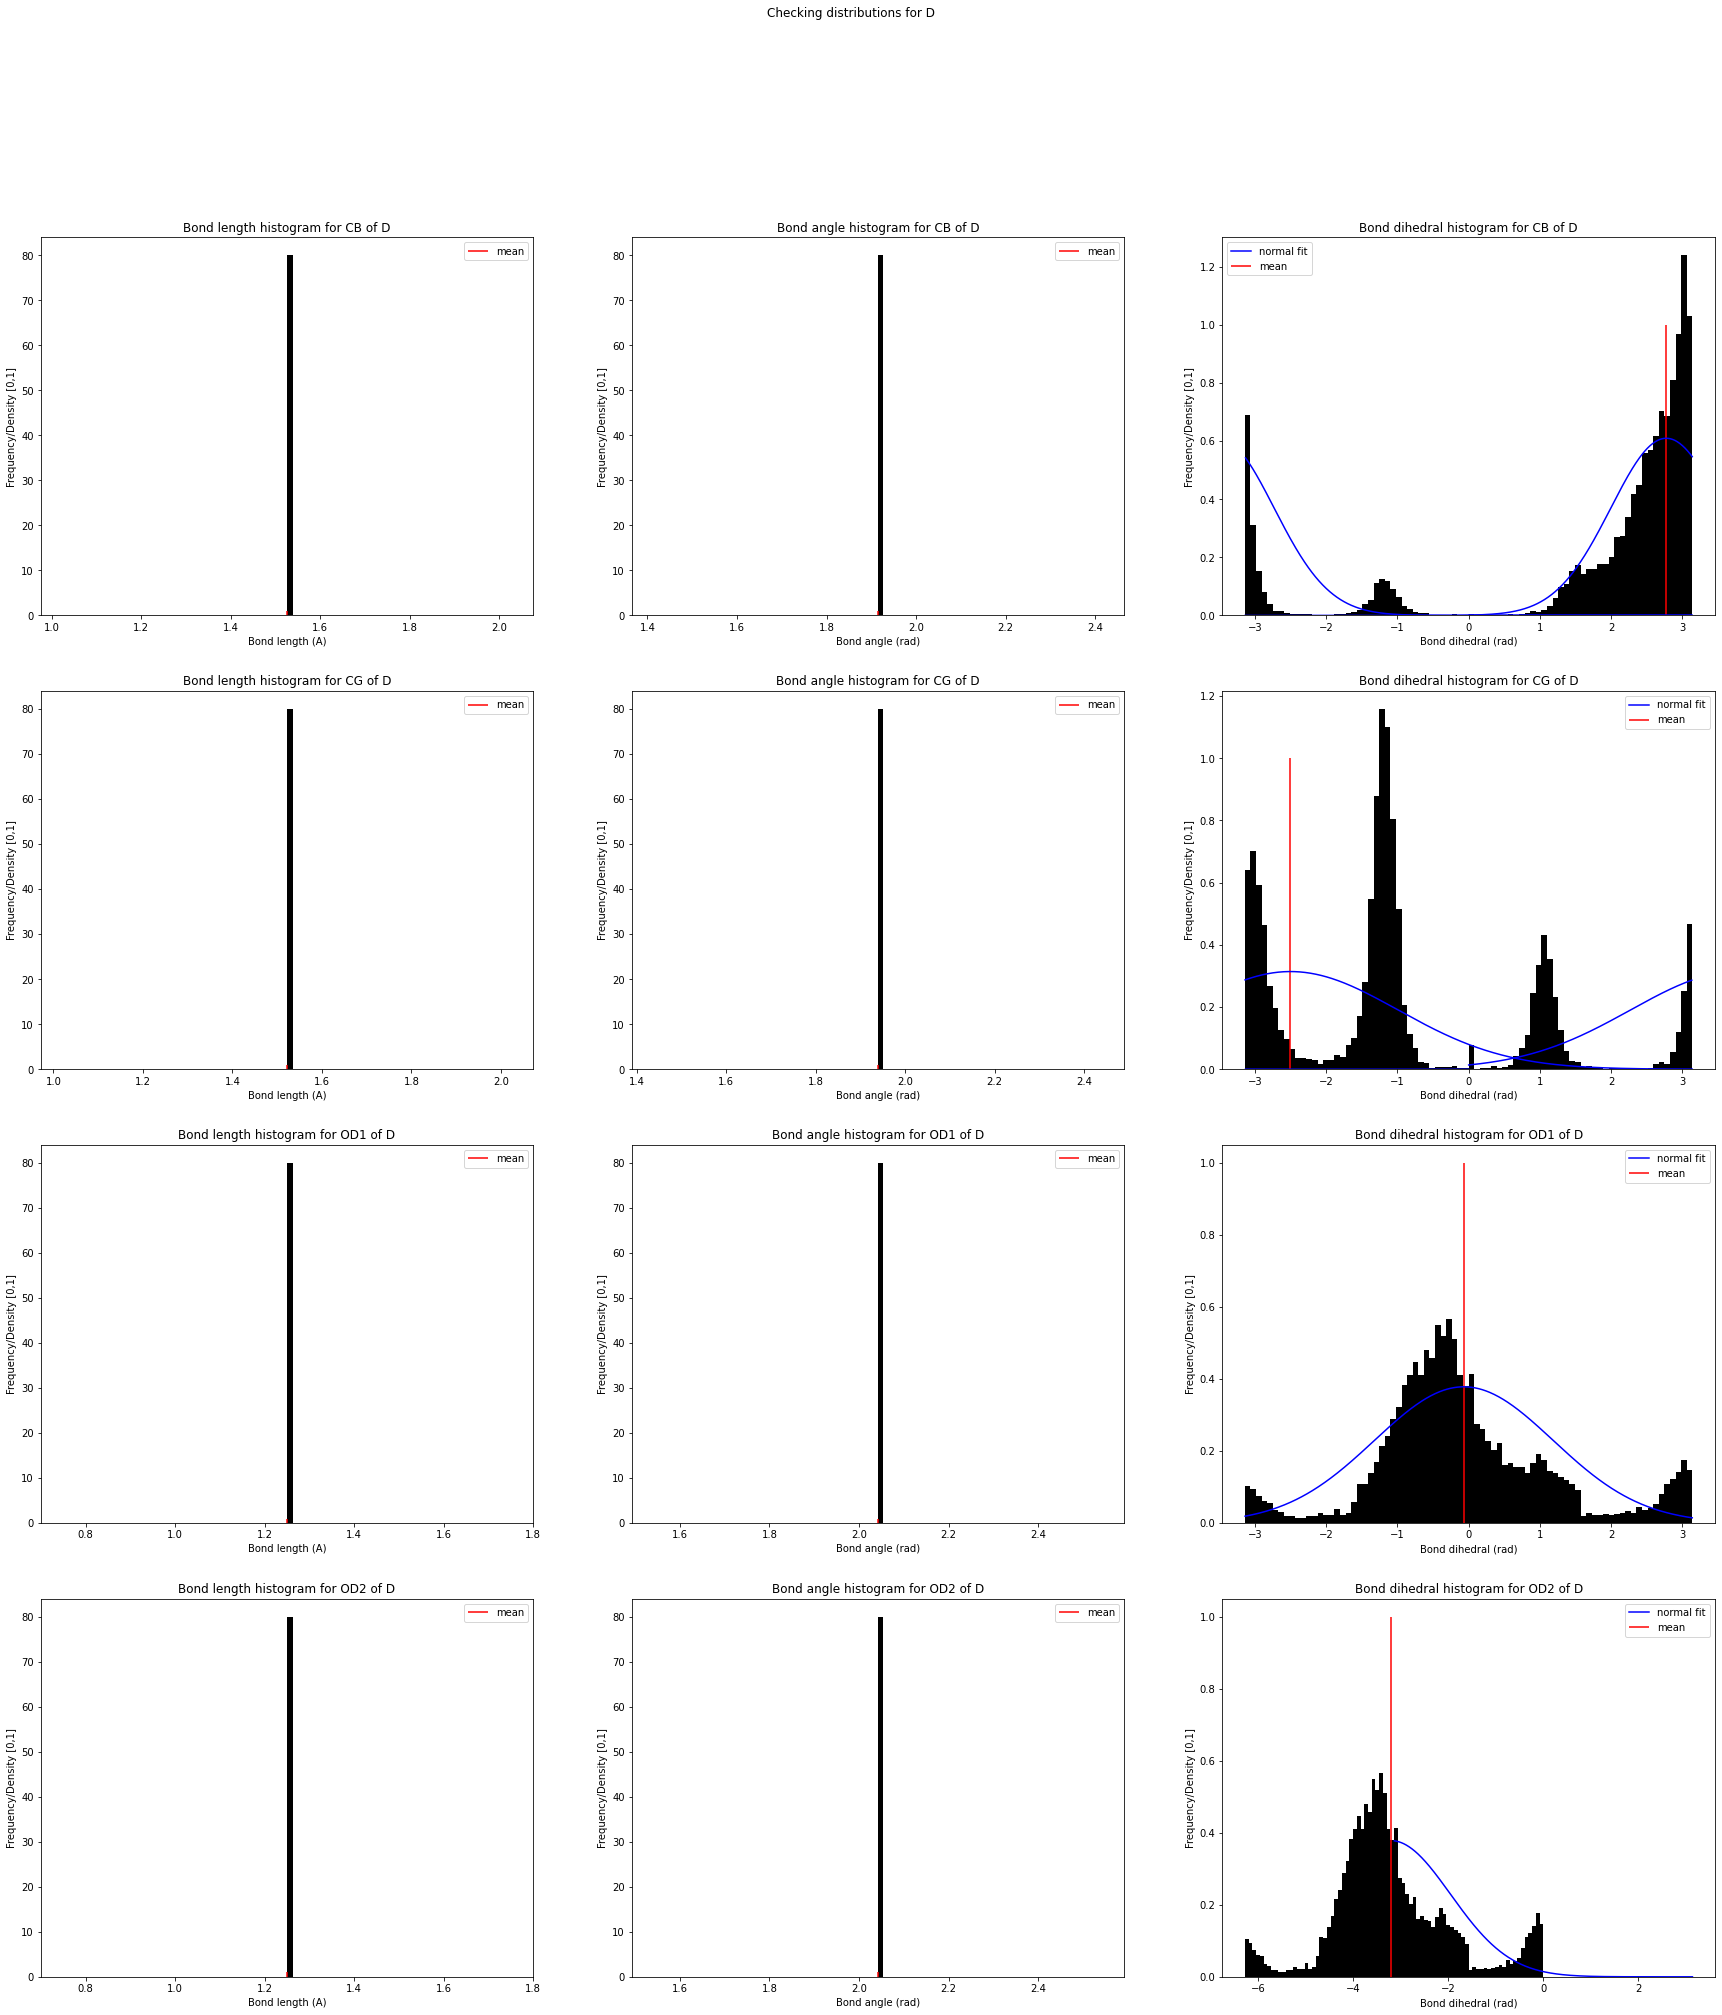

inverted mean needed in C in atom CB
inverted mean needed in C in atom SG


<Figure size 432x288 with 0 Axes>

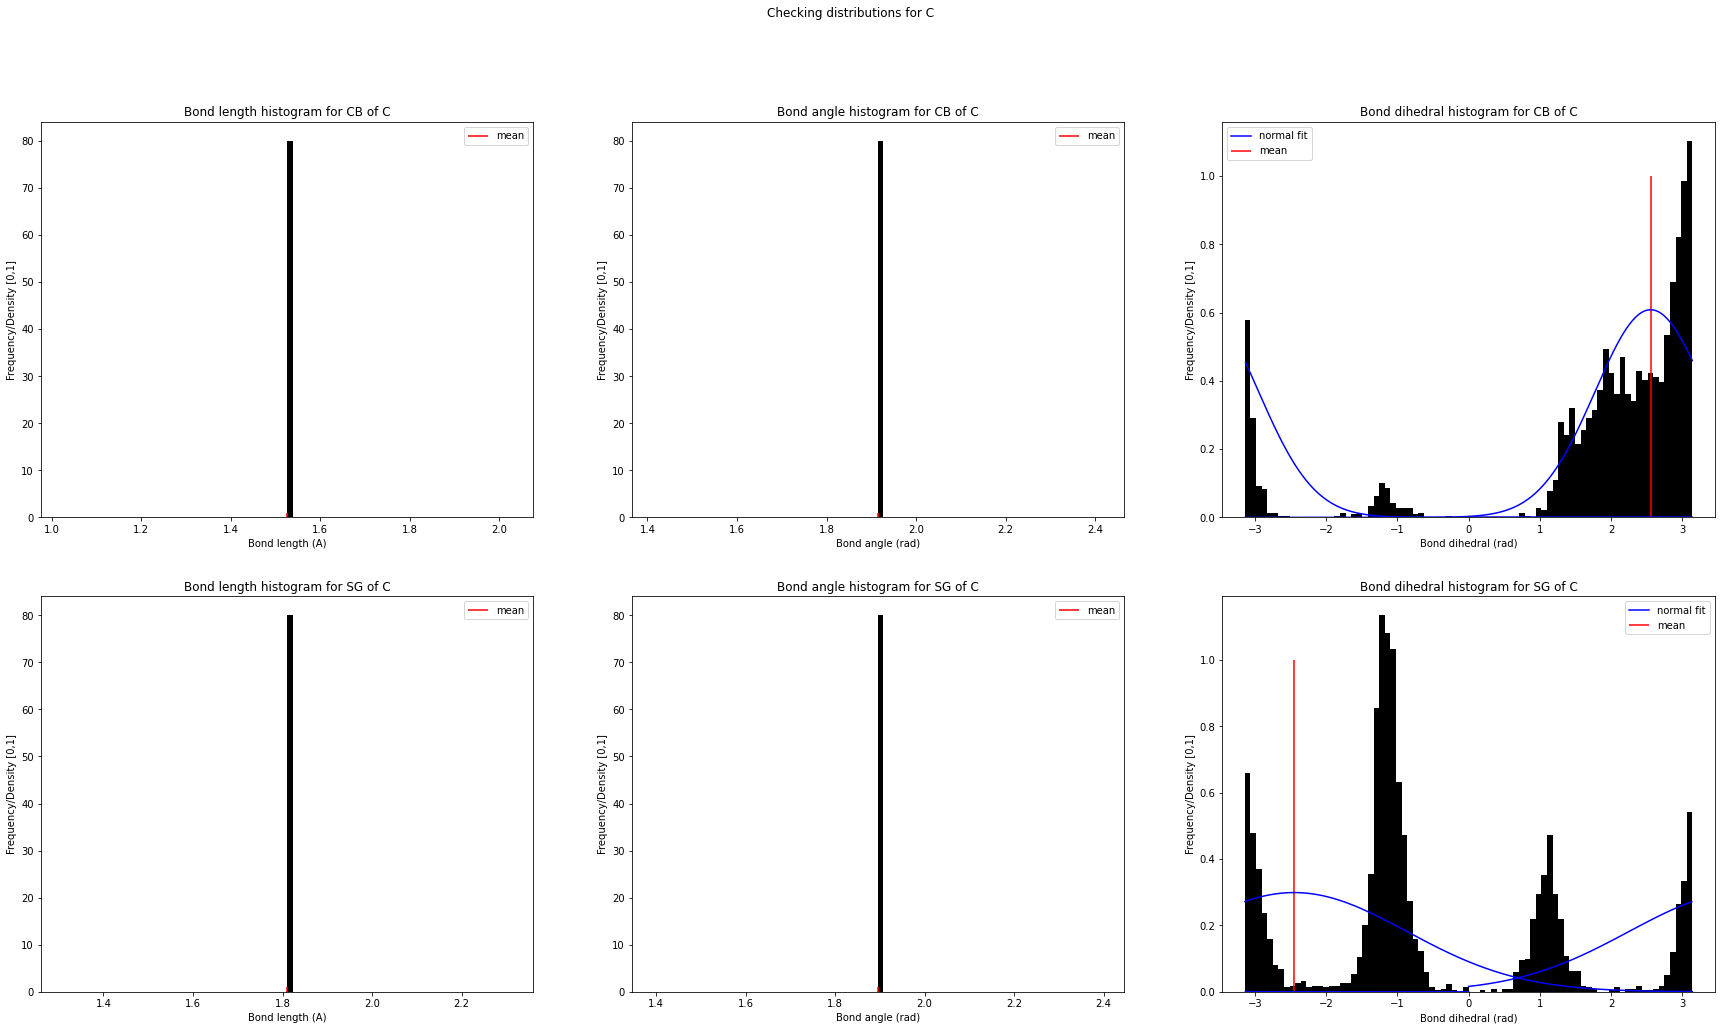

inverted mean needed in Q in atom CB
inverted mean needed in Q in atom CG
inverted mean needed in Q in atom CD


<Figure size 432x288 with 0 Axes>

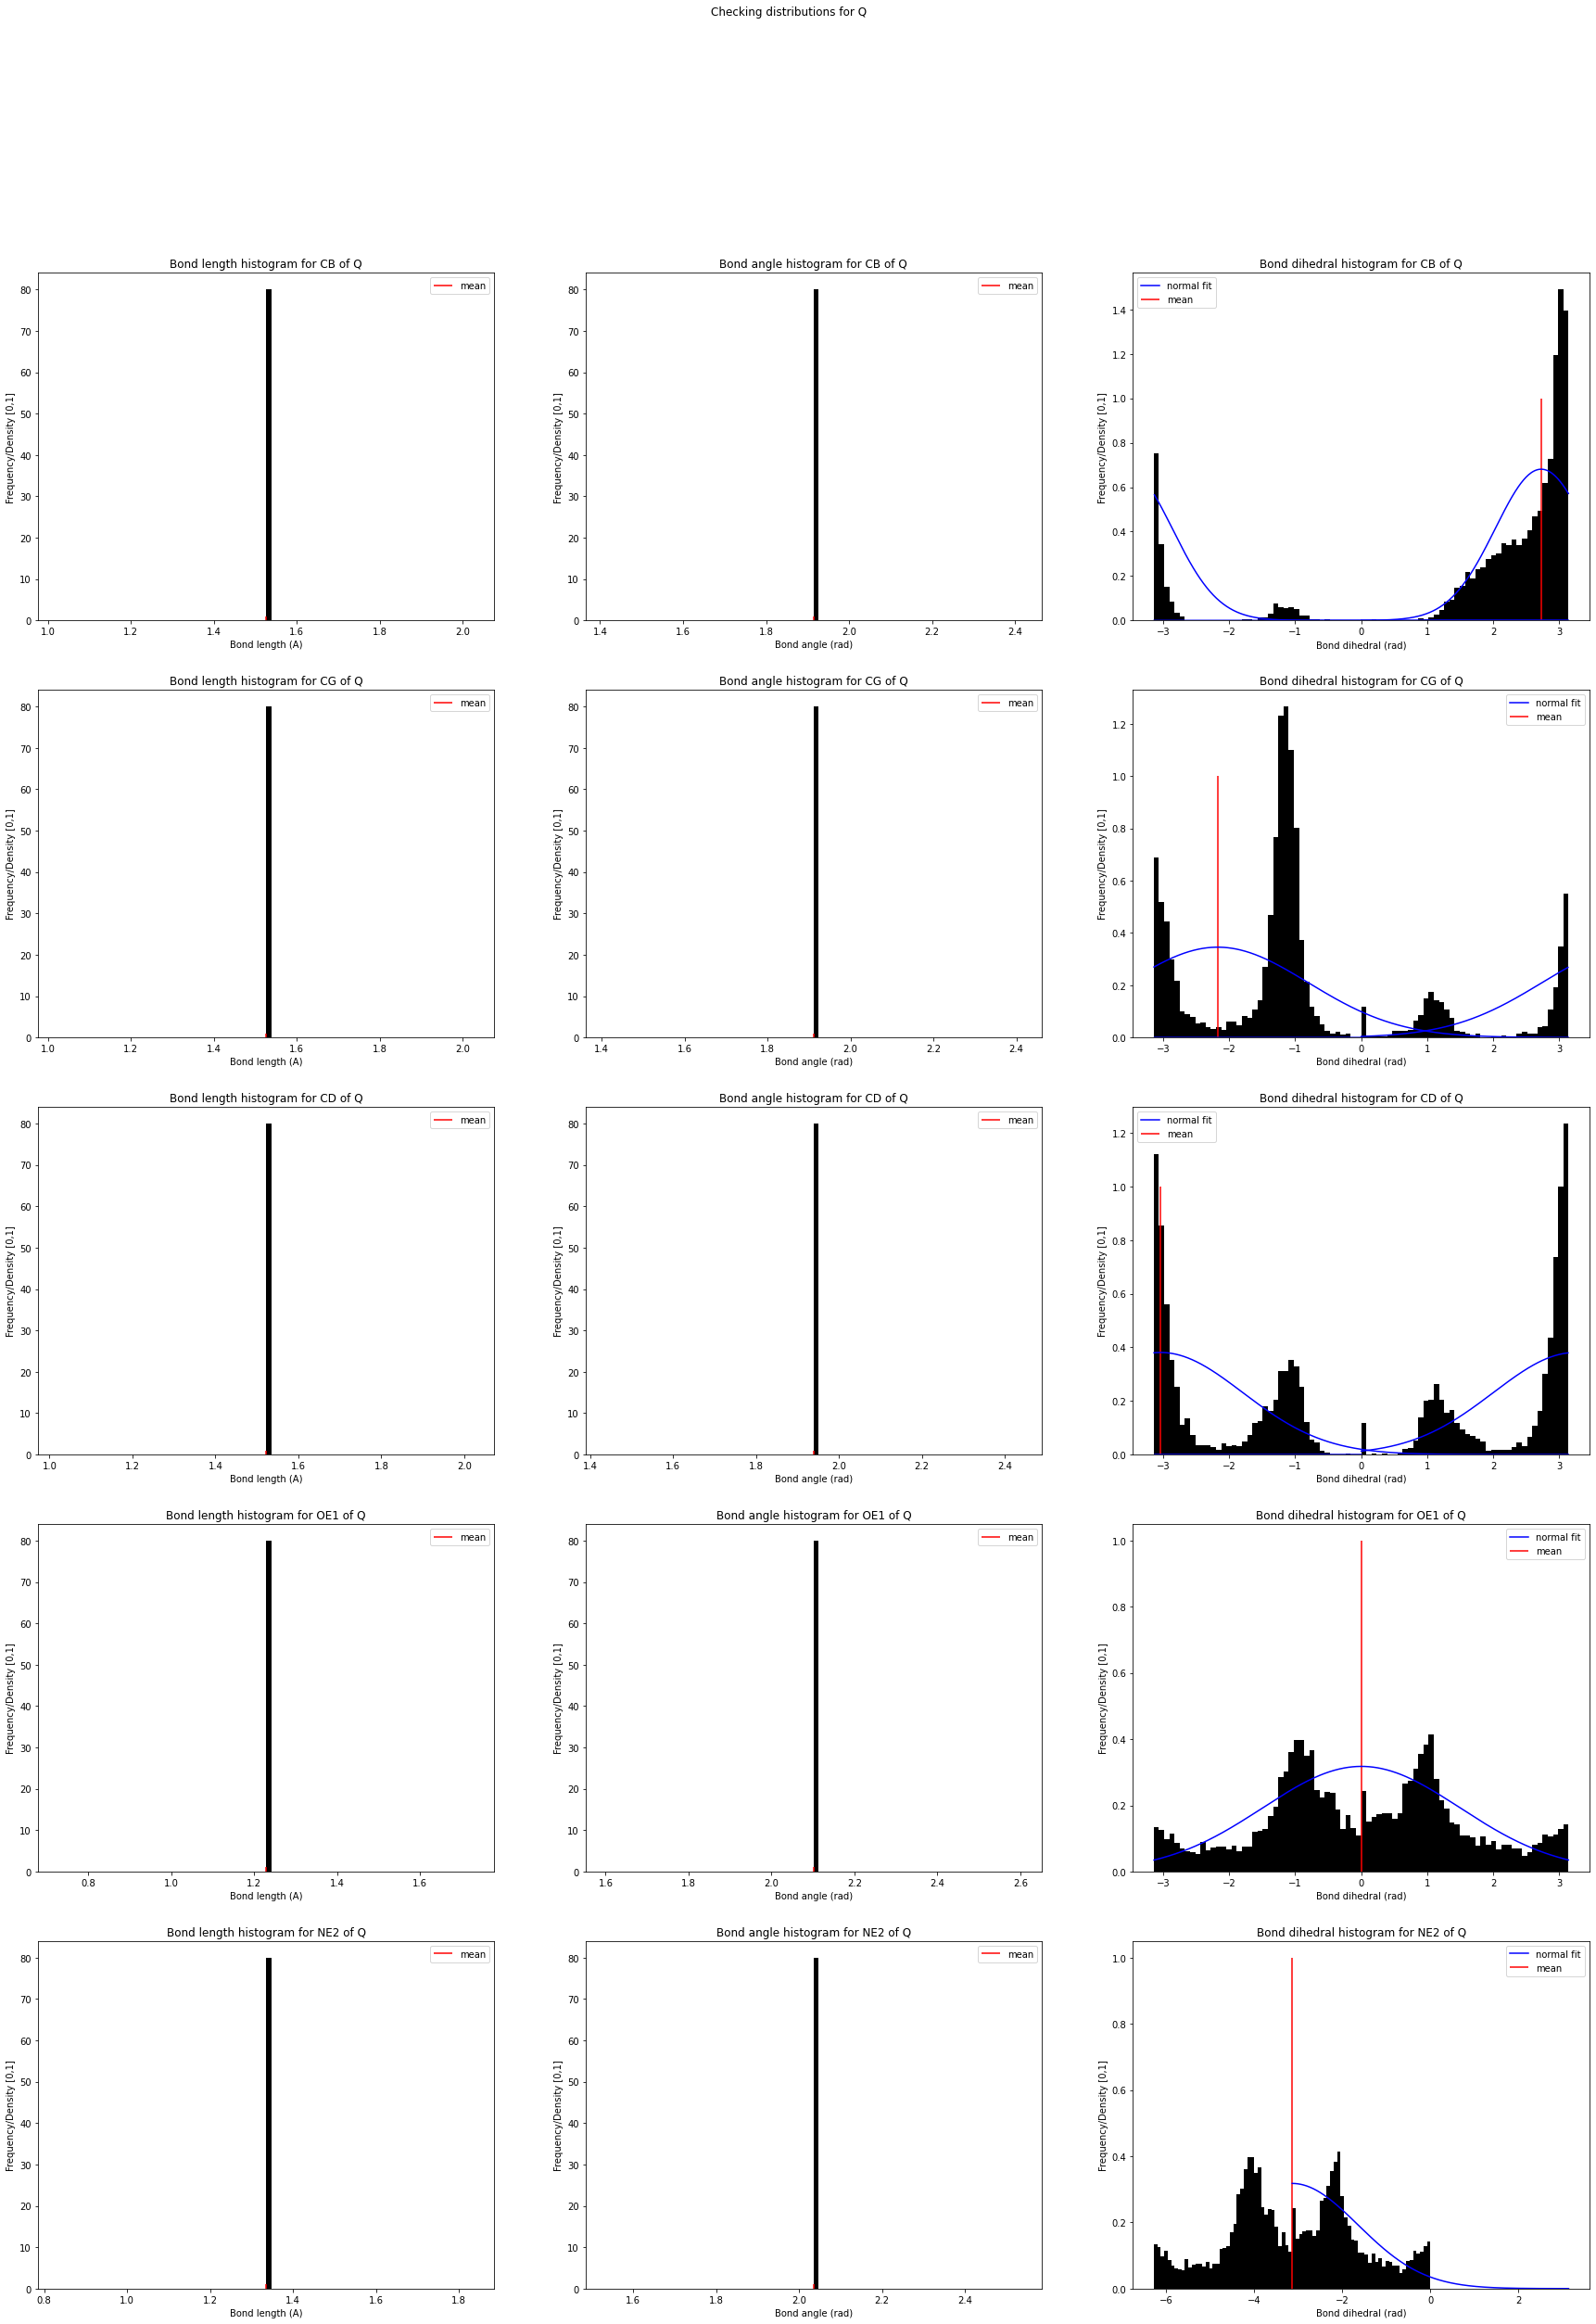

inverted mean needed in E in atom CB
inverted mean needed in E in atom CG
inverted mean needed in E in atom CD


<Figure size 432x288 with 0 Axes>

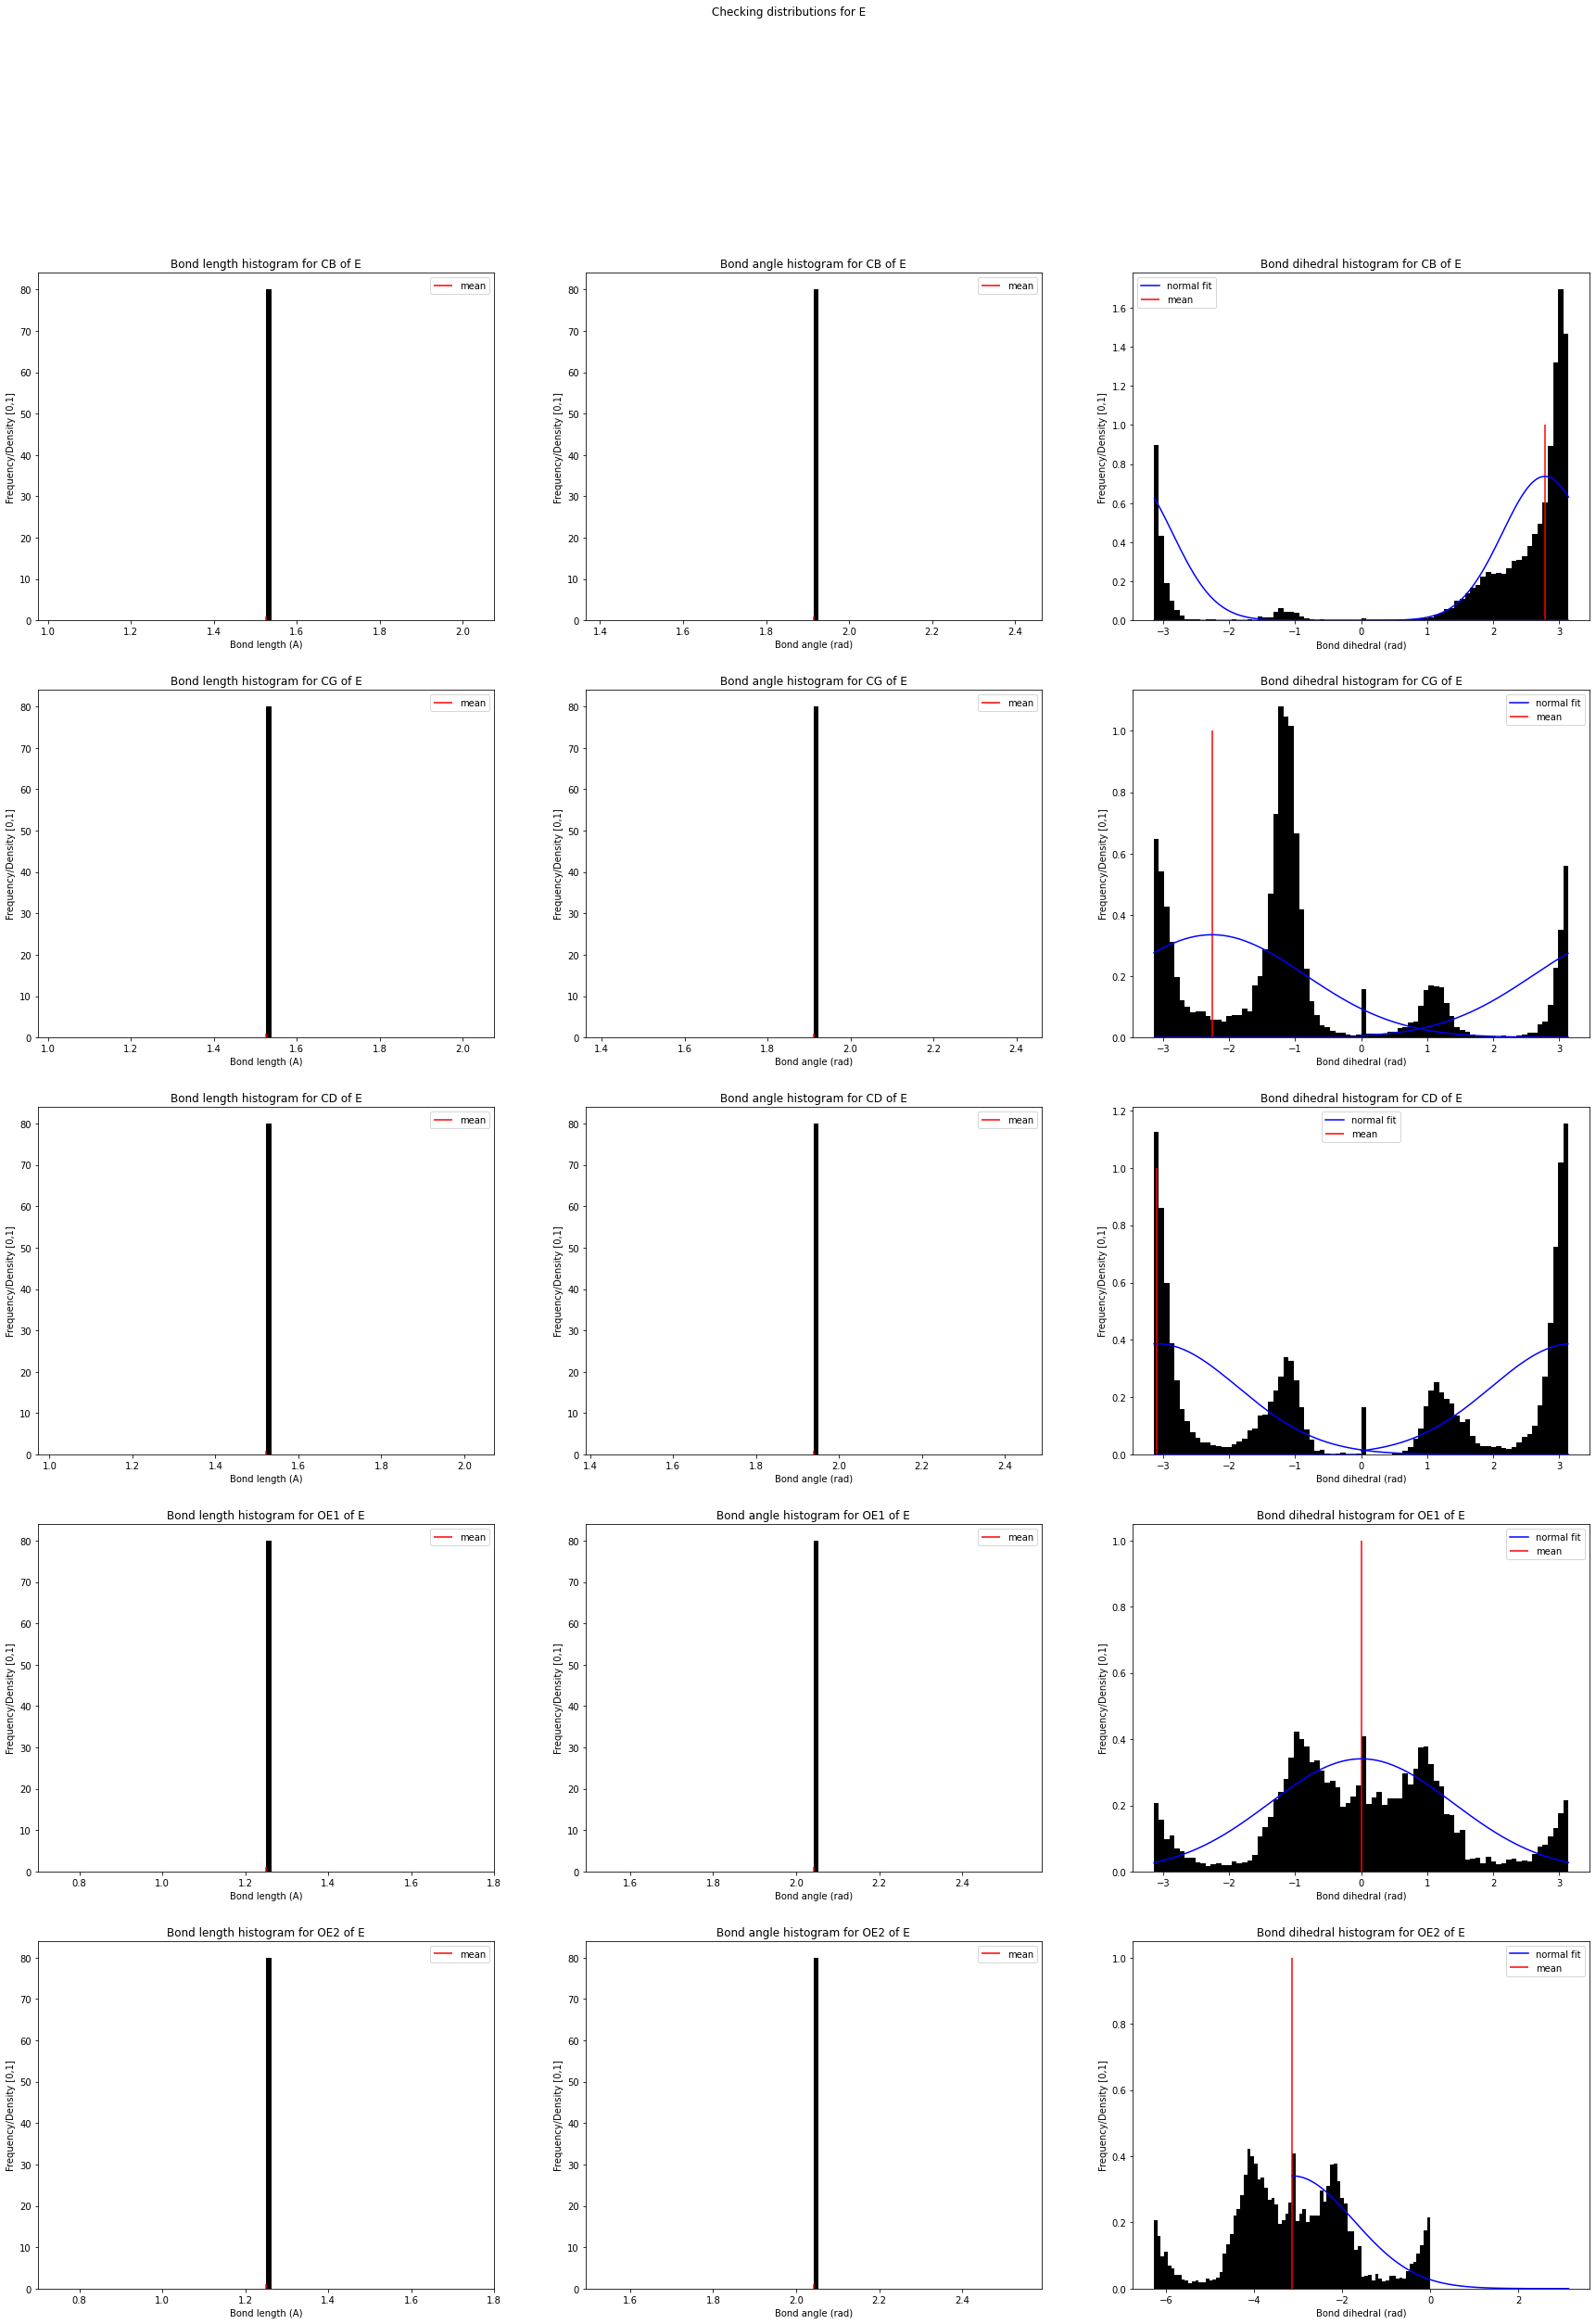

<Figure size 432x288 with 0 Axes>

inverted mean needed in H in atom CB
inverted mean needed in H in atom CG


<Figure size 432x288 with 0 Axes>

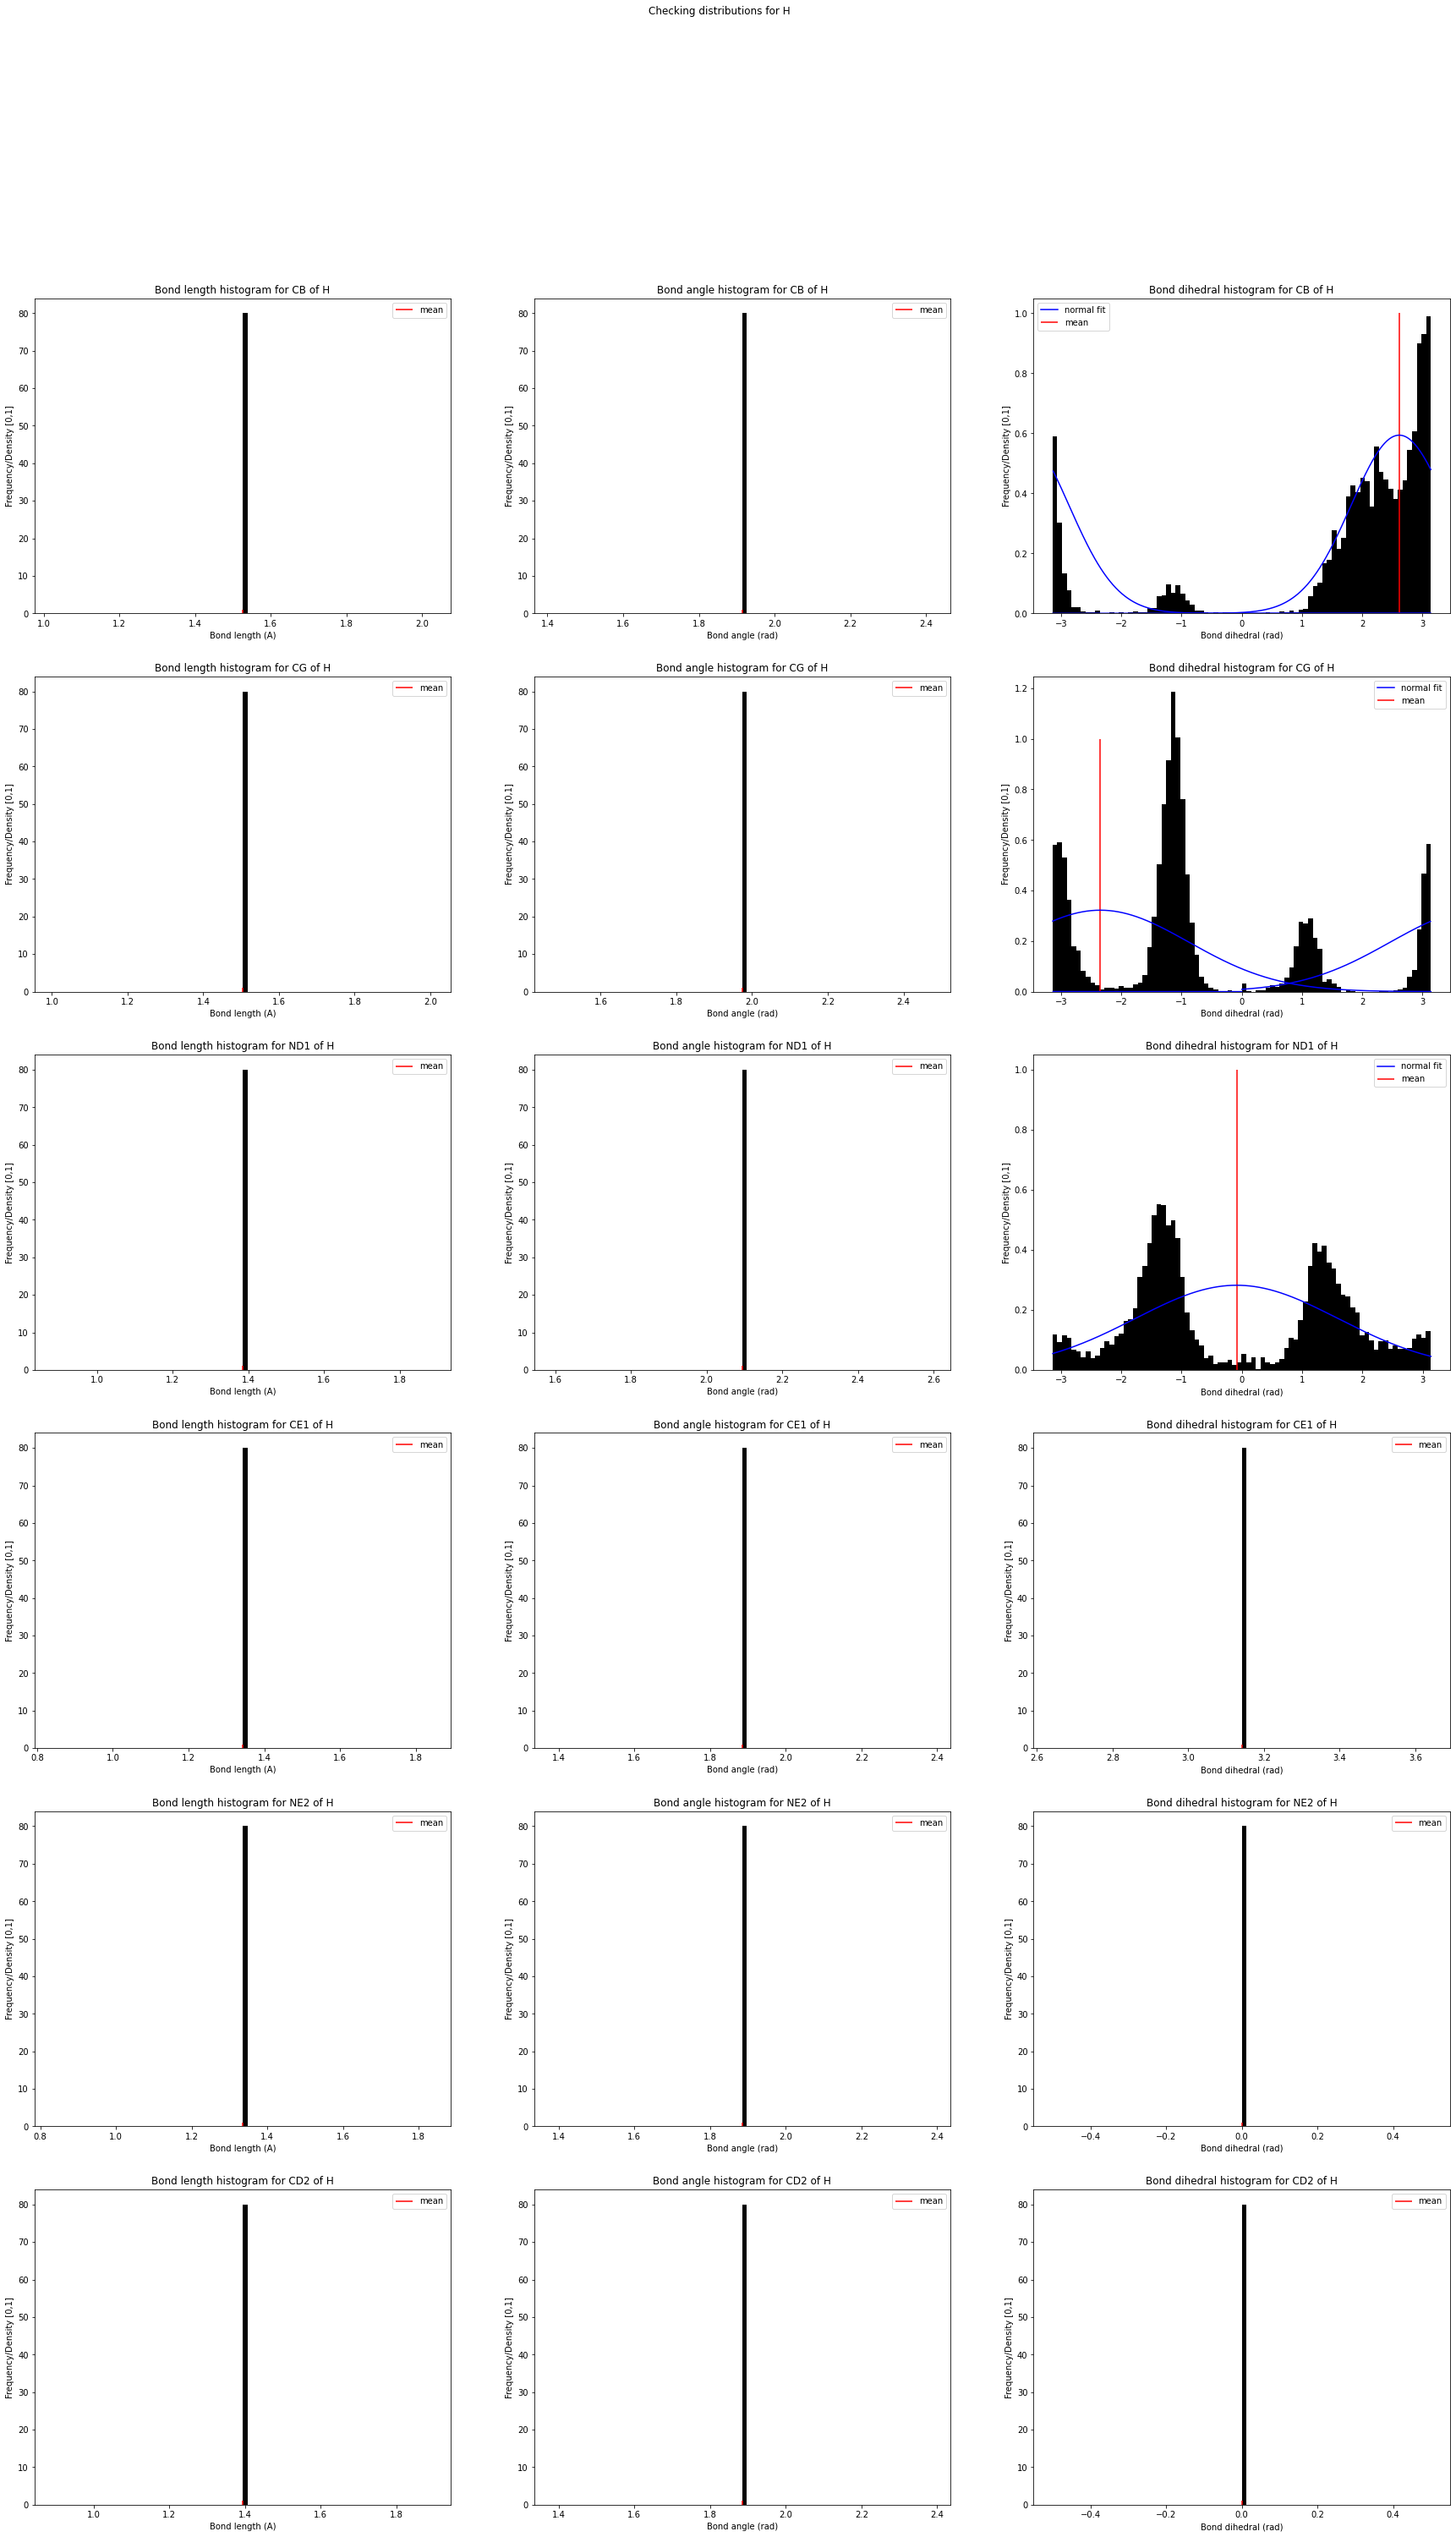

inverted mean needed in I in atom CB
inverted mean needed in I in atom CD1
inverted mean needed in I in atom CG2


<Figure size 432x288 with 0 Axes>

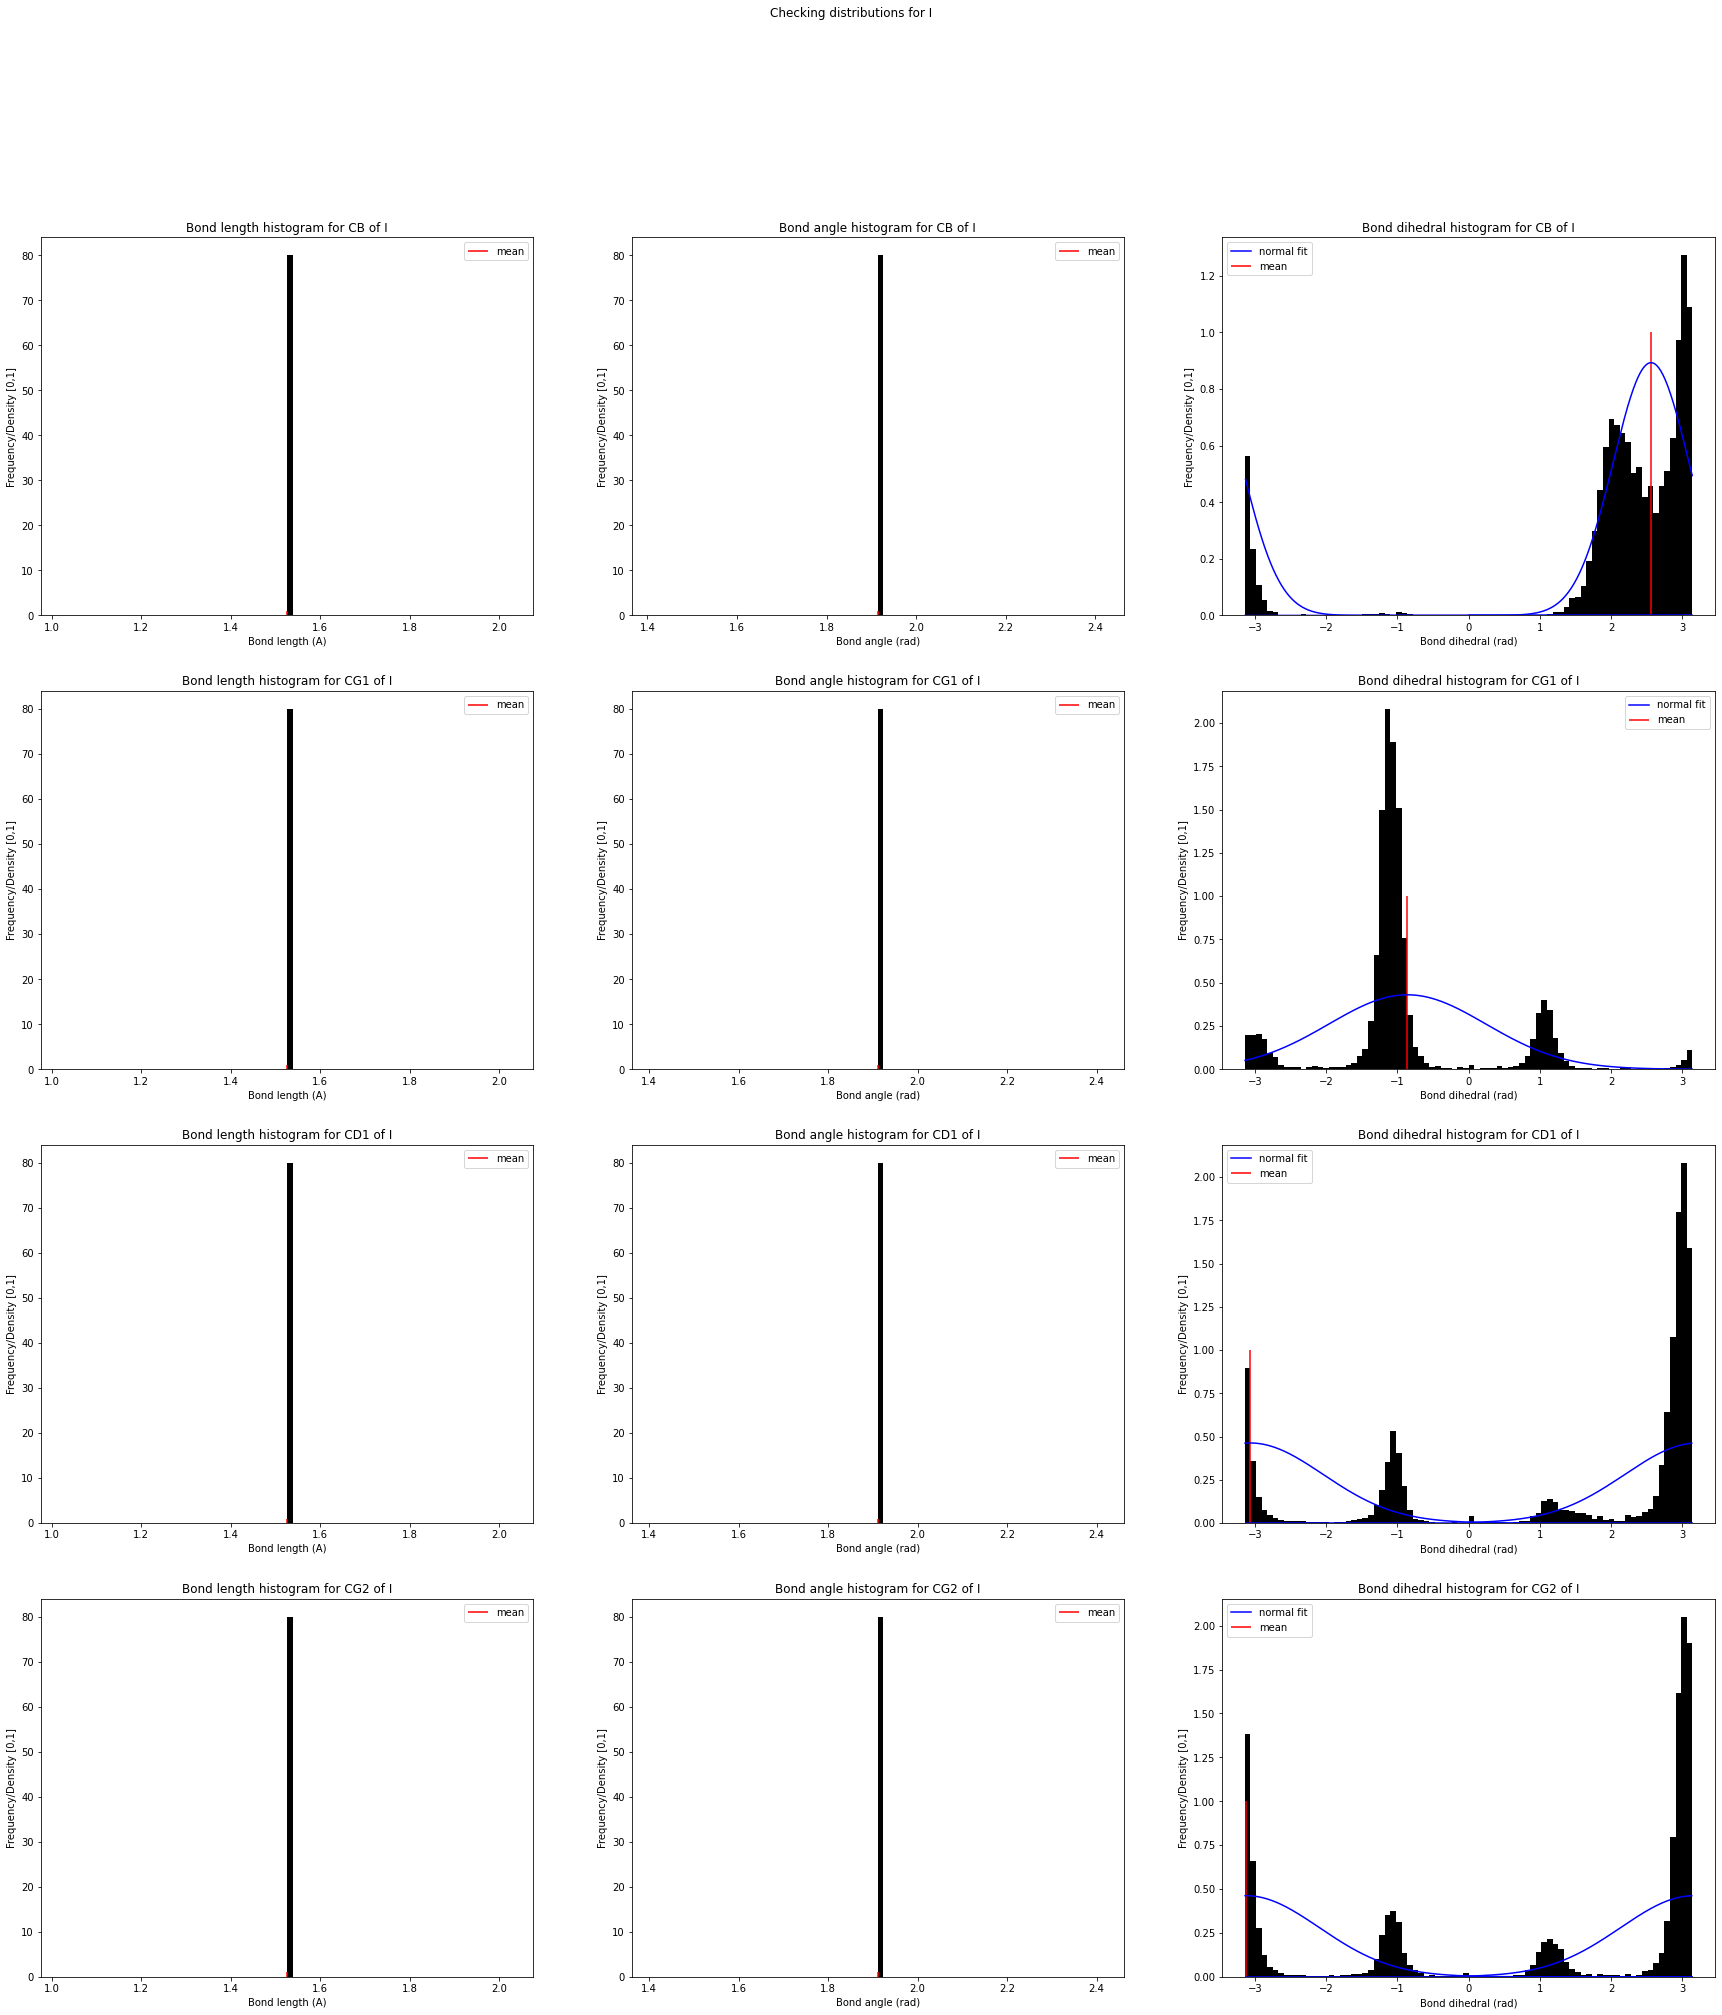

inverted mean needed in L in atom CB
inverted mean needed in L in atom CG
inverted mean needed in L in atom CD1
inverted mean needed in L in atom CD2


<Figure size 432x288 with 0 Axes>

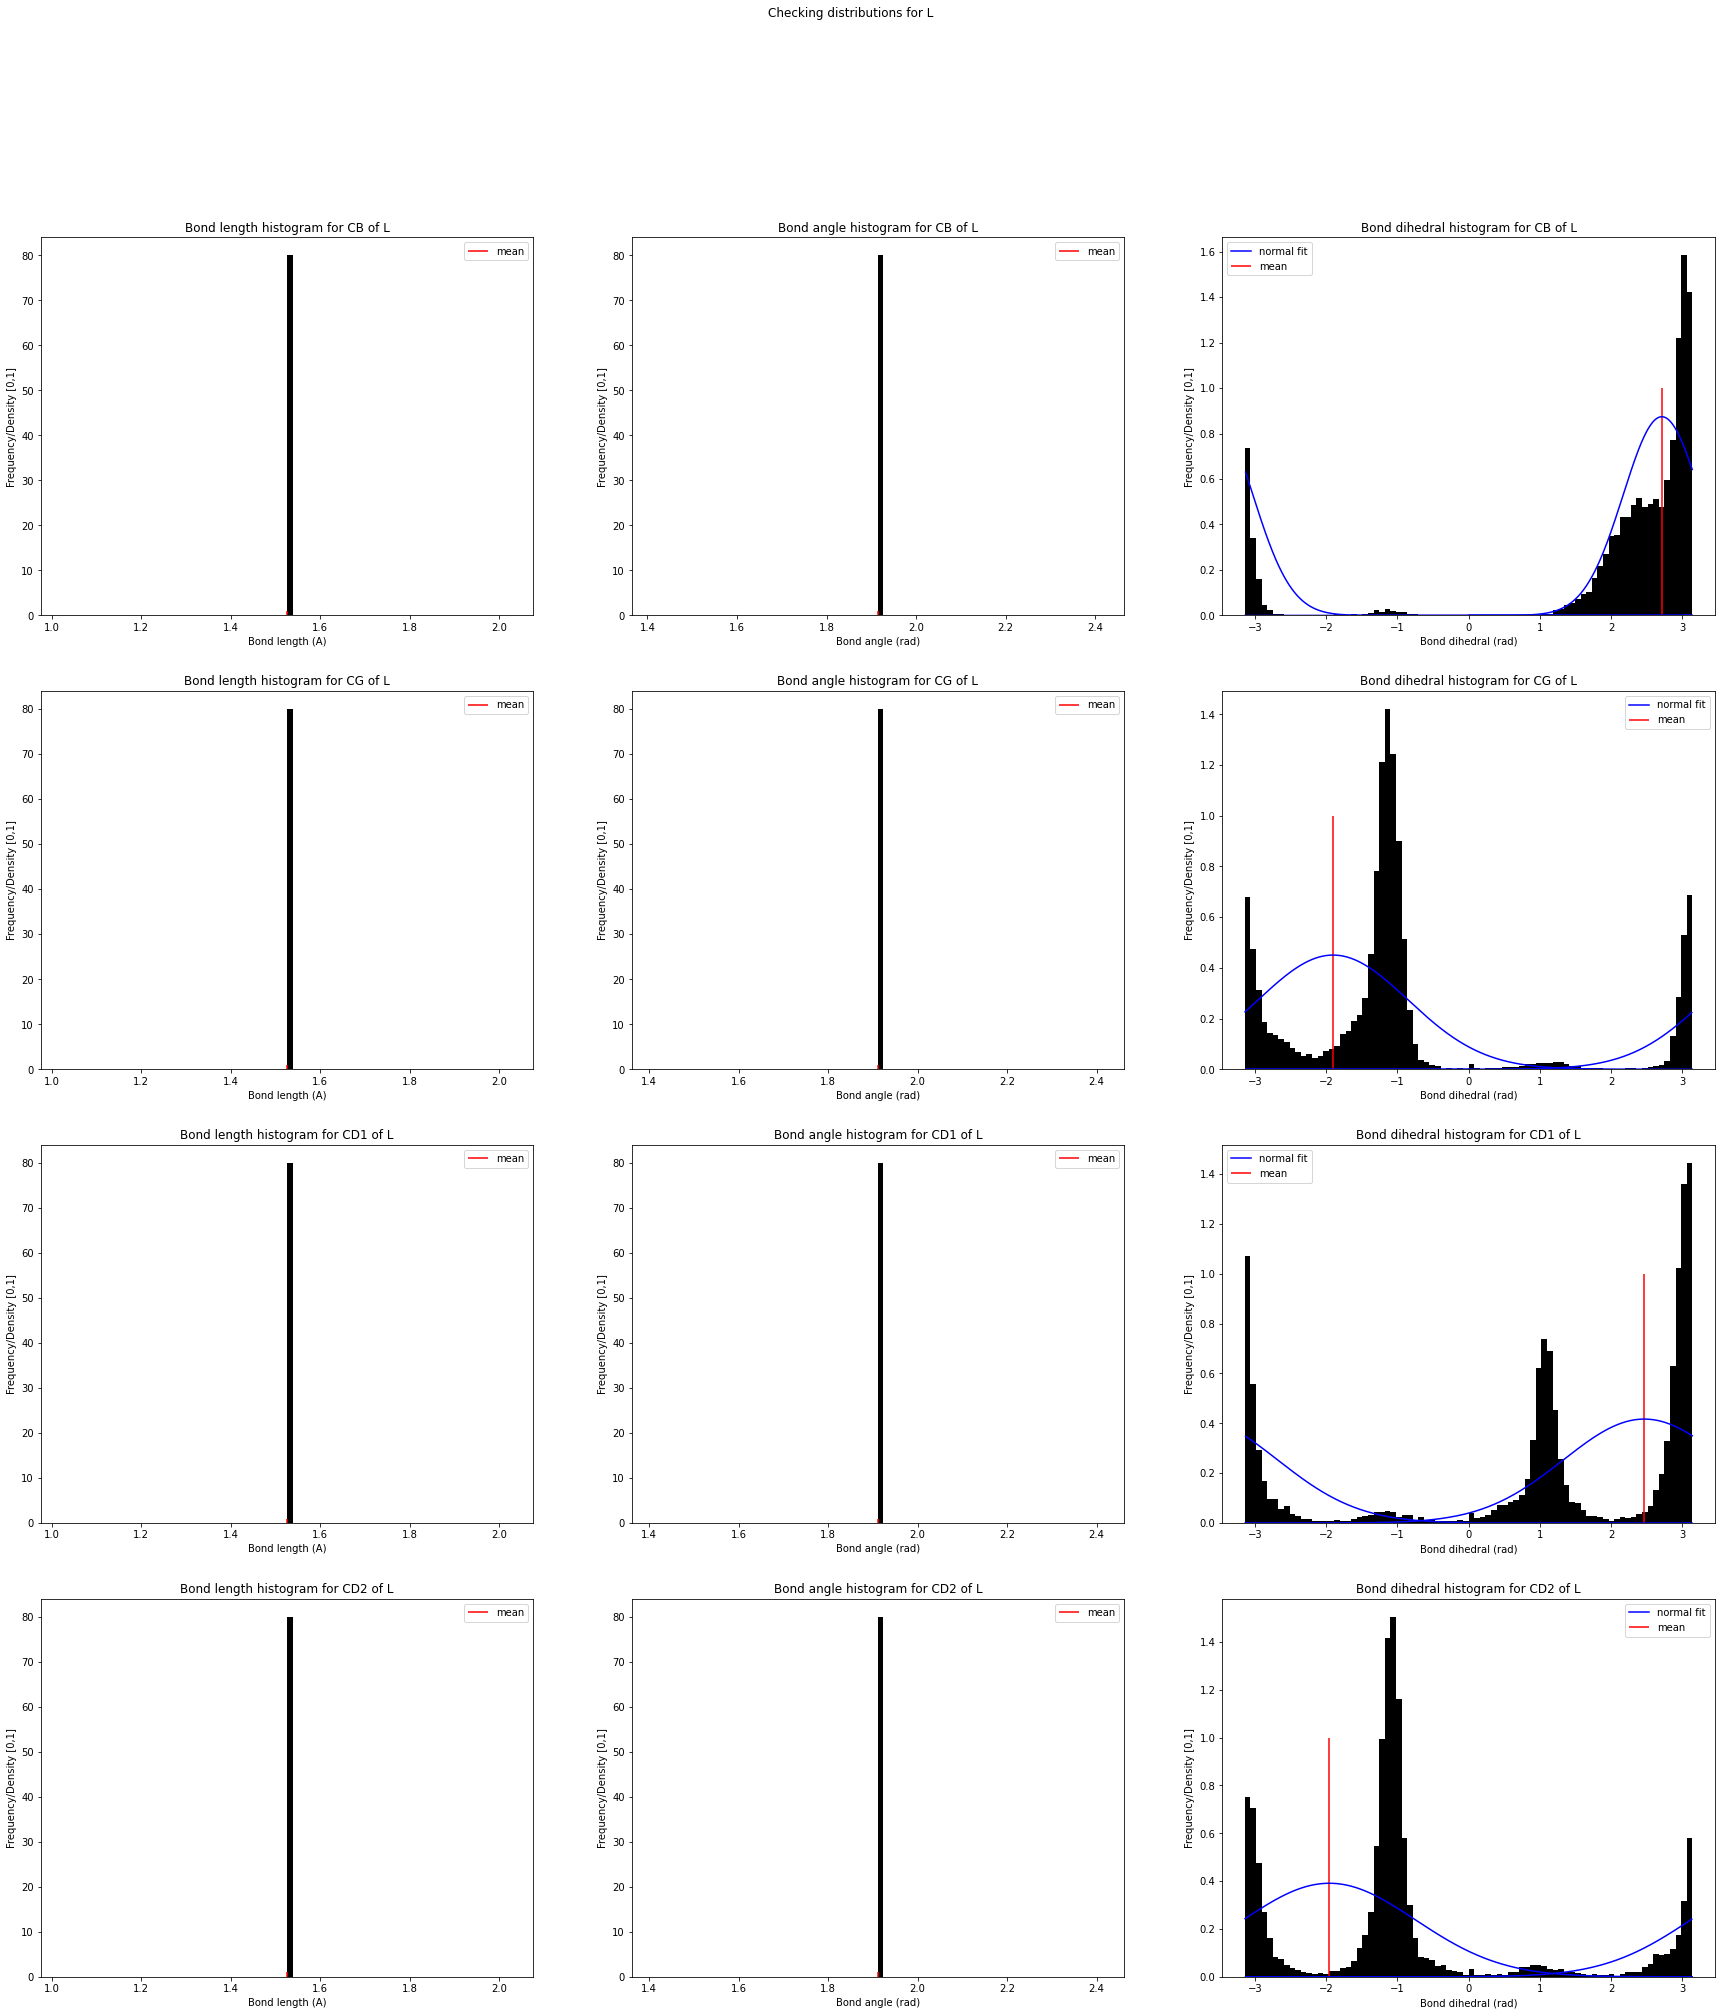

inverted mean needed in K in atom CB
inverted mean needed in K in atom CG
inverted mean needed in K in atom CD
inverted mean needed in K in atom CE
inverted mean needed in K in atom NZ


<Figure size 432x288 with 0 Axes>

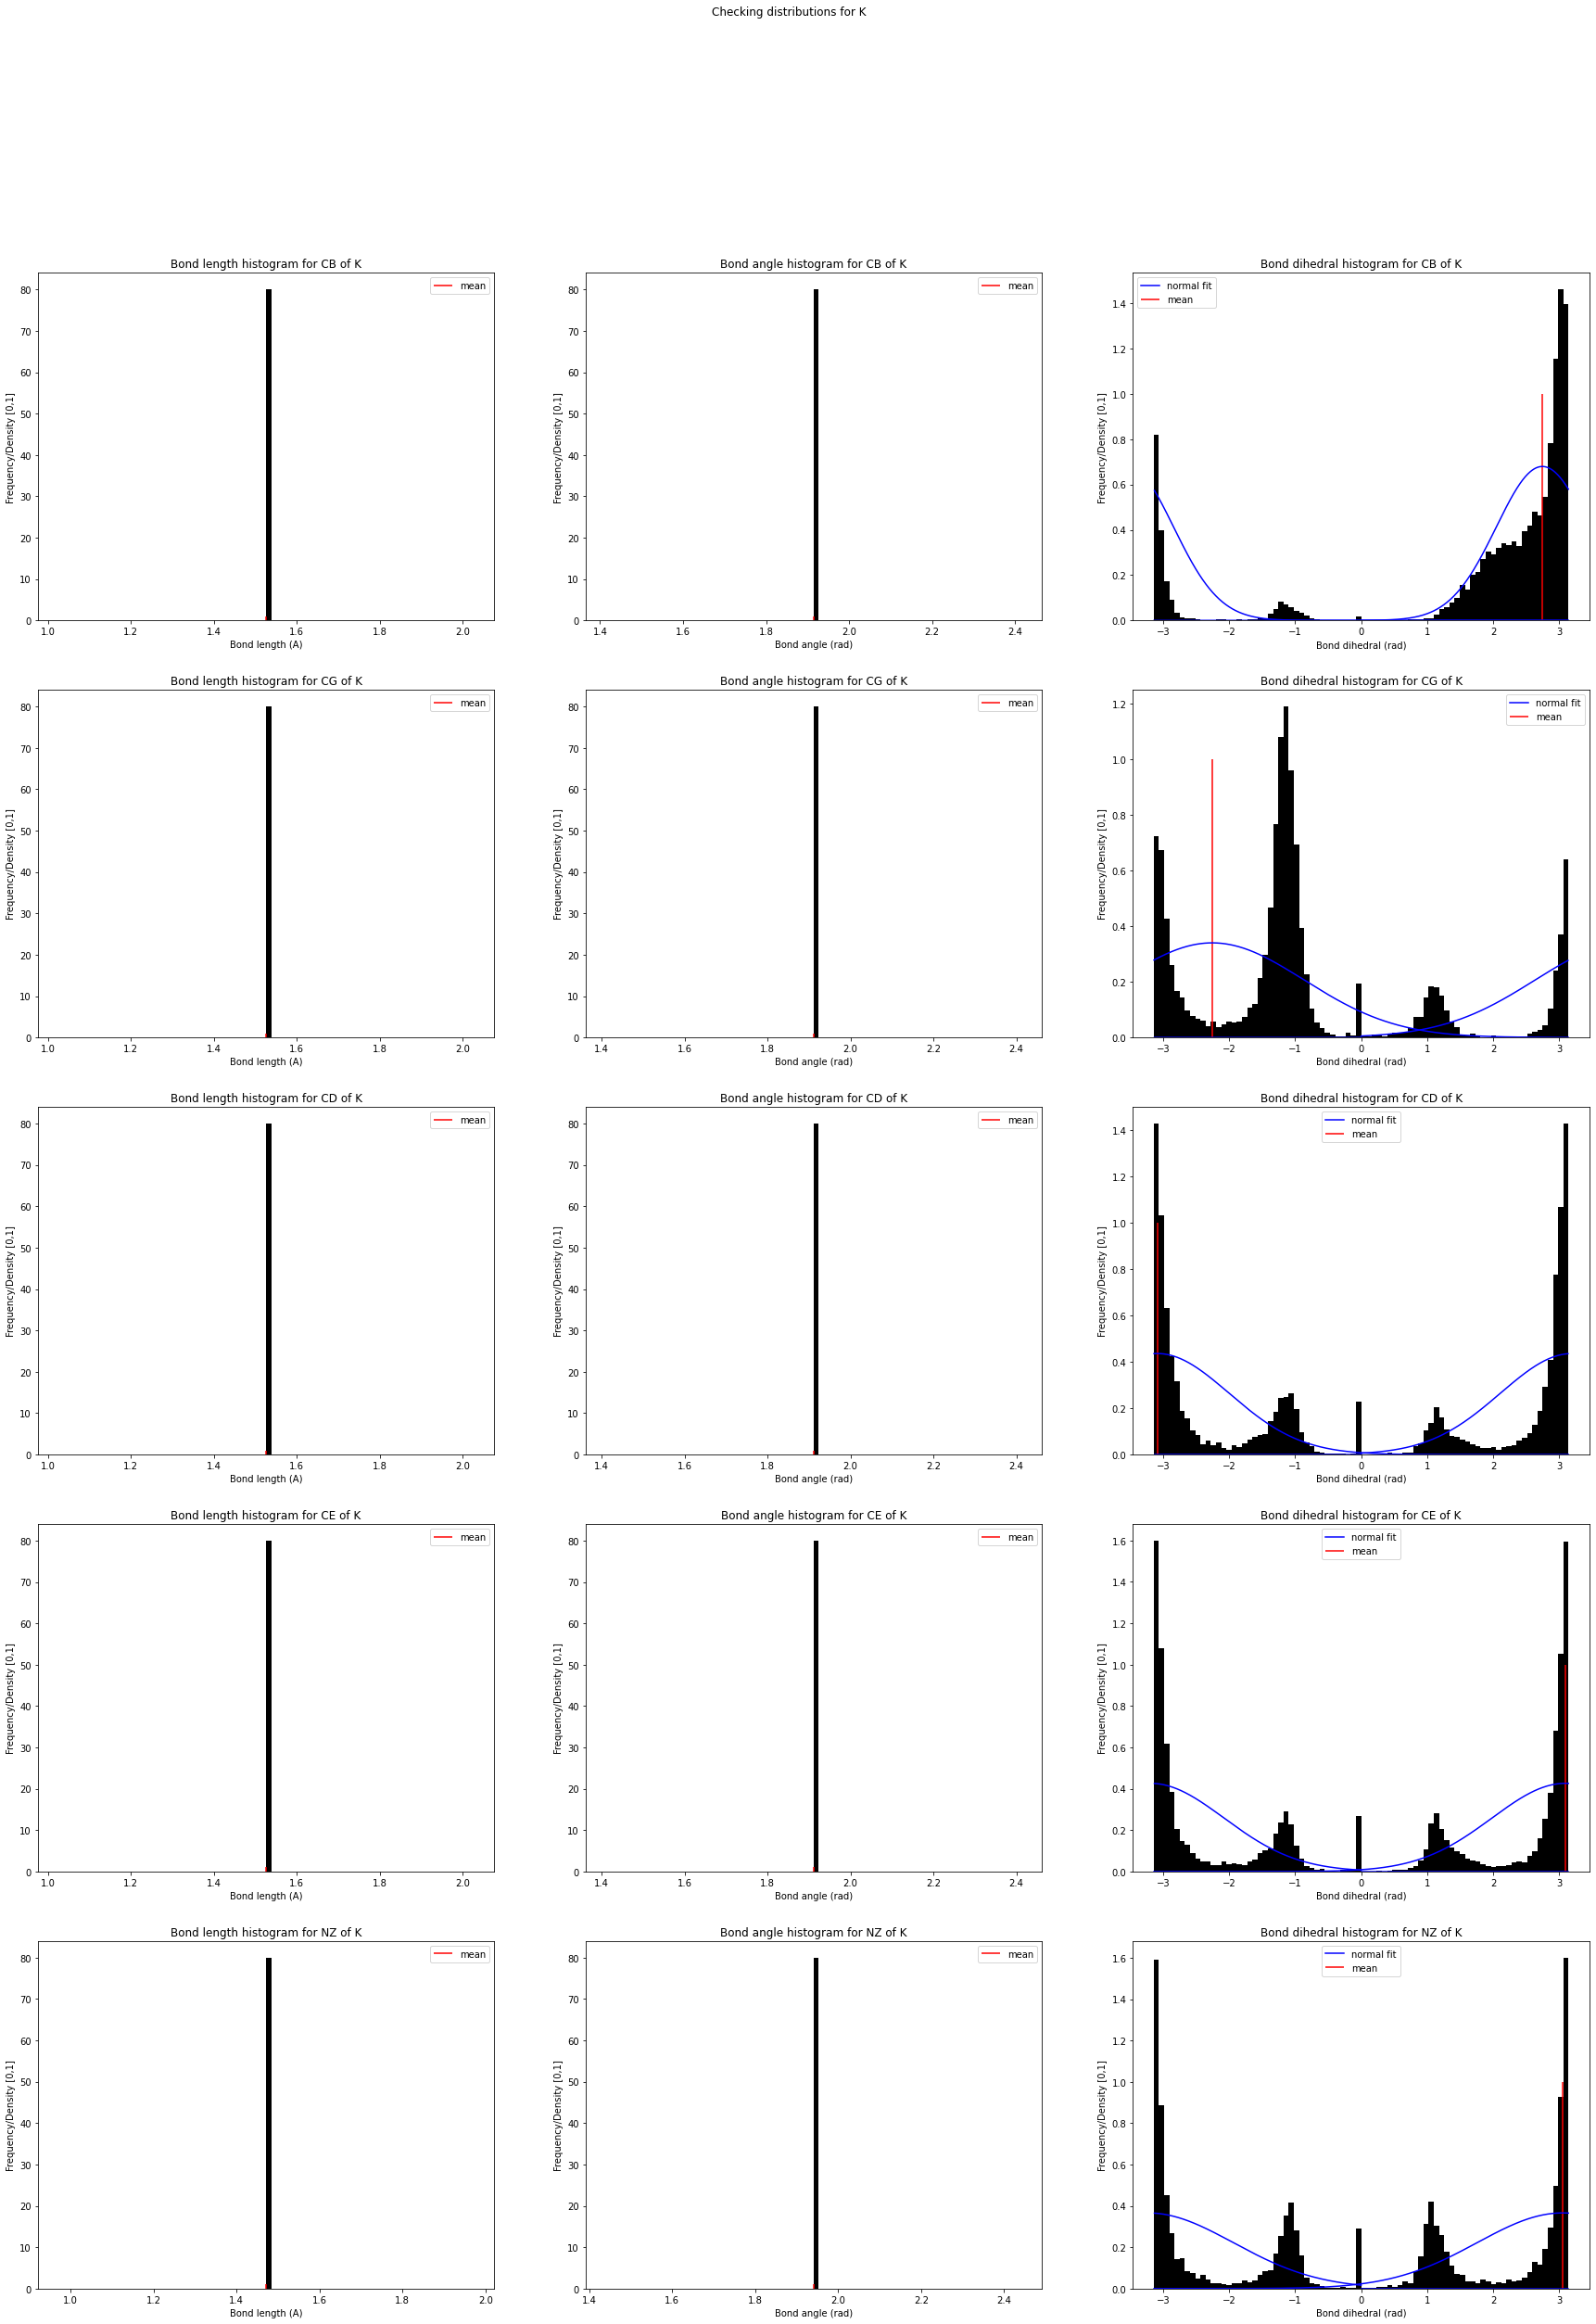

inverted mean needed in M in atom CB
inverted mean needed in M in atom CG
inverted mean needed in M in atom SD


<Figure size 432x288 with 0 Axes>

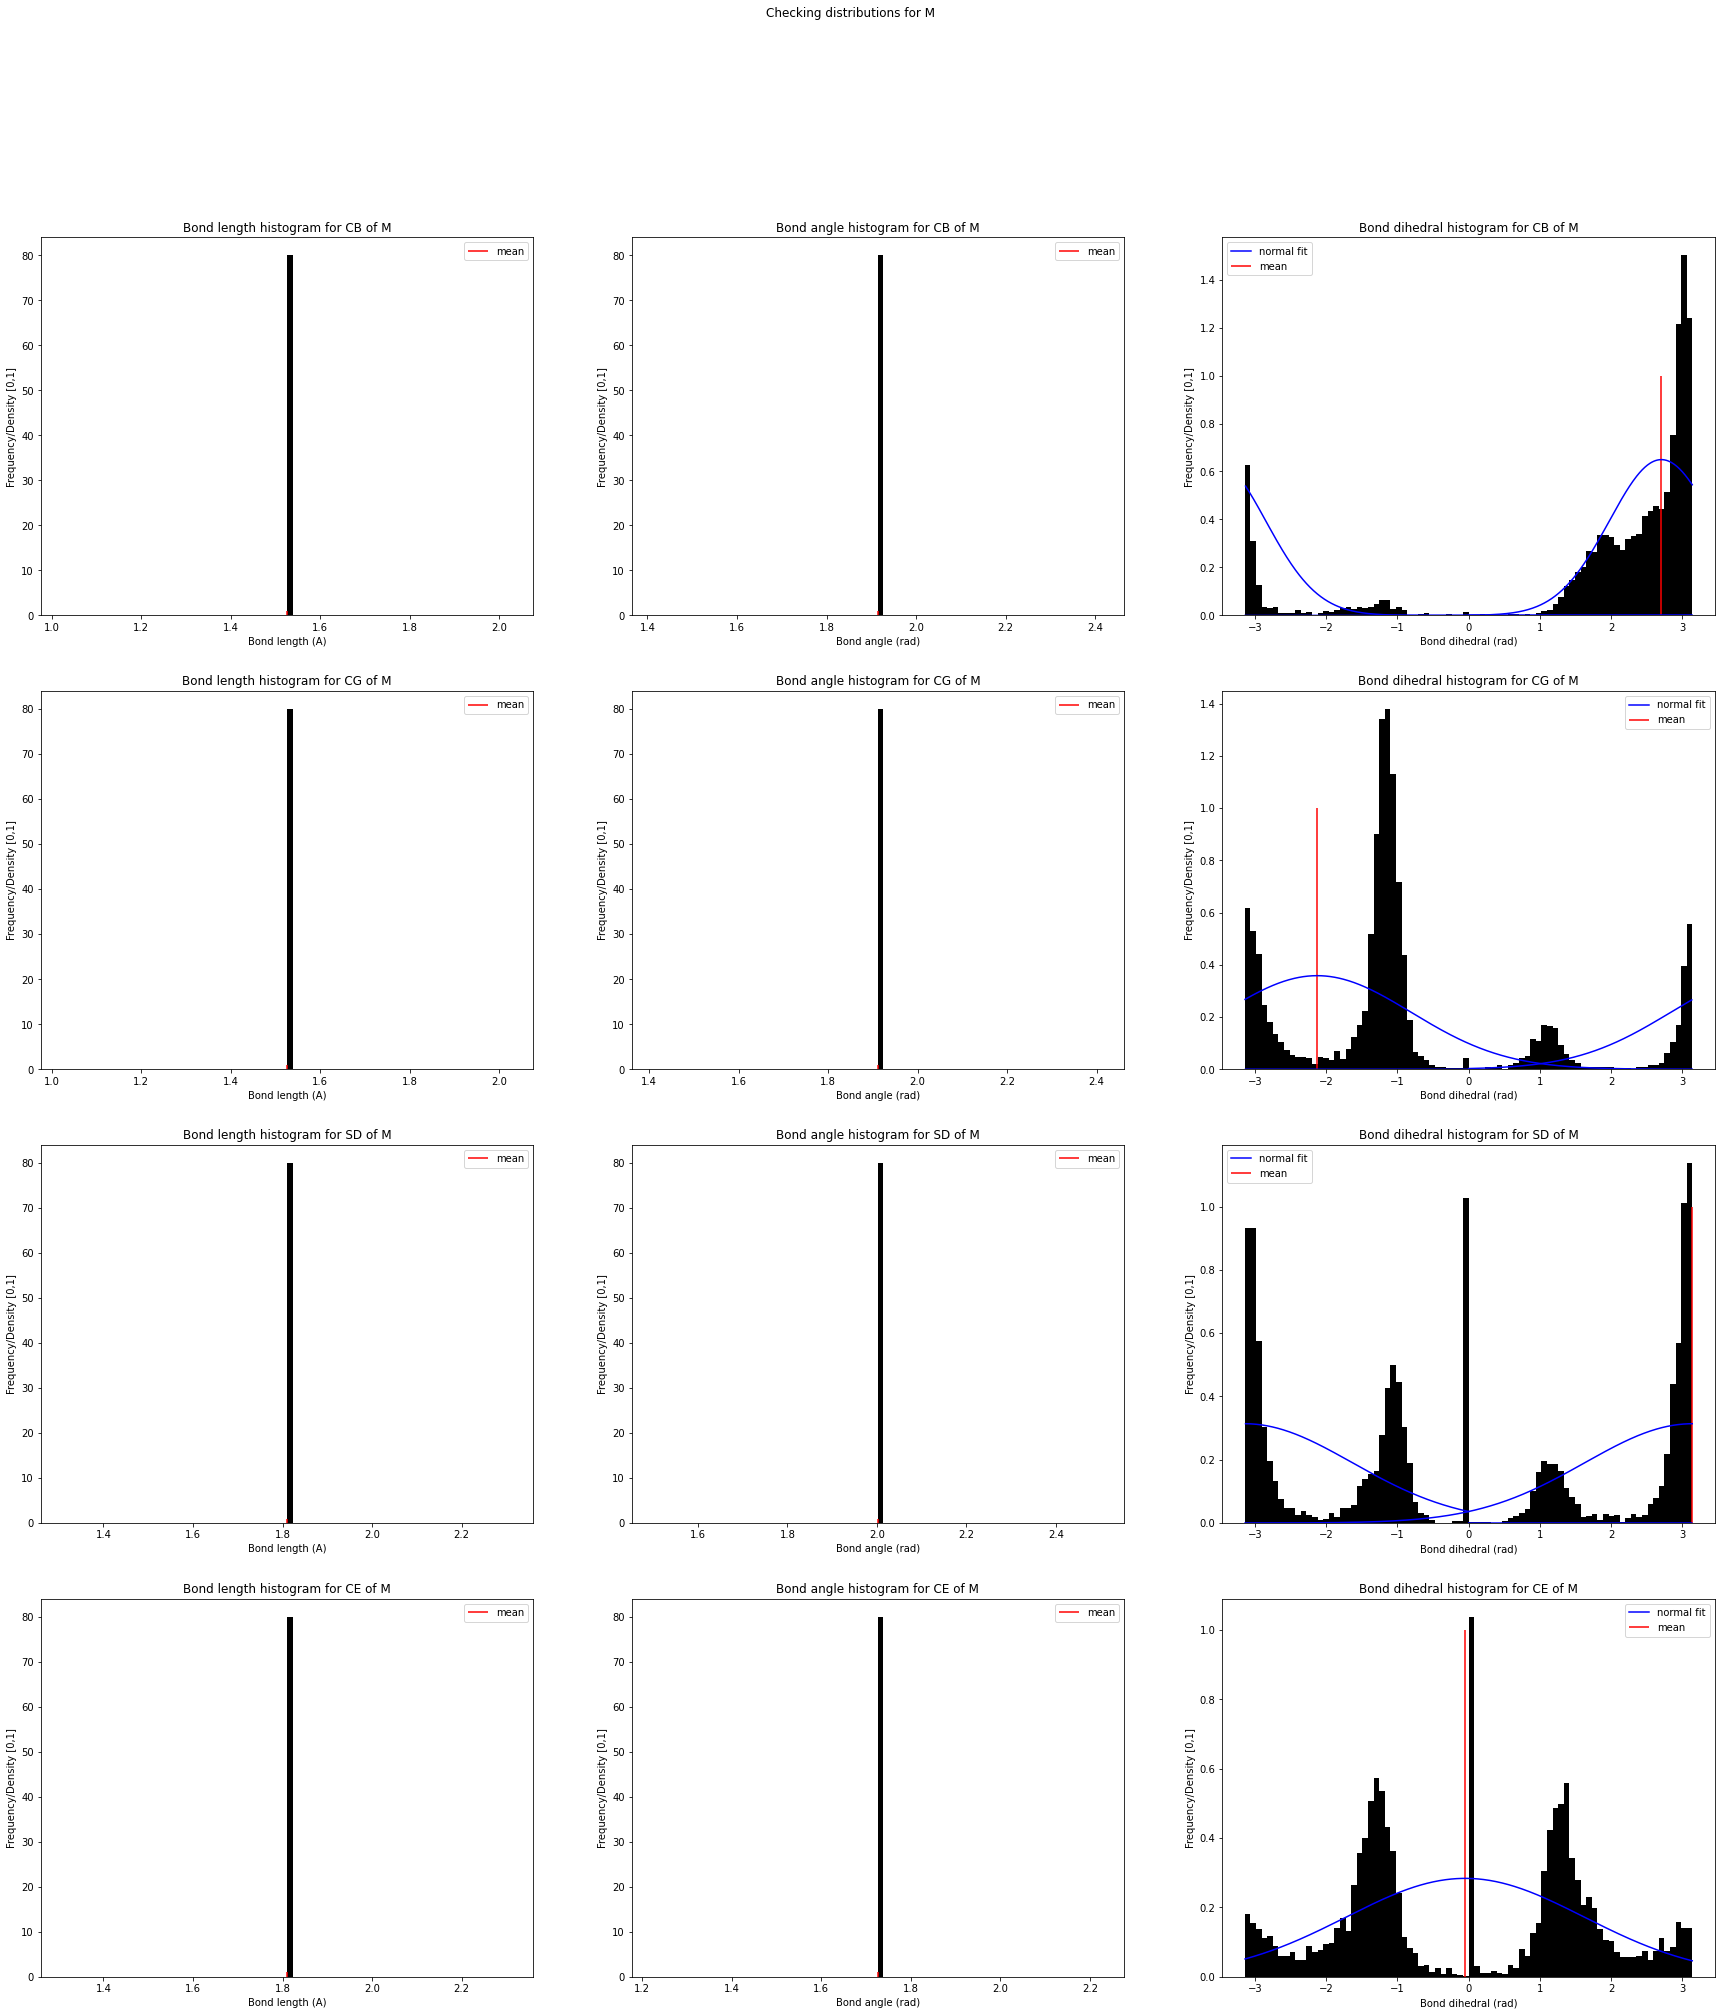

inverted mean needed in F in atom CB
inverted mean needed in F in atom CG


<Figure size 432x288 with 0 Axes>

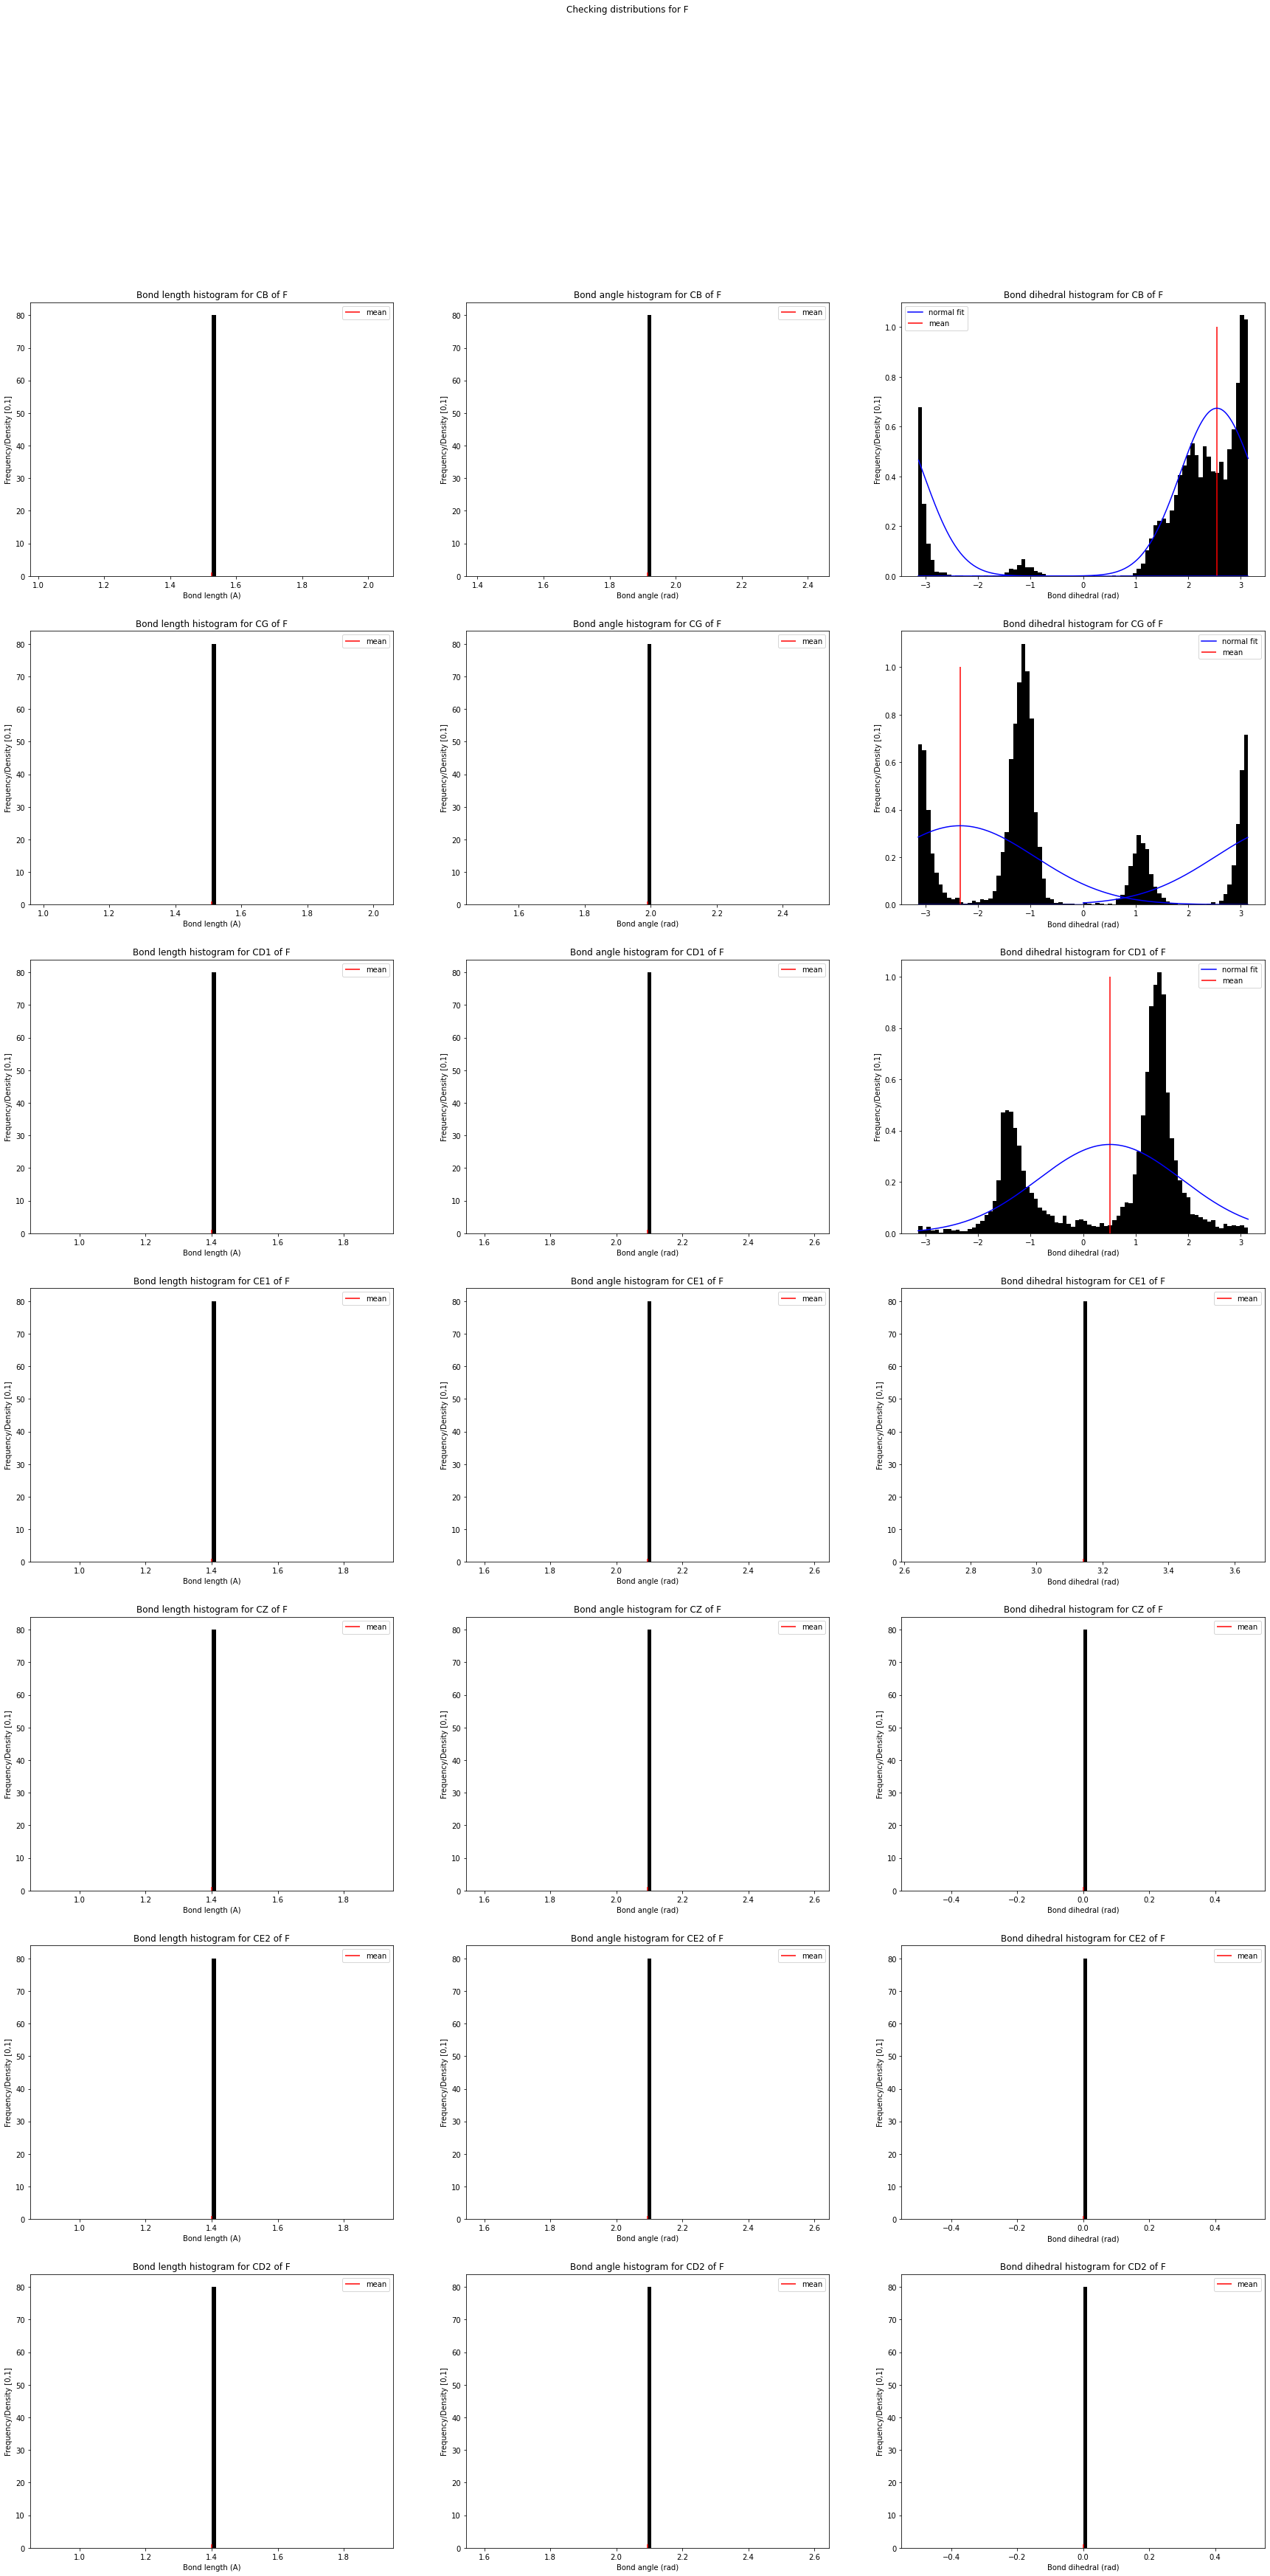

inverted mean needed in P in atom CB


<Figure size 432x288 with 0 Axes>

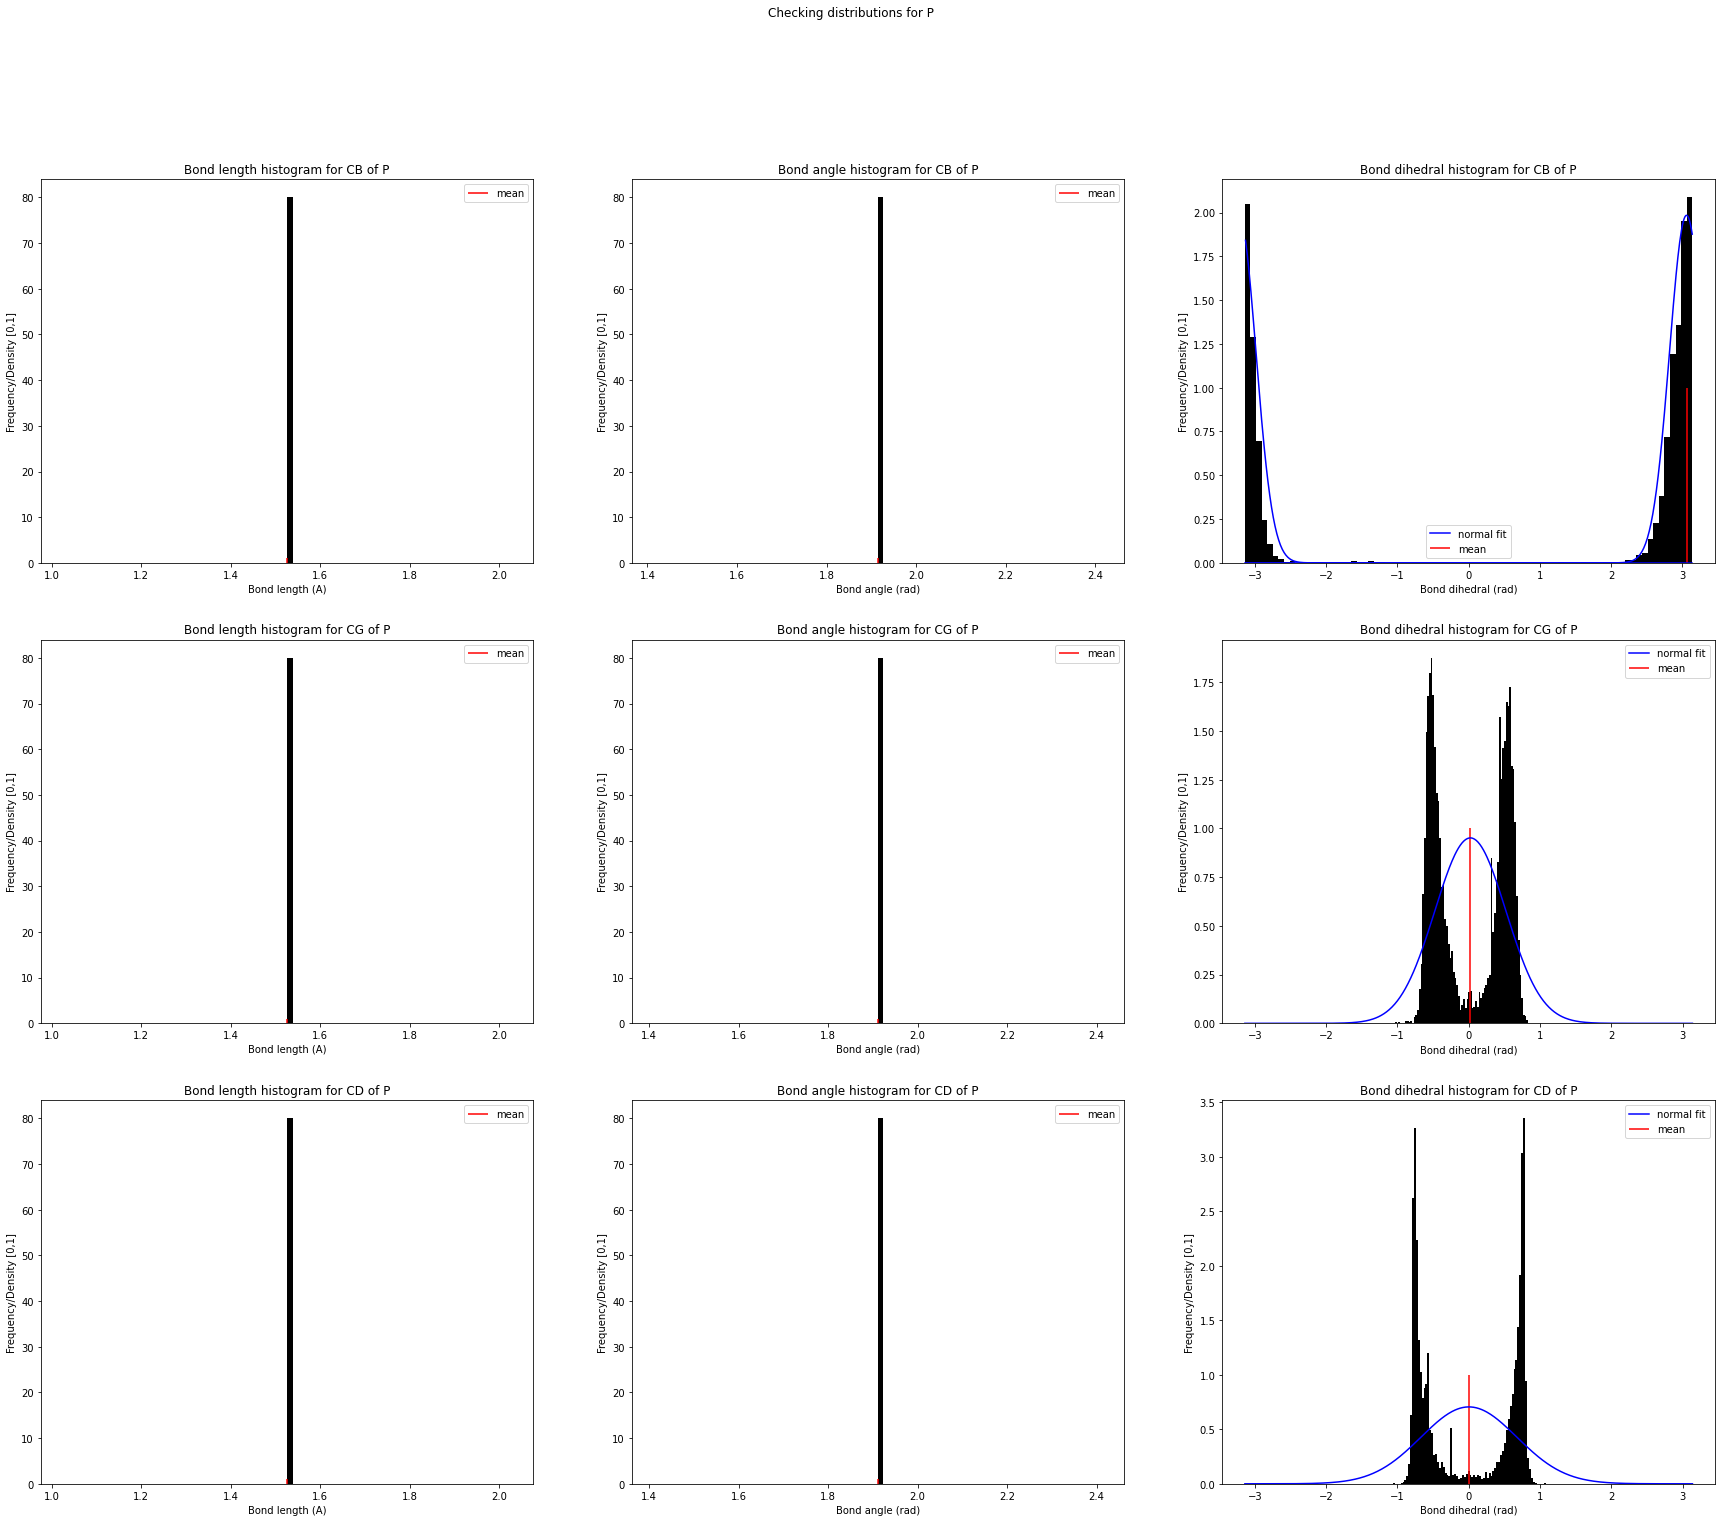

inverted mean needed in S in atom CB
inverted mean needed in S in atom OG


<Figure size 432x288 with 0 Axes>

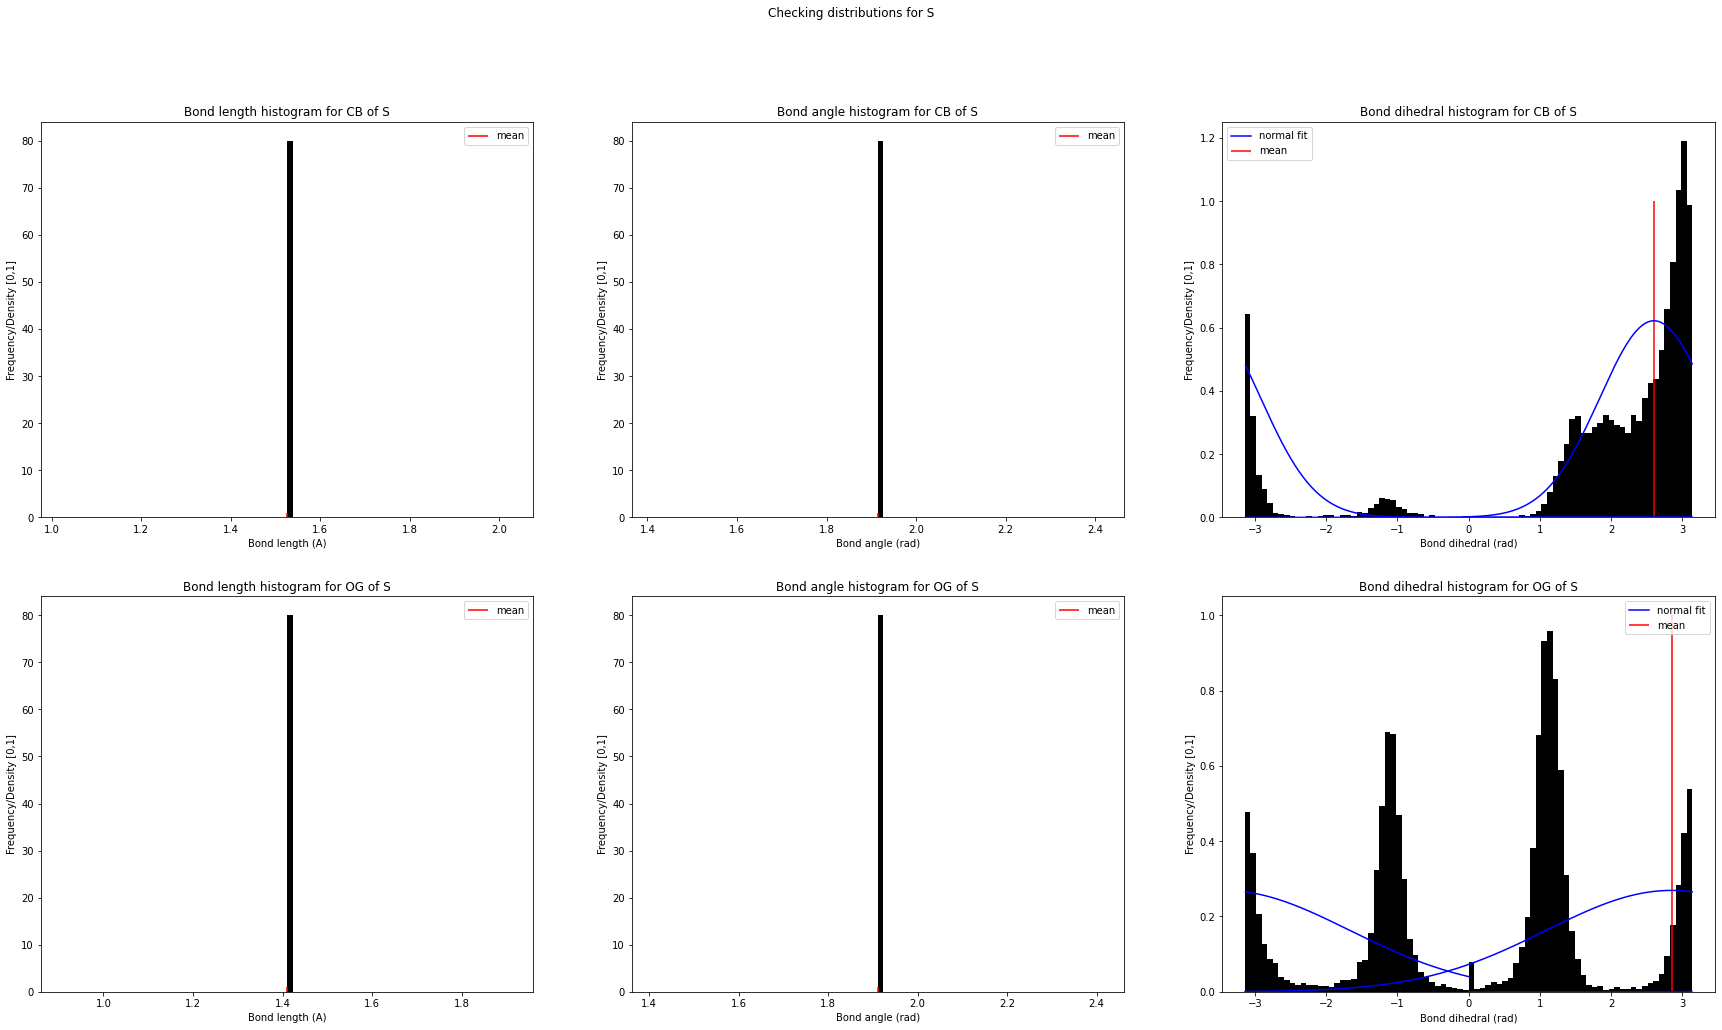

inverted mean needed in T in atom CB
inverted mean needed in T in atom CG2


<Figure size 432x288 with 0 Axes>

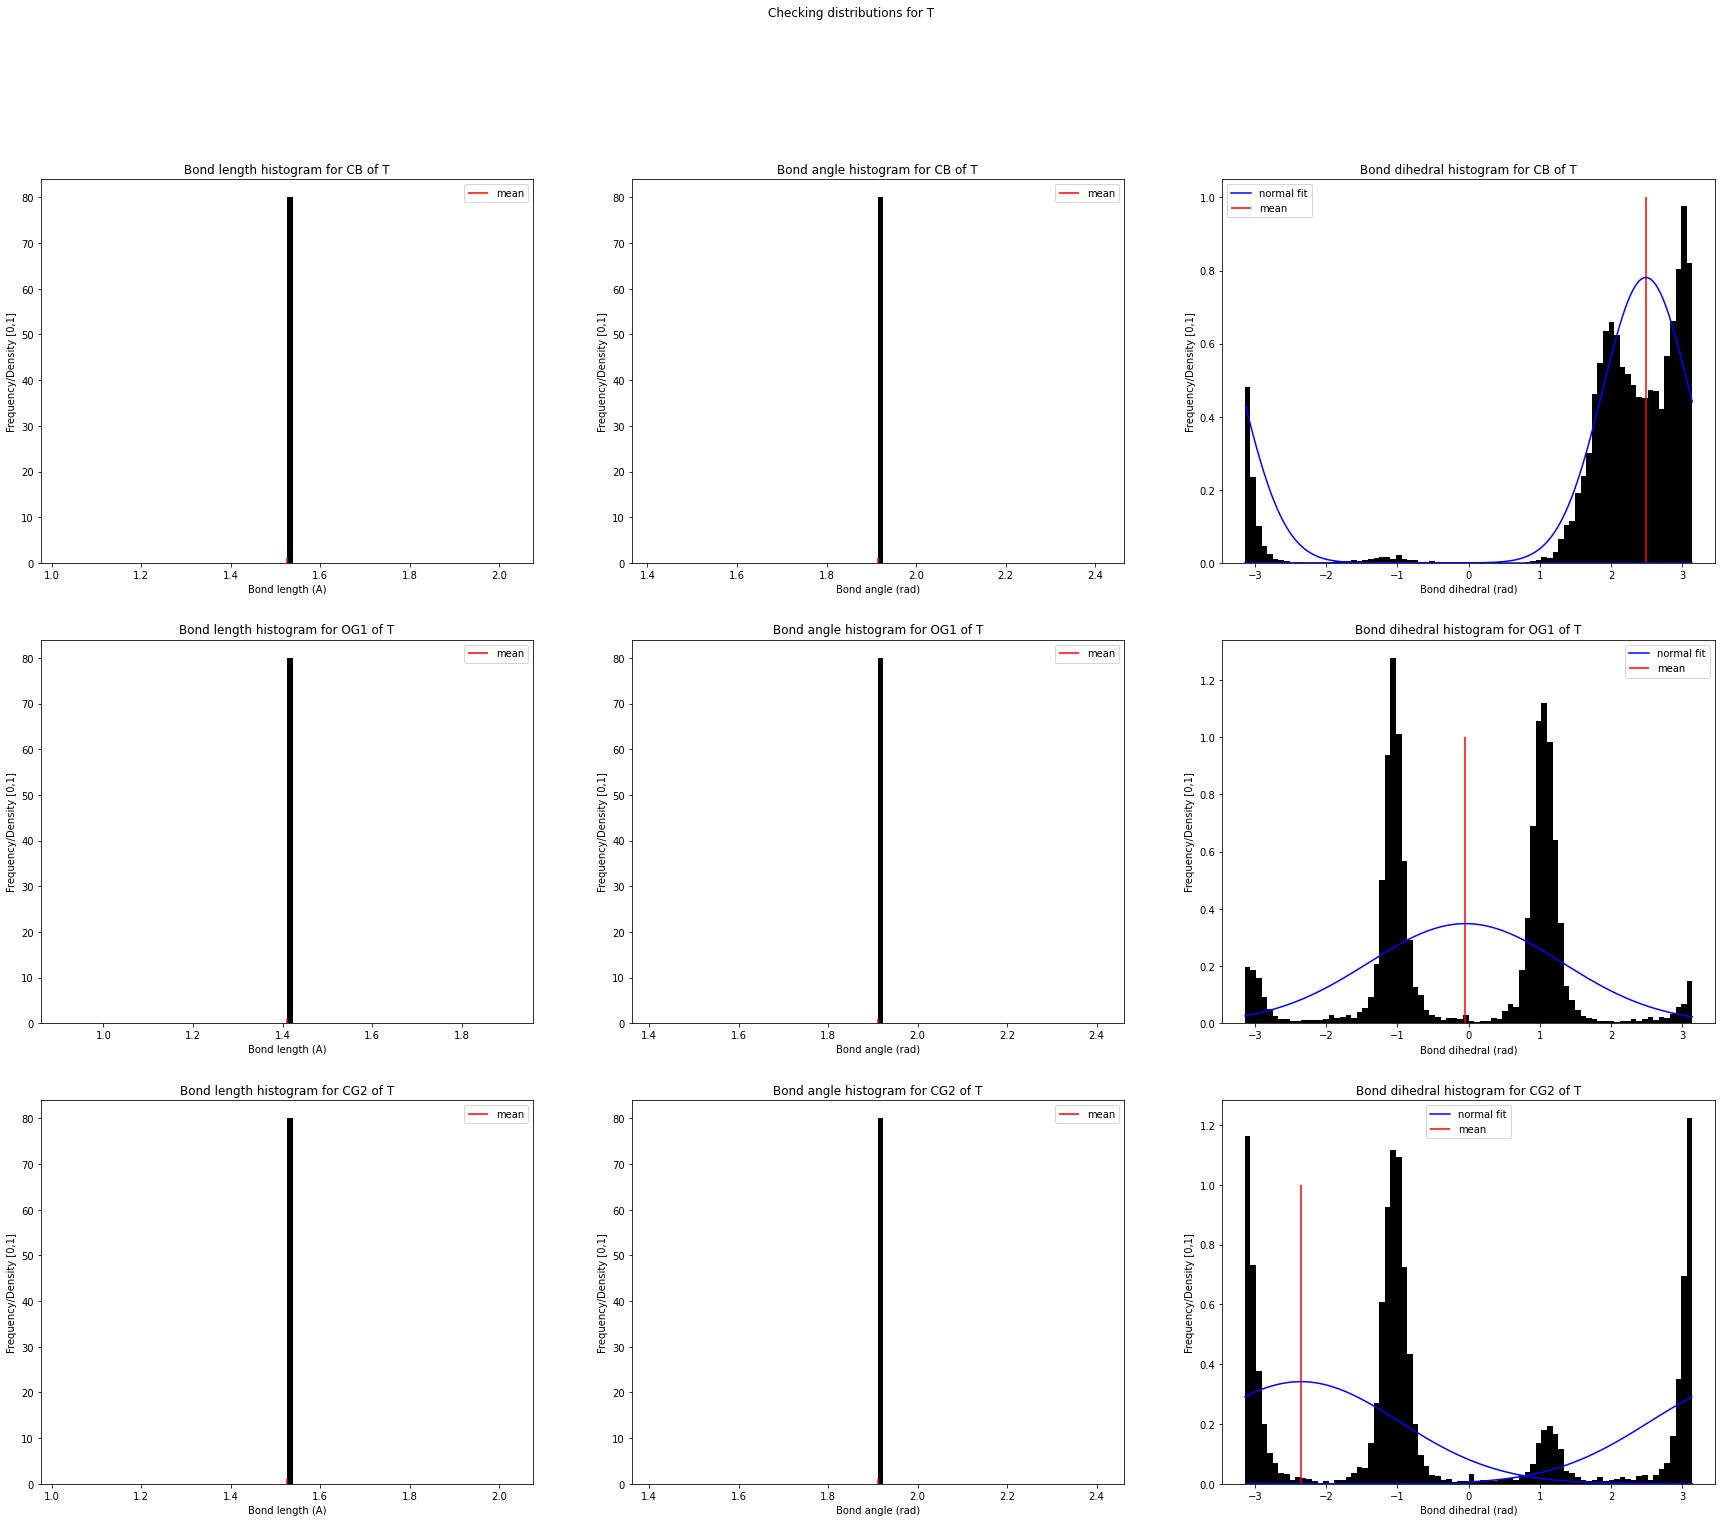

inverted mean needed in W in atom CB
inverted mean needed in W in atom CG


<Figure size 432x288 with 0 Axes>

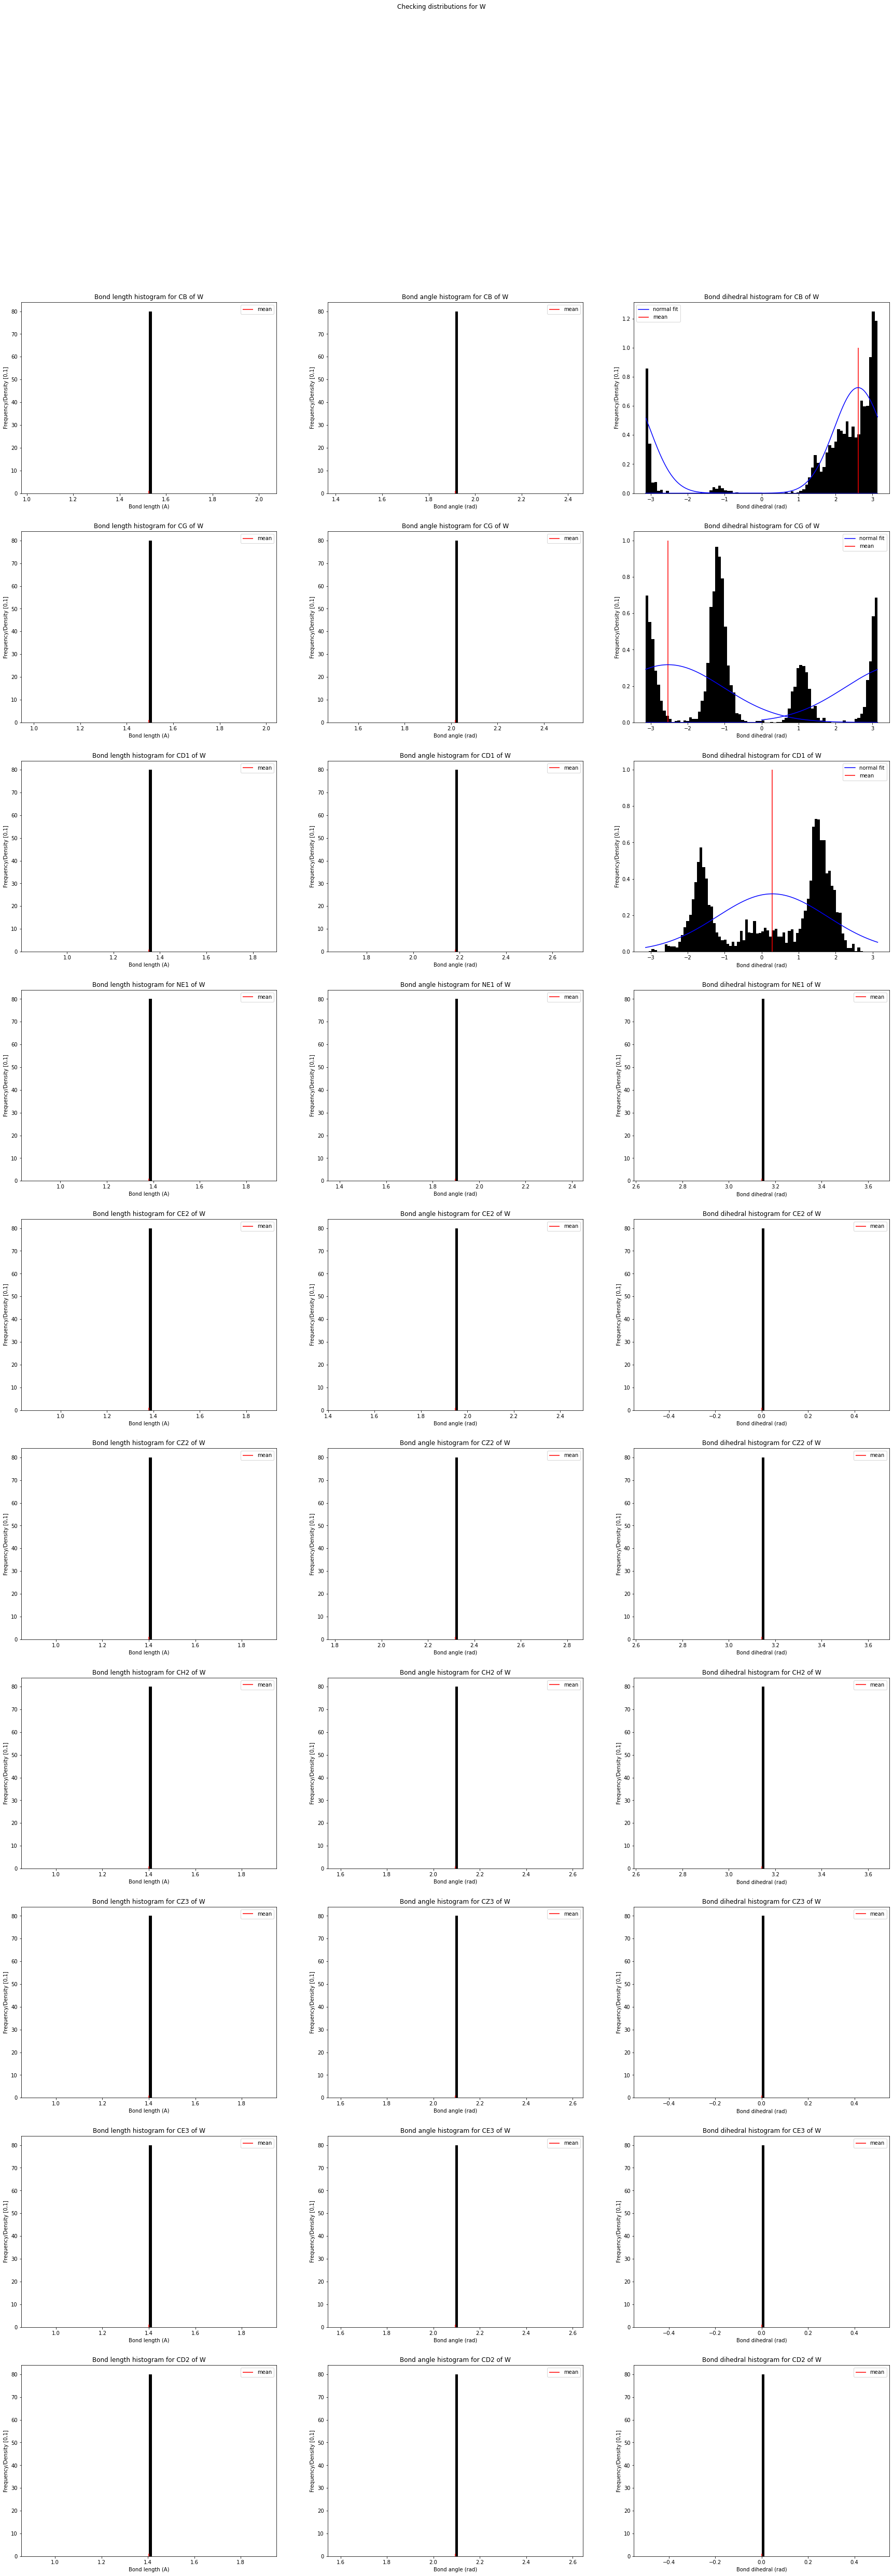

inverted mean needed in Y in atom CB
inverted mean needed in Y in atom CG


<Figure size 432x288 with 0 Axes>

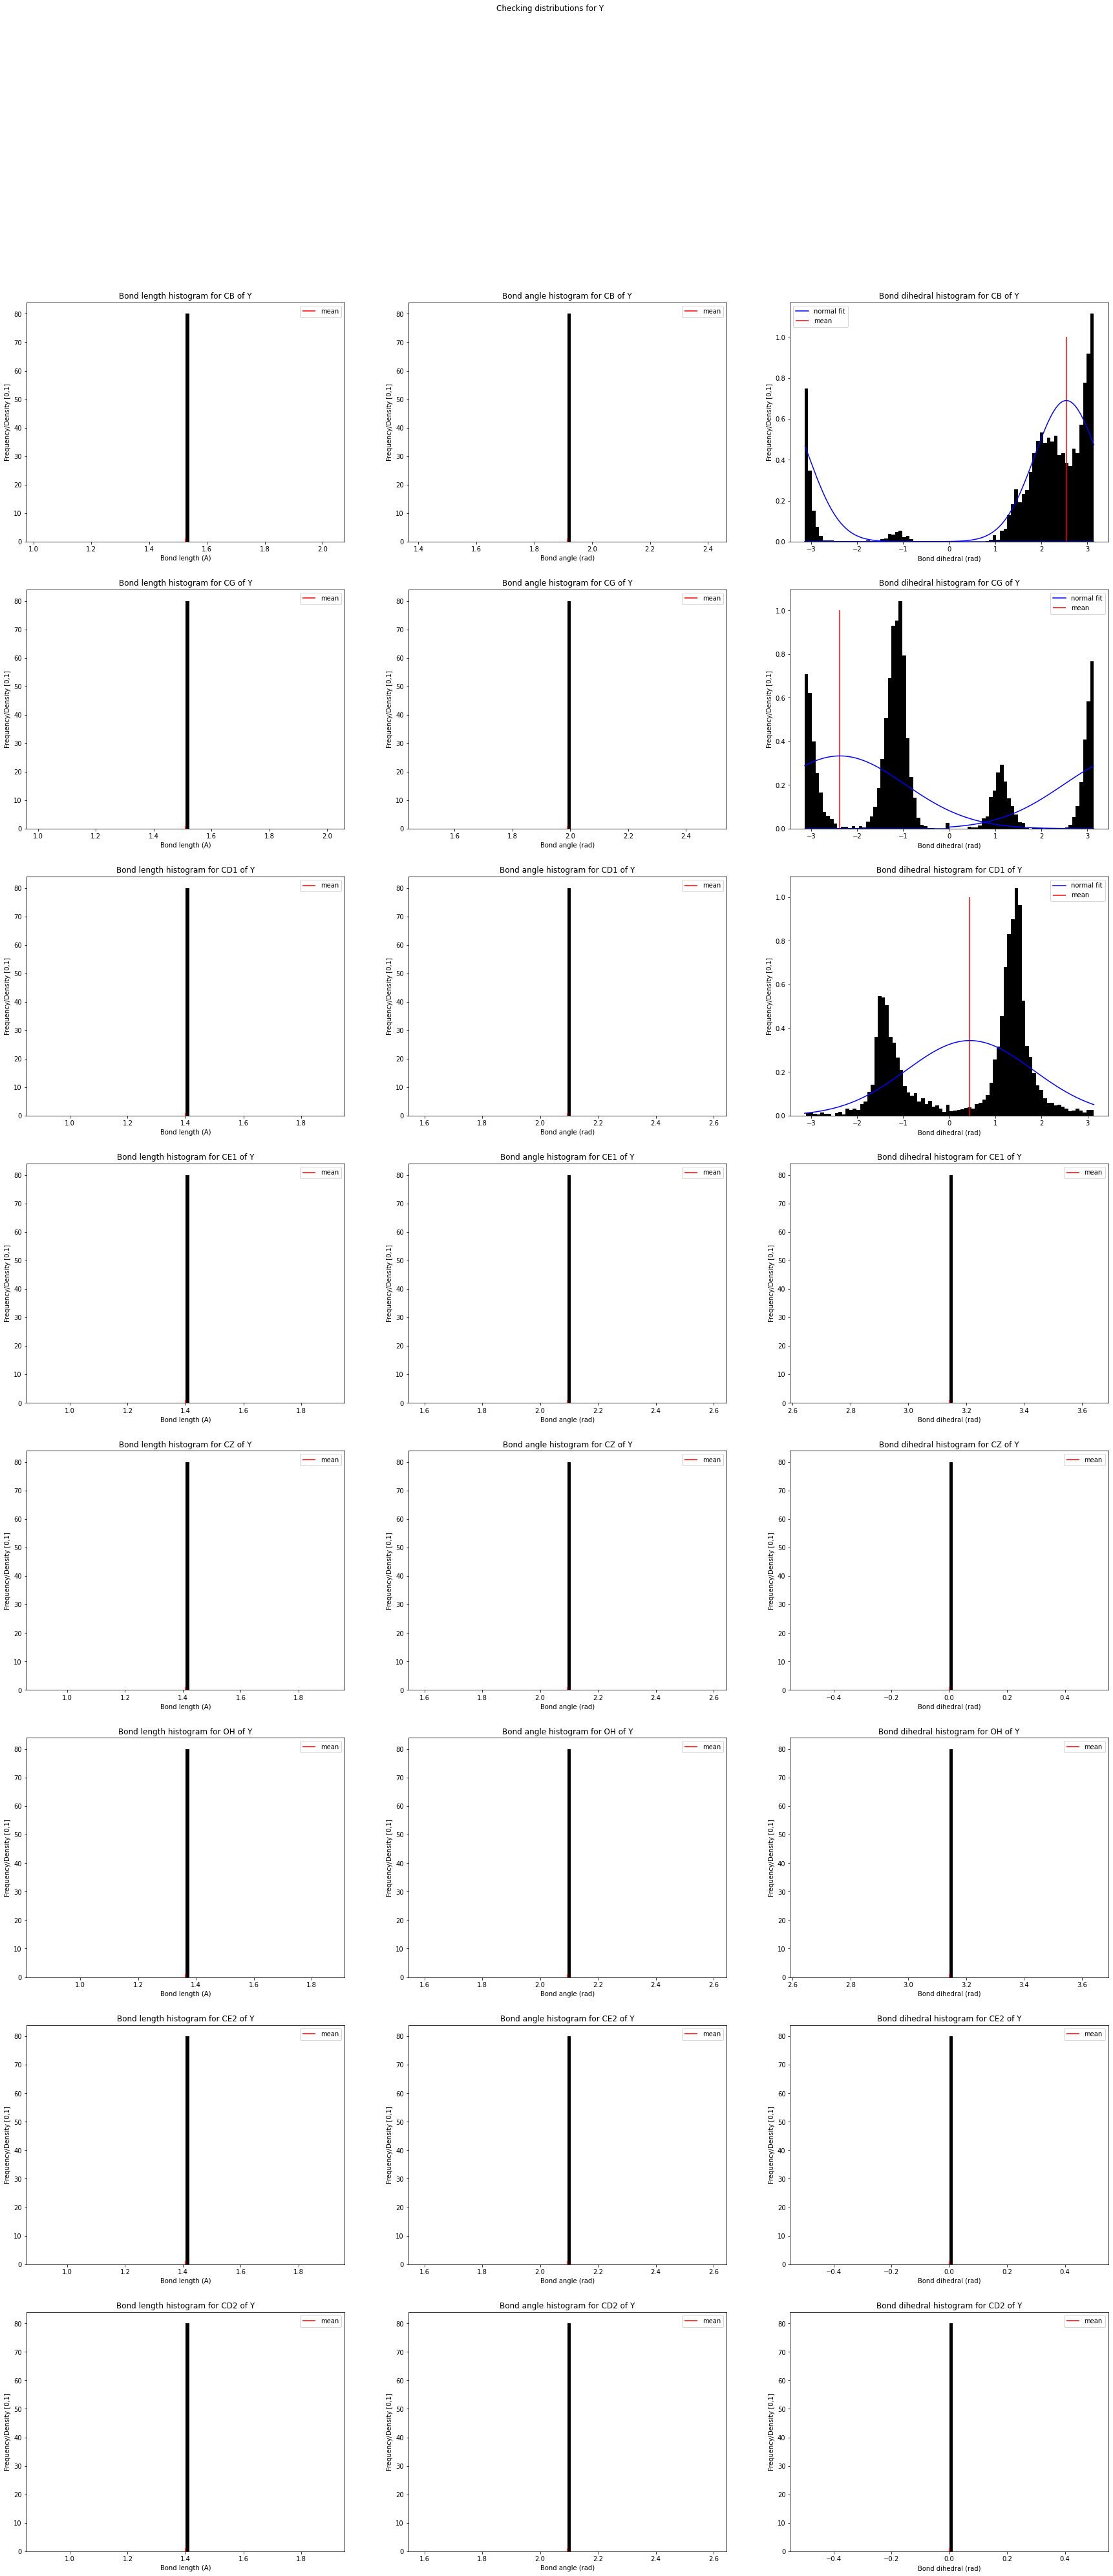

inverted mean needed in V in atom CB
inverted mean needed in V in atom CG1


<Figure size 432x288 with 0 Axes>

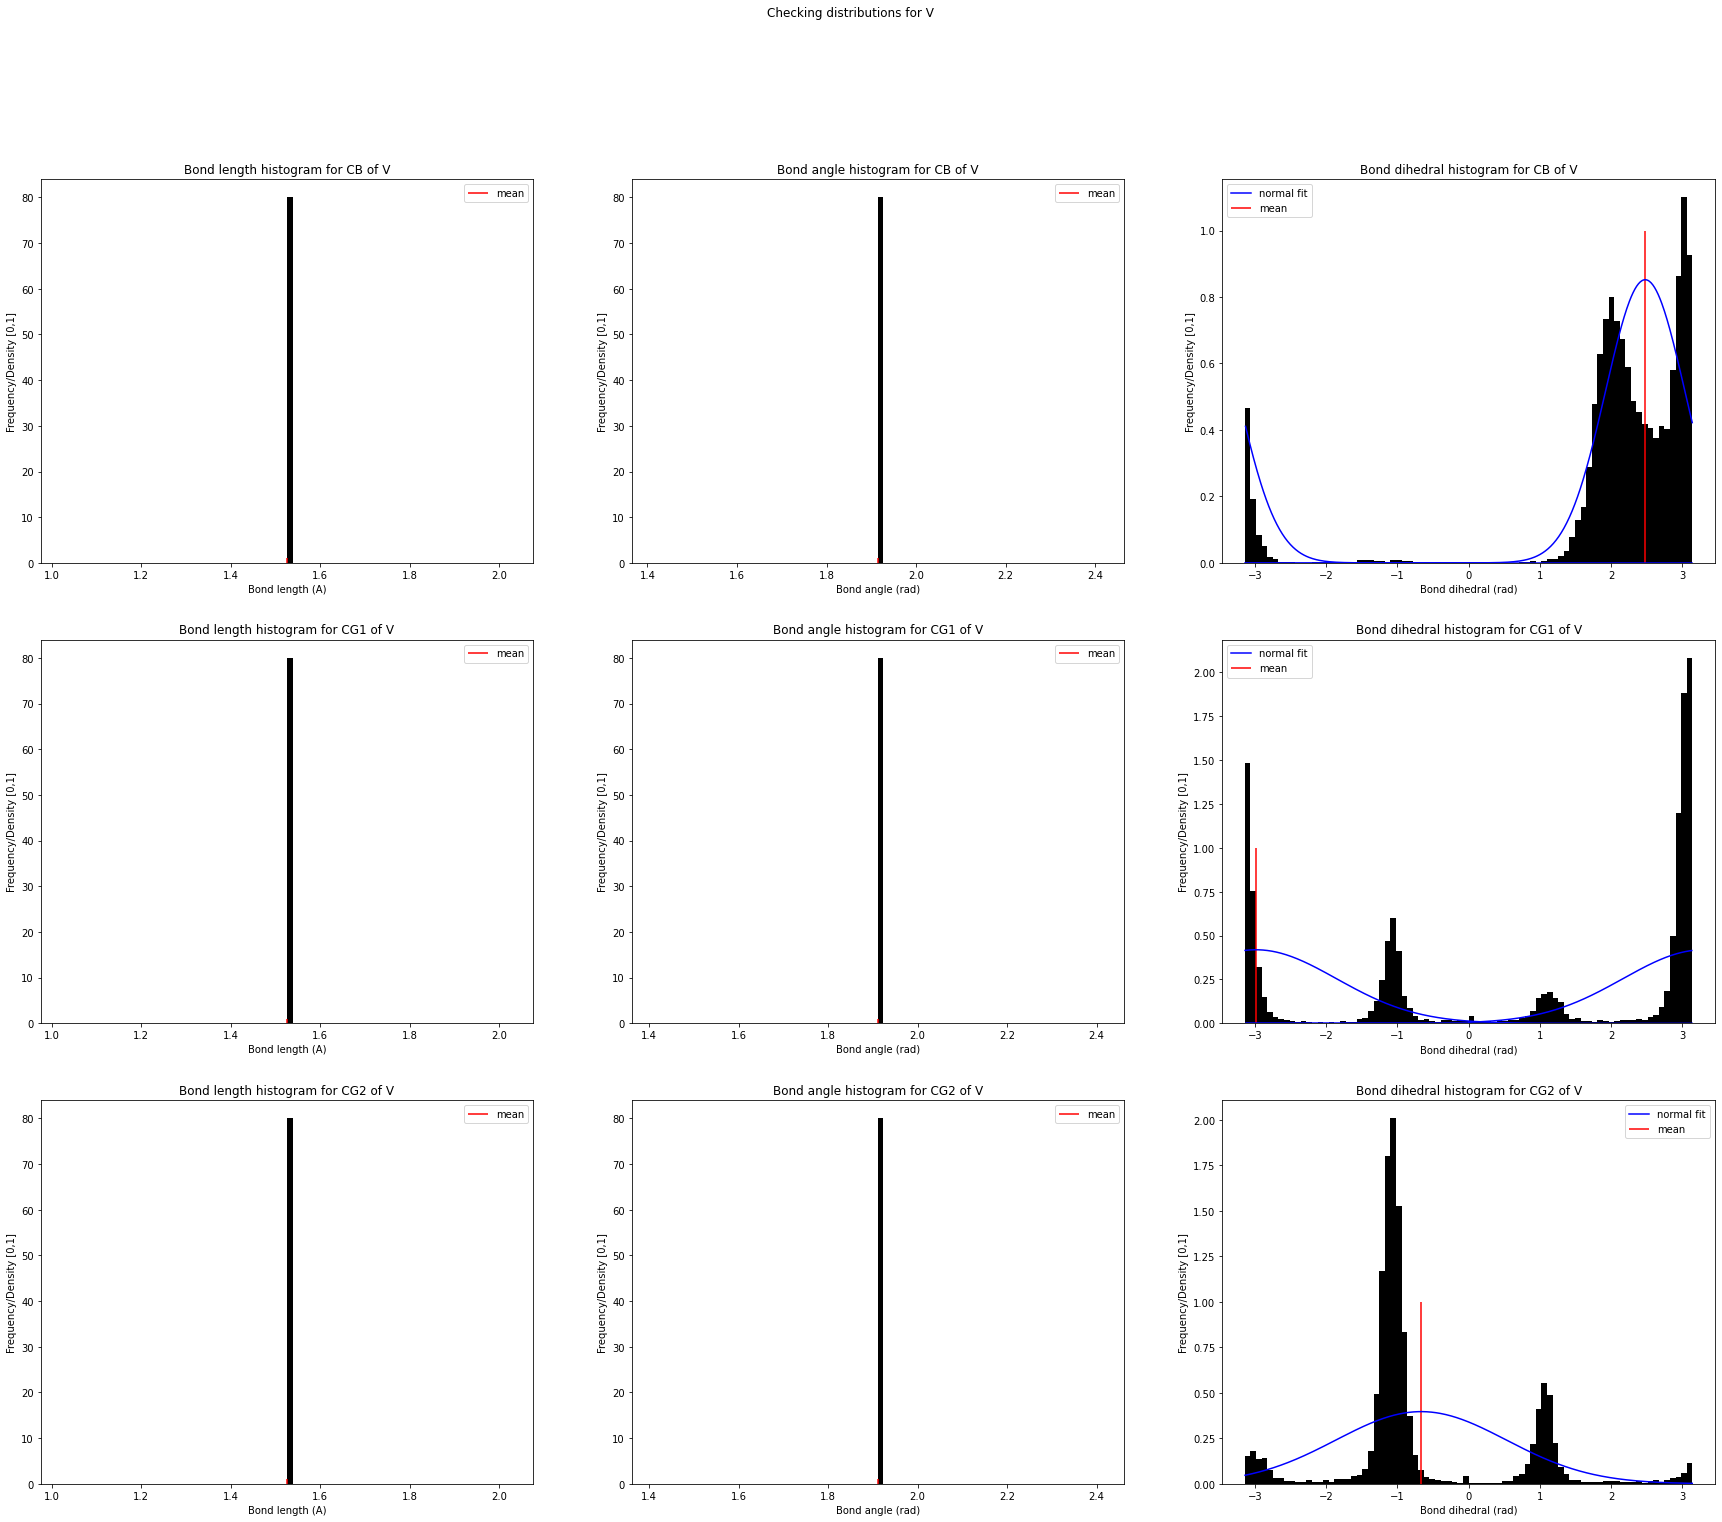

<Figure size 432x288 with 0 Axes>

In [150]:
for AA in SC_BUILD_INFO.keys():
    n_atoms = len(AAS_WHOLE_INFO[AA])

    if n_atoms > 0: 
        plt.figure()
        fig, axs = plt.subplots(n_atoms, 3, figsize=(30, 8*n_atoms))
        for i in range(n_atoms): 
            ax_iter = axs[i] if n_atoms > 1 else axs
            fig.suptitle("Checking distributions for {0}".format(AA))
            atom_name = SC_BUILD_INFO[AA]["atom-names"][i]
            
            # histogram of bond_length
            mu = np.nanmean(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_lens"])
            sigma = np.nanstd(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_lens"])
            some_range = np.linspace( np.min(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_lens"]), 
                                      np.max(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_lens"]), 1000)
            gaussianed_range = gaussian(some_range, mu, sigma)
            ax_iter[0].set_title("Bond length histogram for {0} of {1}".format(atom_name, AA))
            ax_iter[0].hist(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_lens"], density=True, bins=80, color="k")
            ax_iter[0].vlines(mu, 0, 1, colors=["r"], label="mean")
            # only plot gaussian if sigma is acceptable (otherwise not adjusted for histogram scale)
            if sigma > 1e-4:
                ax_iter[0].plot(some_range, gaussianed_range, 'b-', label="normal fit")
            ax_iter[0].legend()
            ax_iter[0].set_xlabel("Bond length (A)")
            ax_iter[0].set_ylabel("Frequency/Density [0,1]")
            # histogram of bond angle
            mu = np.nanmean(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_angs"])
            sigma = np.nanstd(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_angs"])
            some_range = np.linspace( -2*np.pi, 2*np.pi, 1000)
            gaussianed_range = gaussian(some_range, mu, sigma)
            ax_iter[1].set_title("Bond angle histogram for {0} of {1}".format(atom_name, AA))
            ax_iter[1].hist(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_angs"], density=True, bins=80, color="k")
            ax_iter[1].vlines(mu, 0, 1, colors=["r"], label="mean")
            # only plot gaussian if sigma is acceptable (otherwise not adjusted for histogram scale)
            if sigma > 1e-4:
                in_between = np.logical_and(some_range<np.pi, some_range>-np.pi)
                ax_iter[2].plot(some_range[in_between], gaussianed_range[in_between], 'b-', label="normal fit")
            ax_iter[1].legend()
            ax_iter[1].set_xlabel("Bond angle (rad)")
            ax_iter[1].set_ylabel("Frequency/Density [0,1]")
            # histogram of dihedral angle
            
            # due to angle cycles (2pi = 0), calculate the mean that has the lowest std.
            mu = np.nanmean(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_dihedral"])
            sigma = np.nanstd(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_dihedral"])
            inverted = False
            
            copy_data = AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_dihedral"].copy()
            copy_data[copy_data<0] += 2*np.pi 
            # only update if std is lower
            if np.nanstd(copy_data) < sigma:
                inverted = True
                mu = np.nanmean(copy_data)
                sigma = np.nanstd(copy_data)
                if mu > np.pi: 
                    mu = -(2*np.pi - mu)
                KB_DICT[AA][atom_name]["bond_dihedral"] = mu
                print("inverted mean needed in", AA, "in atom", atom_name)
            
            
            some_range = np.linspace( -2*np.pi, 2*np.pi, 1000)
            gaussianed_range = gaussian(some_range, mu, sigma)
            ax_iter[2].set_title("Bond dihedral histogram for {0} of {1}".format(atom_name, AA))
            ax_iter[2].hist(AAS_WHOLE_INFO_NUMPY[AA][atom_name]["bond_dihedral"], density=True, bins=80, color="k")
            ax_iter[2].vlines(mu, 0, 1, colors=["r"], label="mean")
            # only plot gaussian if sigma is acceptable (otherwise not adjusted for histogram scale)
            if sigma > 1e-4:
                in_between = np.logical_and(some_range<np.pi, some_range>-np.pi)
                ax_iter[2].plot(some_range[in_between], gaussianed_range[in_between], 'b-', label="normal fit")
                if inverted:
                    # inverted, decompose gaussian
                    upper_mask, lower_mask = some_range>np.pi, some_range<-np.pi
                    ax_iter[2].plot(some_range[upper_mask]-2*np.pi, gaussianed_range[upper_mask], 'b-')
                    ax_iter[2].plot(some_range[lower_mask]+2*np.pi, gaussianed_range[lower_mask], 'b-')
            ax_iter[2].legend()
            ax_iter[2].set_xlabel("Bond dihedral (rad)")
            ax_iter[2].set_ylabel("Frequency/Density [0,1]")
    plt.savefig("xtension/plots/{0}_plot_hists.png".format(AA))
    plt.show()

In [151]:
print("KB_DICT", KB_DICT)

KB_DICT {'A': {'CB': {'bond_lens': 1.5260003, 'bond_angs': 1.9146265, 'bond_dihedral': 2.748366}}, 'R': {'CB': {'bond_lens': 1.5260003, 'bond_angs': 1.9146265, 'bond_dihedral': 2.6976738}, 'CG': {'bond_lens': 1.5260003, 'bond_angs': 1.9111352, 'bond_dihedral': -2.296891752873556}, 'CD': {'bond_lens': 1.5260003, 'bond_angs': 1.9111352, 'bond_dihedral': -3.0688698927508753}, 'NE': {'bond_lens': 1.463, 'bond_angs': 1.9408059, 'bond_dihedral': -3.1065035502063196}, 'CZ': {'bond_lens': 1.34, 'bond_angs': 2.1502457, 'bond_dihedral': -3.1146112124072474}, 'NH1': {'bond_lens': 1.34, 'bond_angs': 2.094395, 'bond_dihedral': 0.024268176}, 'NH2': {'bond_lens': 1.34, 'bond_angs': 2.094395, 'bond_dihedral': -3.1173246}}, 'N': {'CB': {'bond_lens': 1.5260003, 'bond_angs': 1.9146265, 'bond_dihedral': 2.8416245}, 'CG': {'bond_lens': 1.5219998, 'bond_angs': 1.9390607, 'bond_dihedral': -2.35341984430422}, 'OD1': {'bond_lens': 1.229, 'bond_angs': 2.101376, 'bond_dihedral': -0.087414205}, 'ND2': {'bond_lens

### Textual Data

In [70]:
for AA in AAS_WHOLE_INFO_NUMPY:
    print("AA: ", AA)
    # print({atom: {k: np.nanmean(v) for k,v in v_atom.items()} for atom,v_atom in AAS_WHOLE_INFO_NUMPY[AA].items()})
    for atom,v_atom in AAS_WHOLE_INFO_NUMPY[AA].items(): 
        print(atom, {k: (round(np.nanmean(v), 4),
                         round(np.nanstd(v), 4)) for k,v in v_atom.items()})
    print("\n\n=======\n\n")

AA:  A
CB {'bond_lens': (1.526, 0.0), 'bond_angs': (1.9146, 0.0), 'bond_dihedral': (1.7652, 2.0473)}




AA:  R
CB {'bond_lens': (1.526, 0.0), 'bond_angs': (1.9146, 0.0), 'bond_dihedral': (1.7202, 1.9534)}
CG {'bond_lens': (1.526, 0.0), 'bond_angs': (1.9111, 0.0), 'bond_dihedral': (-0.8055, 1.8219)}
CD {'bond_lens': (1.526, 0.0), 'bond_angs': (1.9111, 0.0), 'bond_dihedral': (-0.0571, 2.6142)}
NE {'bond_lens': (1.463, 0.0), 'bond_angs': (1.9408, 0.0), 'bond_dihedral': (-0.0674, 2.2391)}
CZ {'bond_lens': (1.34, 0.0), 'bond_angs': (2.1502, 0.0), 'bond_dihedral': (-0.0304, 2.2811)}
NH1 {'bond_lens': (1.34, 0.0), 'bond_angs': (2.0944, 0.0), 'bond_dihedral': (0.0243, 0.9029)}
NH2 {'bond_lens': (1.34, 0.0), 'bond_angs': (2.0944, 0.0), 'bond_dihedral': (-3.1173, 0.9029)}




AA:  N
CB {'bond_lens': (1.526, 0.0), 'bond_angs': (1.9146, 0.0), 'bond_dihedral': (1.6064, 1.7957)}
CG {'bond_lens': (1.522, 0.0), 'bond_angs': (1.9391, 0.0), 'bond_dihedral': (-0.9772, 1.6286)}
OD1 {'bond_lens': (1.229, 

In [ ]:
# torsion (to elongate oxygen) torsion: 
a = []
for i in range(len(prot_scaffolds)):
    a.extend(prot_scaffolds[i]["angles_mask"][-1, :, 3].tolist())
plt.hist(a)
print("the mean torsion for a protein is: ", np.mean(a))